# **DATA EXPLORATION**

In [ ]:
import pandas as pd

df = pd.read_csv('FlunetData_Philippines_All Sites_for_01 January 1995 to 17 November 2025.xlsx - Raw Dataset.csv')
df

Unnamed: 0 Country area or territory Surveillance site type  \
0             50               Philippines            Not defined   
1             52               Philippines            Not defined   
2             53               Philippines            Not defined   
3             54               Philippines            Not defined   
4             55               Philippines            Not defined   
...          ...                       ...                    ...   
1274        1277               Philippines               Sentinel   
1275          45               Philippines           Non-sentinel   
1276        1278               Philippines               Sentinel   
1277          46               Philippines           Non-sentinel   
1278        1279               Philippines               Sentinel   

     Year-week (ISO 8601 calendar) Week start date (ISO 8601 calendar)  \
0                          2000-01                          2000-01-03   
1                          2002-01                          2001-12-31   
2                          2002-02                          2002-01-07   
3                          2002-03                          2002-01-14   
4                          2002-04                          2002-01-21   
...                            ...                                 ...   
1274                       2025-44                          2025-10-27   
1275                       2025-45                          2025-11-03   
1276                       2025-45                          2025-11-03   
1277                       2025-46                          2025-11-10   
1278                       2025-46                          2025-11-10   

      Specimen tested  Influenza positive  Influenza negative  A (H1)  \
0                   2                   2                   0     2.0   
1                  10                   0                  10     0.0   
2                  18                   0                  18     0.0   
3                  17                   0                  17     0.0   
4                  13                   0                  13     0.0   
...               ...                 ...                 ...     ...   
1274              154                  54                 100     0.0   
1275               14                   1                  13     0.0   
1276               91                  16                  75     0.0   
1277                5                   1                   4     0.0   
1278               22                   4                  18     0.0   

      A (H1N1)pdm09  A (H3)  A not subtyped  B (Victoria)  B (Yamagata)  \
0               NaN     NaN             NaN           NaN           NaN   
1               NaN     0.0             0.0           NaN           NaN   
2               NaN     0.0             0.0           NaN           NaN   
3               NaN     0.0             0.0           NaN           NaN   
4               NaN     0.0             0.0           NaN           NaN   
...             ...     ...             ...           ...           ...   
1274            5.0    47.0             0.0           2.0           0.0   
1275            0.0     1.0             0.0           0.0           0.0   
1276            0.0    16.0             0.0           0.0           0.0   
1277            0.0     1.0             0.0           0.0           0.0   
1278            0.0     4.0             0.0           0.0           0.0   

      B (lineage not determined)  
0                            NaN  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
1274                         0.0  
1275                         0.0  
1276                         0.0  
1277                         0.0  
1278                         0.0  

[1279 rows x 15 columns]

In [ ]:
import pandas as pd

# Inspect columns
print(df.columns.tolist())
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

['Unnamed: 0', 'Country area or territory', 'Surveillance site type', 'Year-week (ISO 8601 calendar)', 'Week start date (ISO 8601 calendar)', 'Specimen tested', 'Influenza positive', 'Influenza negative', 'A (H1)', 'A (H1N1)pdm09', 'A (H3)', 'A not subtyped', 'B (Victoria)', 'B (Yamagata)', 'B (lineage not determined)']
| Unnamed: 0   | Country area or territory   | Surveillance site type   | Year-week (ISO 8601 calendar)   | Week start date (ISO 8601 calendar)   | Specimen tested   | Influenza positive   | Influenza negative   | A (H1)   | A (H1N1)pdm09   | A (H3)   | A not subtyped   | B (Victoria)   | B (Yamagata)   | B (lineage not determined)   |
|:-------------|:----------------------------|:-------------------------|:--------------------------------|:--------------------------------------|:------------------|:---------------------|:---------------------|:---------|:----------------|:---------|:-----------------|:---------------|:---------------|:-----------------------------|
| 

In [ ]:
# Convert 'Week start date' to datetime
df['Week start date (ISO 8601 calendar)'] = pd.to_datetime(df['Week start date (ISO 8601 calendar)'])

# Define subtype columns including the new B types
subtype_cols = [
    'A (H1)', 'A (H1N1)pdm09', 'A (H3)', 'A not subtyped',
    'B (Victoria)', 'B (Yamagata)', 'B (lineage not determined)'
]

# Fill NaNs with 0 for subtype columns
df[subtype_cols] = df[subtype_cols].fillna(0)

# Sort by date to ensure correct plotting
df = df.sort_values('Week start date (ISO 8601 calendar)')

In [ ]:
df['Week start date (ISO 8601 calendar)'] = pd.to_datetime(df['Week start date (ISO 8601 calendar)'])
df['Year'] = df['Week start date (ISO 8601 calendar)'].dt.year

yearly_summary = df.groupby('Year').agg({
    'Influenza positive':'sum',
}).reset_index()


print(yearly_summary)


    Year  Influenza positive  A (H1)  A (H1N1)pdm09  A (H3)  A not subtyped  \
0   1997                   1     1.0            0.0     0.0             0.0   
1   1999                   4     0.0            0.0     1.0             0.0   
2   2000                   2     2.0            0.0     0.0             0.0   
3   2001                  10     9.0            0.0     0.0             0.0   
4   2002                  25     0.0            0.0    10.0            15.0   
5   2003                  93     0.0            0.0    30.0            56.0   
6   2004                 100    79.0            0.0    20.0             0.0   
7   2005                 142     0.0            0.0    37.0            14.0   
8   2006                 557   251.0            0.0   111.0            19.0   
9   2007                 536   176.0            0.0   308.0            20.0   
10  2008                 825    71.0            0.0   110.0            43.0   
11  2009                7688    36.0         6560.0 

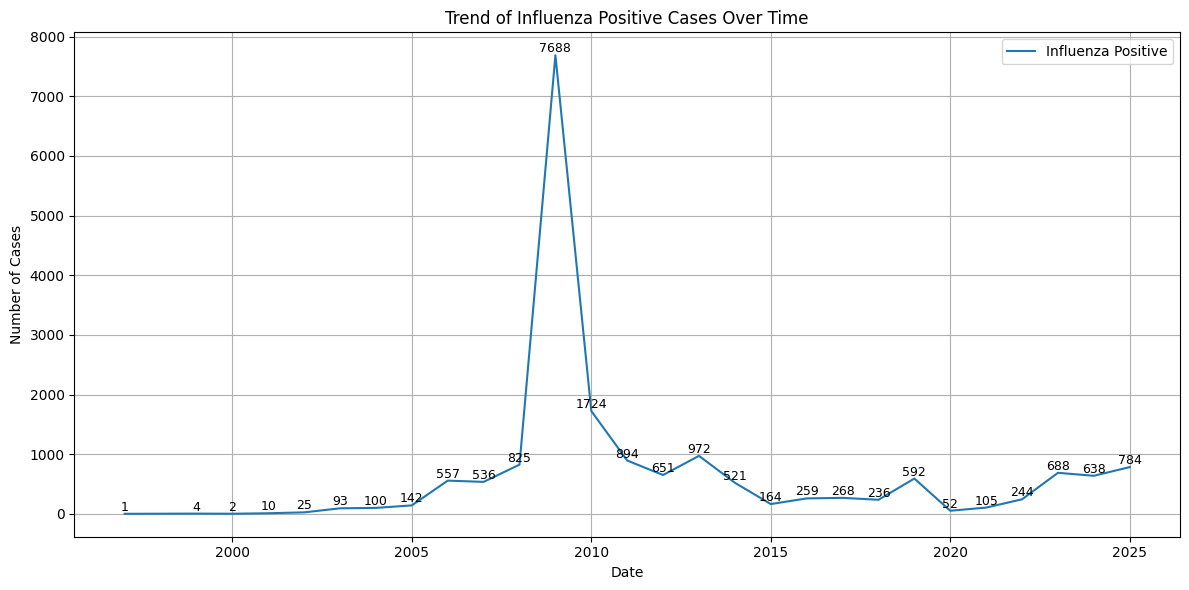

In [ ]:
import matplotlib.pyplot as plt

# Overall Trend of Influenza Positive Cases
plt.figure(figsize=(12, 6))
plt.plot(yearly_summary['Year'], yearly_summary['Influenza positive'], label='Influenza Positive', color='tab:blue')

# Add labels for each point
for x, y in zip(yearly_summary['Year'], yearly_summary['Influenza positive']):
    plt.text(x, y, str(y), fontsize=9, ha='center', va='bottom')

plt.title('Trend of Influenza Positive Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

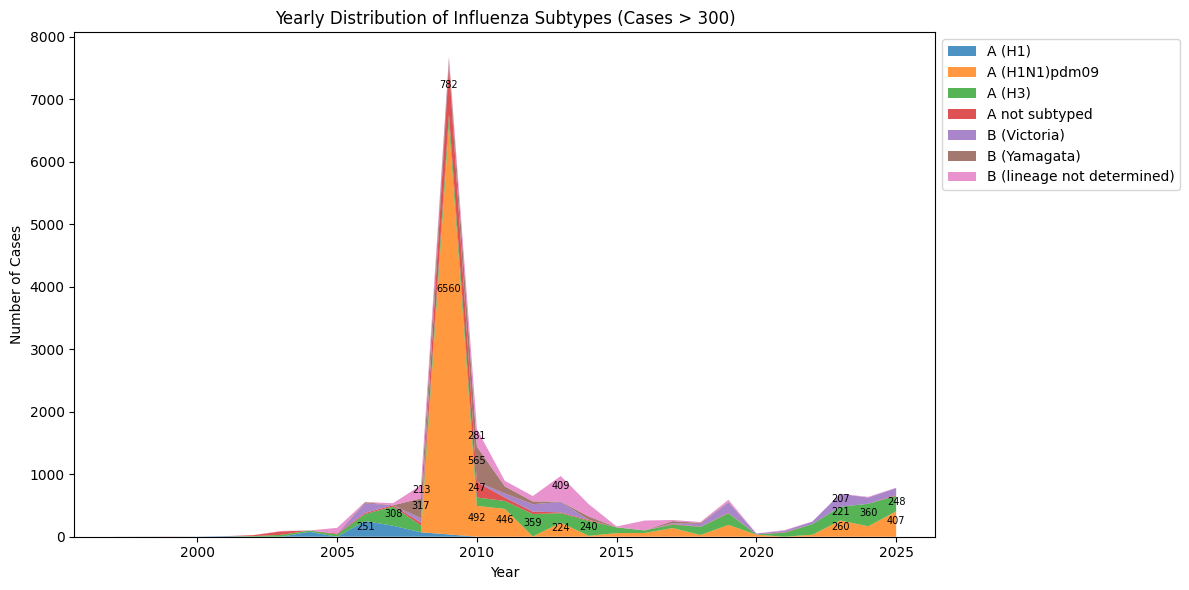

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the stacked area chart
plt.stackplot(
    yearly_summary['Year'],
    [yearly_summary[col] for col in subtype_cols],
    labels=subtype_cols,
    alpha=0.8
)

years = yearly_summary['Year']
cumulative = yearly_summary[subtype_cols].cumsum(axis=1)

# Add labels
for col in subtype_cols:
    for x, y_bottom, y_top in zip(
        years,
        cumulative[col] - yearly_summary[col],
        cumulative[col]
    ):
        value = y_top - y_bottom


        if value > 100 and (y_top - y_bottom) > 200:
            offset = value * 0.1
            plt.text(
                x,
                y_bottom + (value / 2) + offset,
                f"{int(value)}",
                fontsize=7,
                ha='center',
                va='center'
            )

plt.title('Yearly Distribution of Influenza Subtypes (Cases > 300)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

# Legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

/tmp/ipython-input-3704055679.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = df.groupby('Month')['Influenza positive'].mean()


Month
January       7.126126
February      6.881188
March         5.369369
April         3.327103
May           5.908257
June         50.403670
July         35.172727
August       20.781818
September    14.927273
October      11.431193
November      7.166667
December      4.722222
Name: Influenza positive, dtype: float64


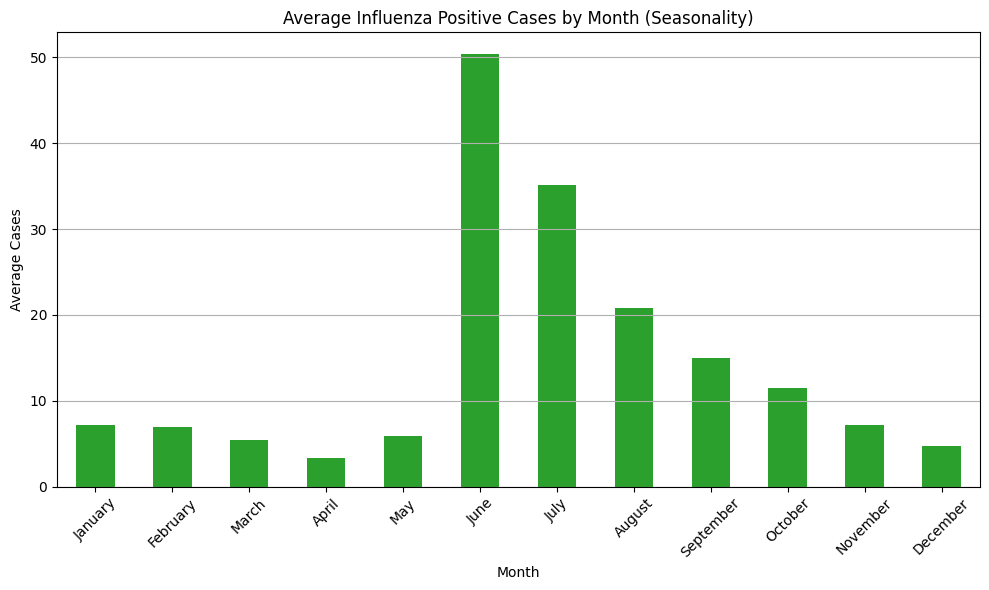

In [ ]:
# Seasonality: Average Positive Cases by Month
df['Month'] = df['Week start date (ISO 8601 calendar)'].dt.month_name()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)
monthly_avg = df.groupby('Month')['Influenza positive'].mean()

print(monthly_avg)

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='tab:green')
plt.title('Average Influenza Positive Cases by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()


In [ ]:
import numpy as np

# structure
head_df = df.head()
info_str = df.info(buf=None)

df.replace(["NA", ""], np.nan, inplace=True)

# Summary statistics for numeric columns
describe_df = df.describe(include='all')

# Count missing values
missing_df = df.isnull().sum()

# Unique values per column (text metrics)
unique_counts = df.nunique()

print("Head_df\n", head_df)
print("Describe_df\n", describe_df)
print("Missing_df\n", missing_df)
print("Unique_counts\n", unique_counts)

<class 'pandas.core.frame.DataFrame'>
Index: 1279 entries, 300 to 1278
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           1279 non-null   int64         
 1   Country area or territory            1279 non-null   object        
 2   Surveillance site type               1279 non-null   object        
 3   Year-week (ISO 8601 calendar)        1279 non-null   object        
 4   Week start date (ISO 8601 calendar)  1279 non-null   datetime64[ns]
 5   Specimen tested                      1279 non-null   int64         
 6   Influenza positive                   1279 non-null   int64         
 7   Influenza negative                   1279 non-null   int64         
 8   A (H1)                               1279 non-null   float64       
 9   A (H1N1)pdm09                        1279 non-null   float64       
 10  A (H3)         

In [ ]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(f"\n=== TOP VALUES FOR: {col} ===")
    print(df[col].value_counts().head(10))

# SUBTYPE-SPECIFIC METRICS

subtypes = [
    "A (H1)", "A (H1N1)pdm09", "A (H3)", "A not subtyped",
    "B (Victoria)", "B (Yamagata)", "B (lineage not determined)"
]

print("\n=== INFLUENZA SUBTYPE SUMS ===")
print(df[subtypes].sum())

print("\n=== INFLUENZA SUBTYPE NON-MISSING COUNTS ===")
print(df[subtypes].count())

print("\n=== INFLUENZA SUBTYPE ZERO COUNTS ===")
print((df[subtypes] == 0).sum())

df['Year'] = df['Year-week (ISO 8601 calendar)'].astype(str).str.split('-').str[0]

# YEARLY SUBTYPE TOTALS

print("\n=== YEARLY TOTALS PER SUBTYPE ===")
print(df.groupby('Year')[subtypes].sum())


# INFLUENZA A vs B YEARLY TOTALS

df['Total_A'] = (
    df["A (H1)"].fillna(0)
    + df["A (H1N1)pdm09"].fillna(0)
    + df["A (H3)"].fillna(0)
    + df["A not subtyped"].fillna(0)
)

df['Total_B'] = (
    df["B (Victoria)"].fillna(0)
    + df["B (Yamagata)"].fillna(0)
    + df["B (lineage not determined)"].fillna(0)
)

print("\n=== YEARLY TOTALS: INFLUENZA A vs B ===")
print(df.groupby('Year')[['Total_A', 'Total_B']].sum())


# DATE CONSISTENCY CHECKS

print("\n=== UNIQUE YEAR-WEEKS ===")
print(df["Year-week (ISO 8601 calendar)"].nunique())

print("\n=== UNIQUE WEEK START DATES ===")
print(df["Week start date (ISO 8601 calendar)"].nunique())




=== TOP VALUES FOR: Country area or territory ===
Country area or territory
Philippines    1279
Name: count, dtype: int64

=== TOP VALUES FOR: Surveillance site type ===
Surveillance site type
Not defined     1187
Non-sentinel      46
Sentinel          46
Name: count, dtype: int64

=== TOP VALUES FOR: Year-week (ISO 8601 calendar) ===
Year-week (ISO 8601 calendar)
2025-02    2
2025-03    2
2025-04    2
2025-05    2
2025-06    2
2025-07    2
2025-08    2
2025-09    2
2025-10    2
2025-11    2
Name: count, dtype: int64

=== INFLUENZA SUBTYPE SUMS ===
A (H1)                         626.0
A (H1N1)pdm09                 9113.0
A (H3)                        3373.0
A not subtyped                1356.0
B (Victoria)                  1334.0
B (Yamagata)                  1253.0
B (lineage not determined)    1720.0
dtype: float64

=== INFLUENZA SUBTYPE NON-MISSING COUNTS ===
A (H1)                        1279
A (H1N1)pdm09                 1279
A (H3)                        1279
A not subtyped     

# **DATA PREPROCESSING**

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/FlunetData_Philippines_All Sites_for_01 January 1995 to 17 November 2025.xlsx - Raw Dataset.csv"

df = pd.read_csv(file_path)

df_original = df.copy()

# Total Number of Rows and Columns
print(f"TOTAL ROWS: {df.shape[0]}")
print(f"TOTAL COLUMNS: {df.shape[1]}")

# Show First 5 Rows
print("\nFIRST 5 ROWS")
display(df.head())

# Standardize Columns
df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_") for col in df.columns]
df_original.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_") for col in df_original.columns]

# Drop Unnecessary Columns
columns_to_drop = ['unnamed', 'unnamed:_0', 'surveillance_site_type']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df_original = df_original.drop(columns=[col for col in columns_to_drop if col in df_original.columns])

# Rename
rename_cols = {
    "country_area_or_territory": "country",
    "year_week_iso_8601_calendar": "year_week",
    "week_start_date_iso_8601_calendar": "start_date"
}
df.rename(columns=rename_cols, inplace=True)
df_original.rename(columns=rename_cols, inplace=True)

# Updated Columns
print("\nUPDATED COLUMNS")
display(pd.DataFrame(df.columns, columns=["Column Name"]))

# Data Types
print("\nDATA TYPES")
display(df.dtypes.to_frame("Data Type"))

# Raw Statistics of Cases
count_cols = ['specimen_tested', 'influenza_positive', 'influenza_negative']
total_specimen_raw = df_original['specimen_tested'].sum()
total_positive_raw = df_original['influenza_positive'].sum()
total_negative_raw = df_original['influenza_negative'].sum()

# Missing Values
df = df.fillna(0)
df.replace(["N/A", "NA", "—", " "], 0, inplace=True)

# Negative Values
invalid_values = {col: (df[col] < 0).sum() for col in count_cols if col in df.columns}
print("\nNEGATIVE VALUES PER COLUMN")
display(pd.DataFrame(list(invalid_values.items()), columns=["Column", "Negative Values"]))

# Rows Where Total Specimens Doesn't Match Influenza Positive + Influenza Negative
invalid_rows = df[df['specimen_tested'] != (df['influenza_positive'] + df['influenza_negative'])]
print("\nROWS WHERE TOTAL SPECIMENS DOESN'T MATCH POSITIVE + NEGATIVE CASES")
display(invalid_rows)
print(f"Total Invalid Rows: {invalid_rows.shape[0]}")
df = df[df['specimen_tested'] == (df['influenza_positive'] + df['influenza_negative'])]
df = df[~((df['specimen_tested'] == 0) & (df['influenza_positive'] > 0))]

# Columns For Influenza Subtypes
subtype_cols = ['a_h1', 'a_h1n1pdm09', 'a_h3', 'a_not_subtyped', 'b_victoria', 'b_yamagata', 'b_lineage_not_determined']

# Rows Where Influenza Positive Is Not Equal To Sum Of Subtypes
wrong_positive_rows = df[df['influenza_positive'] != df[subtype_cols].sum(axis=1)]
print("ROWS WHERE INFLUENZA POSITIVE DOESN'T MATCH THE SUM OF SUBTYPES")
display(wrong_positive_rows)
print("Total Rows With Mismatch:", wrong_positive_rows.shape[0])

# Duplicate Rows
dupes = df[df.duplicated(['year_week', 'start_date'], keep=False)]

if dupes.empty:
    print("No duplicates found!")
else:
    print("DUPLICATE ROWS")
    display(dupes.sort_values(['year_week', 'start_date']))

    sum_cols = [
        'specimen_tested', 'influenza_positive', 'influenza_negative',
        'a_h1', 'a_h1n1pdm09', 'a_h3', 'a_not_subtyped',
        'b_victoria', 'b_yamagata', 'b_lineage_not_determined'
    ]

    df_fixed = (
        df.groupby(['year_week', 'start_date'], as_index=False)[sum_cols]
          .sum()
    )

    non_sum_cols = [c for c in df.columns if c not in sum_cols and c not in ['year_week', 'start_date']]
    df_non_sum = df.groupby(['year_week', 'start_date'], as_index=False)[non_sum_cols].first()

    df_fixed = df_fixed.merge(df_non_sum, on=['year_week', 'start_date'], how='left')

    print("\nFIXED DUPLICATES")

    duplicate_keys = dupes[['year_week', 'start_date']].drop_duplicates()
    fixed_subset = df_fixed.merge(duplicate_keys, on=['year_week', 'start_date'], how='inner')
    display(fixed_subset)

    df = df_fixed.copy()

    print(f"\nNew Total Rows After Merge: {df.shape[0]}")


# Convert Data Types
df[count_cols] = df[count_cols].astype(int)
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Sort by start_date
df = df.sort_values(by='start_date')
separator = pd.DataFrame([["..."] * len(df.columns)], columns=df.columns)
cleaned_overview = pd.concat([df.head(), separator, df.tail()])

# Rechecking stats
invalid_positive_subtype_rows = df[df['influenza_positive'] != df[subtype_cols].sum(axis=1)].shape[0]
total_rows_cleaned = df.shape[0]
total_columns_cleaned = df.shape[1]
total_missing_cleaned = df.isnull().sum().sum()
duplicate_rows_cleaned = df[df.duplicated()].shape[0]
negative_values_cleaned = sum((df[col] < 0).sum() for col in count_cols)
invalid_rows_cleaned = df[df['specimen_tested'] != (df['influenza_positive'] + df['influenza_negative'])].shape[0]
rows_with_positive = df[df['influenza_positive'] > 0].shape[0]
rows_with_negative = df[df['influenza_negative'] > 0].shape[0]

total_specimen_cleaned = df['specimen_tested'].sum()
total_positive_cleaned = df['influenza_positive'].sum()
total_negative_cleaned = df['influenza_negative'].sum()

rechecking_stats = pd.DataFrame({
    "Rechecking": [
        "Updated Rows",
        "Updated Columns",
        "Updated Missing Values",
        "Updated Duplicate Values",
        "Updated Negative Values",
        "Updated Rows Where Total Number of Specimens Doesn't Match Positive + Negative Cases",
        "Updated Rows Where Influenza Positive Doesn't Match Sum of Subtypes",
        "Rows with Influenza Positive",
        "Rows with Influenza Negative"
    ],
    "Value": [
        total_rows_cleaned,
        total_columns_cleaned,
        total_missing_cleaned,
        duplicate_rows_cleaned,
        negative_values_cleaned,
        invalid_rows_cleaned,
        invalid_positive_subtype_rows,
        rows_with_positive,
        rows_with_negative
    ]
})

print("\nRECHECKING")
display(rechecking_stats)

# About Cases
about_cases_stats = pd.DataFrame({
    "About Cases": [
        "Raw Specimen Tested",
        "Updated Specimen Tested",
        "Raw Influenza Positive",
        "Updated Influenza Positive",
        "Raw Influenza Negative",
        "Updated Influenza Negative"
    ],
    "Value": [
        total_specimen_raw,
        total_specimen_cleaned,
        total_positive_raw,
        total_positive_cleaned,
        total_negative_raw,
        total_negative_cleaned
    ]
})

print("\nABOUT CASES")
display(about_cases_stats)

# Lost Cases
lost_cases_stats = pd.DataFrame({
    "Lost Cases": [
        "Specimen Tested",
        "Influenza Positive",
        "Influenza Negative"
    ],
    "Value": [
        total_specimen_raw - total_specimen_cleaned,
        total_positive_raw - total_positive_cleaned,
        total_negative_raw - total_negative_cleaned
    ]
})

print("\nLOST CASES")
display(lost_cases_stats)

# Influenza Positive Subtypes
influenza_subtype_stats = pd.DataFrame({
    "Influenza Positive Subtypes": [
        "Raw A (H1)", "Updated A (H1)",
        "Raw A (H1N1)pdm09", "Updated A (H1N1)pdm09",
        "Raw A (H3)", "Updated A (H3)",
        "Raw A not subtyped", "Updated A not subtyped",
        "Raw B (Victoria)", "Updated B (Victoria)",
        "Raw B (Yamagata)", "Updated B (Yamagata)",
        "Raw B (lineage not determined)", "Updated B (lineage not determined)"
    ],
    "Value": [
        df_original['a_h1'].sum() if 'a_h1' in df_original.columns else 0,
        df['a_h1'].sum() if 'a_h1' in df.columns else 0,
        df_original['a_h1n1pdm09'].sum() if 'a_h1n1pdm09' in df_original.columns else 0,
        df['a_h1n1pdm09'].sum() if 'a_h1n1pdm09' in df.columns else 0,
        df_original['a_h3'].sum() if 'a_h3' in df_original.columns else 0,
        df['a_h3'].sum() if 'a_h3' in df.columns else 0,
        df_original['a_not_subtyped'].sum() if 'a_not_subtyped' in df_original.columns else 0,
        df['a_not_subtyped'].sum() if 'a_not_subtyped' in df.columns else 0,
        df_original['b_victoria'].sum() if 'b_victoria' in df_original.columns else 0,
        df['b_victoria'].sum() if 'b_victoria' in df.columns else 0,
        df_original['b_yamagata'].sum() if 'b_yamagata' in df_original.columns else 0,
        df['b_yamagata'].sum() if 'b_yamagata' in df.columns else 0,
        df_original['b_lineage_not_determined'].sum() if 'b_lineage_not_determined' in df_original.columns else 0,
        df['b_lineage_not_determined'].sum() if 'b_lineage_not_determined' in df.columns else 0
    ]
})

print("\nINFLUENZA POSITIVE SUBTYPES")
display(influenza_subtype_stats)

# Lost Cases for Influenza Positive Subtypes
lost_subtype_cases_stats = pd.DataFrame({
    "Lost Positive Subtypes": [
        "A (H1)", "A (H1N1)pdm09", "A (H3)",
        "A not subtyped", "B (Victoria)", "B (Yamagata)", "B (lineage not determined)"
    ],
    "Value": [
        (df_original['a_h1'].sum() if 'a_h1' in df_original.columns else 0) - (df['a_h1'].sum() if 'a_h1' in df.columns else 0),
        (df_original['a_h1n1pdm09'].sum() if 'a_h1n1pdm09' in df_original.columns else 0) - (df['a_h1n1pdm09'].sum() if 'a_h1n1pdm09' in df.columns else 0),
        (df_original['a_h3'].sum() if 'a_h3' in df_original.columns else 0) - (df['a_h3'].sum() if 'a_h3' in df.columns else 0),
        (df_original['a_not_subtyped'].sum() if 'a_not_subtyped' in df_original.columns else 0) - (df['a_not_subtyped'].sum() if 'a_not_subtyped' in df.columns else 0),
        (df_original['b_victoria'].sum() if 'b_victoria' in df_original.columns else 0) - (df['b_victoria'].sum() if 'b_victoria' in df.columns else 0),
        (df_original['b_yamagata'].sum() if 'b_yamagata' in df_original.columns else 0) - (df['b_yamagata'].sum() if 'b_yamagata' in df.columns else 0),
        (df_original['b_lineage_not_determined'].sum() if 'b_lineage_not_determined' in df_original.columns else 0) - (df['b_lineage_not_determined'].sum() if 'b_lineage_not_determined' in df.columns else 0)
    ]
})

print("\nLOST CASES FOR INFLUENZA POSITIVE SUBTYPES")
display(lost_subtype_cases_stats)

# Export
export_file_name = "Influenza Cases Philippines (cleaned).csv"
df.to_csv(export_file_name, index=False)

print(f"Cleaned dataset exported as '{export_file_name}'")



TOTAL ROWS: 1279
TOTAL COLUMNS: 15

FIRST 5 ROWS


Unnamed: 0 Country area or territory Surveillance site type  \
0          50               Philippines            Not defined   
1          52               Philippines            Not defined   
2          53               Philippines            Not defined   
3          54               Philippines            Not defined   
4          55               Philippines            Not defined   

  Year-week (ISO 8601 calendar) Week start date (ISO 8601 calendar)  \
0                       2000-01                          2000-01-03   
1                       2002-01                          2001-12-31   
2                       2002-02                          2002-01-07   
3                       2002-03                          2002-01-14   
4                       2002-04                          2002-01-21   

   Specimen tested  Influenza positive  Influenza negative  A (H1)  \
0                2                   2                   0     2.0   
1               10                   0                  10     0.0   
2               18                   0                  18     0.0   
3               17                   0                  17     0.0   
4               13                   0                  13     0.0   

   A (H1N1)pdm09  A (H3)  A not subtyped  B (Victoria)  B (Yamagata)  \
0            NaN     NaN             NaN           NaN           NaN   
1            NaN     0.0             0.0           NaN           NaN   
2            NaN     0.0             0.0           NaN           NaN   
3            NaN     0.0             0.0           NaN           NaN   
4            NaN     0.0             0.0           NaN           NaN   

   B (lineage not determined)  
0                         NaN  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0


UPDATED COLUMNS


Column Name
0                    country
1                  year_week
2                 start_date
3            specimen_tested
4         influenza_positive
5         influenza_negative
6                       a_h1
7                a_h1n1pdm09
8                       a_h3
9             a_not_subtyped
10                b_victoria
11                b_yamagata
12  b_lineage_not_determined


DATA TYPES


Data Type
country                     object
year_week                   object
start_date                  object
specimen_tested              int64
influenza_positive           int64
influenza_negative           int64
a_h1                       float64
a_h1n1pdm09                float64
a_h3                       float64
a_not_subtyped             float64
b_victoria                 float64
b_yamagata                 float64
b_lineage_not_determined   float64


NEGATIVE VALUES PER COLUMN


Column  Negative Values
0     specimen_tested                0
1  influenza_positive                0
2  influenza_negative                0


ROWS WHERE TOTAL SPECIMENS DOESN'T MATCH POSITIVE + NEGATIVE CASES


country year_week  start_date  specimen_tested  influenza_positive  \
143   Philippines   2013-11  2013-03-11              128                  28   
240   Philippines   2022-01  2022-01-03               37                   0   
241   Philippines   2022-02  2022-01-10               47                   0   
242   Philippines   2022-03  2022-01-17               28                   0   
243   Philippines   2022-04  2022-01-24               31                   0   
244   Philippines   2022-05  2022-01-31               23                   0   
245   Philippines   2022-06  2022-02-07               29                   0   
739   Philippines   2013-13  2013-03-25               59                  13   
753   Philippines   2013-27  2013-07-01              109                  12   
1190  Philippines   2024-32  2024-08-05              125                  52   

      influenza_negative  a_h1  a_h1n1pdm09  a_h3  a_not_subtyped  b_victoria  \
143                   99   0.0          2.0   0.0             0.0         3.0   
240                   35   0.0          0.0   0.0             0.0         0.0   
241                   46   0.0          0.0   0.0             0.0         0.0   
242                   23   0.0          0.0   0.0             0.0         0.0   
243                   27   0.0          0.0   0.0             0.0         0.0   
244                   20   0.0          0.0   0.0             0.0         0.0   
245                   28   0.0          0.0   0.0             0.0         0.0   
739                   45   0.0          0.0   0.0             0.0         8.0   
753                   96   0.0          4.0   0.0             0.0         4.0   
1190                  72   0.0         11.0  41.0             0.0         0.0   

      b_yamagata  b_lineage_not_determined  
143          0.0                      23.0  
240          0.0                       0.0  
241          0.0                       0.0  
242          0.0                       0.0  
243          0.0                       0.0  
244          0.0                       0.0  
245          0.0                       0.0  
739          0.0                       5.0  
753          0.0                       4.0  
1190         0.0                       0.0

Total Invalid Rows: 10
ROWS WHERE INFLUENZA POSITIVE DOESN'T MATCH THE SUM OF SUBTYPES


Empty DataFrame
Columns: [country, year_week, start_date, specimen_tested, influenza_positive, influenza_negative, a_h1, a_h1n1pdm09, a_h3, a_not_subtyped, b_victoria, b_yamagata, b_lineage_not_determined]
Index: []

Total Rows With Mismatch: 0
DUPLICATE ROWS


country year_week  start_date  specimen_tested  influenza_positive  \
276   Philippines   2025-01  2024-12-30                4                   1   
277   Philippines   2025-01  2024-12-30               48                   8   
278   Philippines   2025-02  2025-01-06                5                   2   
279   Philippines   2025-02  2025-01-06               97                  11   
280   Philippines   2025-03  2025-01-13                4                   0   
...           ...       ...         ...              ...                 ...   
1274  Philippines   2025-44  2025-10-27              154                  54   
1275  Philippines   2025-45  2025-11-03               14                   1   
1276  Philippines   2025-45  2025-11-03               91                  16   
1277  Philippines   2025-46  2025-11-10                5                   1   
1278  Philippines   2025-46  2025-11-10               22                   4   

      influenza_negative  a_h1  a_h1n1pdm09  a_h3  a_not_subtyped  b_victoria  \
276                    3   0.0          0.0   0.0             0.0         1.0   
277                   40   0.0          3.0   0.0             0.0         5.0   
278                    3   0.0          0.0   0.0             0.0         2.0   
279                   86   0.0          4.0   0.0             0.0         6.0   
280                    4   0.0          0.0   0.0             0.0         0.0   
...                  ...   ...          ...   ...             ...         ...   
1274                 100   0.0          5.0  47.0             0.0         2.0   
1275                  13   0.0          0.0   1.0             0.0         0.0   
1276                  75   0.0          0.0  16.0             0.0         0.0   
1277                   4   0.0          0.0   1.0             0.0         0.0   
1278                  18   0.0          0.0   4.0             0.0         0.0   

      b_yamagata  b_lineage_not_determined  
276          0.0                       0.0  
277          0.0                       0.0  
278          0.0                       0.0  
279          0.0                       1.0  
280          0.0                       0.0  
...          ...                       ...  
1274         0.0                       0.0  
1275         0.0                       0.0  
1276         0.0                       0.0  
1277         0.0                       0.0  
1278         0.0                       0.0  

[92 rows x 13 columns]


FIXED DUPLICATES


year_week  start_date  specimen_tested  influenza_positive  \
0    2025-01  2024-12-30               52                   9   
1    2025-02  2025-01-06              102                  13   
2    2025-03  2025-01-13              106                  18   
3    2025-04  2025-01-20               90                  12   
4    2025-05  2025-01-27               96                  13   
5    2025-06  2025-02-03              112                  14   
6    2025-07  2025-02-10              100                  10   
7    2025-08  2025-02-17               92                  13   
8    2025-09  2025-02-24              112                  11   
9    2025-10  2025-03-03              104                  15   
10   2025-11  2025-03-10              100                   9   
11   2025-12  2025-03-17              103                  12   
12   2025-13  2025-03-24              103                  11   
13   2025-14  2025-03-31               95                  11   
14   2025-15  2025-04-07              110                   6   
15   2025-16  2025-04-14               78                   3   
16   2025-17  2025-04-21              107                   7   
17   2025-18  2025-04-28               86                  15   
18   2025-19  2025-05-05               92                   1   
19   2025-20  2025-05-12               79                   2   
20   2025-21  2025-05-19               97                   6   
21   2025-22  2025-05-26               86                   9   
22   2025-23  2025-06-02               76                   9   
23   2025-24  2025-06-09               67                   9   
24   2025-25  2025-06-16               75                   6   
25   2025-26  2025-06-23               78                   6   
26   2025-27  2025-06-30              109                  15   
27   2025-28  2025-07-07              106                  21   
28   2025-29  2025-07-14              100                  13   
29   2025-30  2025-07-21               80                  13   
30   2025-31  2025-07-28               92                  21   
31   2025-32  2025-08-04              125                  29   
32   2025-33  2025-08-11              169                  46   
33   2025-34  2025-08-18              135                  31   
34   2025-35  2025-08-25              119                  21   
35   2025-36  2025-09-01               98                  24   
36   2025-37  2025-09-08               74                  17   
37   2025-38  2025-09-15               70                  16   
38   2025-39  2025-09-22               57                  17   
39   2025-40  2025-09-29               61                  18   
40   2025-41  2025-10-06               73                  14   
41   2025-42  2025-10-13              147                  45   
42   2025-43  2025-10-20              215                  89   
43   2025-44  2025-10-27              193                  71   
44   2025-45  2025-11-03              105                  17   
45   2025-46  2025-11-10               27                   5   

    influenza_negative  a_h1  a_h1n1pdm09  a_h3  a_not_subtyped  b_victoria  \
0                   43   0.0          3.0   0.0             0.0         6.0   
1                   89   0.0          4.0   0.0             0.0         8.0   
2                   88   0.0         10.0   0.0             0.0         8.0   
3                   78   0.0          3.0   0.0             0.0         9.0   
4                   83   0.0          2.0   1.0             0.0         9.0   
5                   98   0.0          3.0   0.0             0.0        11.0   
6                   90   0.0          4.0   0.0             0.0         6.0   
7                   79   0.0          8.0   0.0             0.0         5.0   
8                  101   0.0          3.0   0.0             0.0         7.0   
9                   89   0.0          6.0   0.0             0.0         8.0   
10                  91   0.0          4.0   0.0             0.0         5.0   


New Total Rows After Merge: 1223

RECHECKING


Rechecking  Value
0                                       Updated Rows   1223
1                                    Updated Columns     13
2                             Updated Missing Values      0
3                           Updated Duplicate Values      0
4                            Updated Negative Values      0
5  Updated Rows Where Total Number of Specimens D...      0
6  Updated Rows Where Influenza Positive Doesn't ...      0
7                       Rows with Influenza Positive    914
8                       Rows with Influenza Negative   1159


ABOUT CASES


About Cases   Value
0         Raw Specimen Tested  118383
1     Updated Specimen Tested  117767
2      Raw Influenza Positive   18775
3  Updated Influenza Positive   18670
4      Raw Influenza Negative   99588
5  Updated Influenza Negative   99097


LOST CASES


Lost Cases  Value
0     Specimen Tested    616
1  Influenza Positive    105
2  Influenza Negative    491


INFLUENZA POSITIVE SUBTYPES


Influenza Positive Subtypes   Value
0                           Raw A (H1)   626.0
1                       Updated A (H1)   626.0
2                    Raw A (H1N1)pdm09  9113.0
3                Updated A (H1N1)pdm09  9096.0
4                           Raw A (H3)  3373.0
5                       Updated A (H3)  3332.0
6                   Raw A not subtyped  1356.0
7               Updated A not subtyped  1356.0
8                     Raw B (Victoria)  1334.0
9                 Updated B (Victoria)  1319.0
10                    Raw B (Yamagata)  1253.0
11                Updated B (Yamagata)  1253.0
12      Raw B (lineage not determined)  1720.0
13  Updated B (lineage not determined)  1688.0


LOST CASES FOR INFLUENZA POSITIVE SUBTYPES


Lost Positive Subtypes  Value
0                      A (H1)    0.0
1               A (H1N1)pdm09   17.0
2                      A (H3)   41.0
3              A not subtyped    0.0
4                B (Victoria)   15.0
5                B (Yamagata)    0.0
6  B (lineage not determined)   32.0

Cleaned dataset exported as 'Influenza Cases Philippines (cleaned).csv'


In [ ]:
# Subtype-specific Positivity Rates & Month-specific Outbreak Thresholds
import pandas as pd
import numpy as np
from IPython.display import display

file_path = "/content/Influenza Cases Philippines (cleaned).csv"

df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()
df['start_date'] = pd.to_datetime(df['start_date'])
df['specimen_tested'] = pd.to_numeric(df['specimen_tested'], errors='coerce').fillna(0)

subtypes = ['a_h1', 'a_h3', 'a_not_subtyped', 'b_victoria', 'b_yamagata', 'b_lineage_not_determined']

# Extract Year and Month
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month

# Compute Positivity Rates per Subtype
for sub in subtypes:
    df[f'{sub}_positivity_rate'] = np.where(
        df['specimen_tested'] > 0,
        df[sub] / df['specimen_tested'] * 100,
        0
    )

# Compute Month-specific thresholds per subtype
month_subtype_thresholds = {}
for sub in subtypes:
    month_subtype_thresholds[sub] = {}
    for month in range(1, 13):
        month_data = df[df['month'] == month][f'{sub}_positivity_rate']
        mean_val = month_data.mean()
        sd_val = month_data.std()
        threshold = mean_val + 1.65 * sd_val if not np.isnan(sd_val) else mean_val
        month_subtype_thresholds[sub][month] = threshold

# Flag Outbreaks using Month-specific thresholds
for sub in subtypes:
    df[f'{sub}_Outbreak'] = df.apply(
        lambda row: 'Yes' if row[f'{sub}_positivity_rate'] > month_subtype_thresholds[sub][row['month']] else 'No',
        axis=1
    )

month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

monthly_positivity = df.groupby('month')[[f'{sub}_positivity_rate' for sub in subtypes]].mean().reset_index()
monthly_positivity['month'] = monthly_positivity['month'].map(month_map)
monthly_positivity = monthly_positivity.round(2)

print("Monthly Positivity Rates per Subtype (Historical Average)")
display(monthly_positivity)

Monthly Positivity Rates per Subtype (Historical Average)


month  a_h1_positivity_rate  a_h3_positivity_rate  \
0     January                  0.99                  1.29   
1    February                  0.11                  0.63   
2       March                  0.04                  0.57   
3       April                  0.04                  1.13   
4         May                  0.61                  2.56   
5        June                  1.59                  3.10   
6        July                  0.75                  6.98   
7      August                  0.29                  7.15   
8   September                  0.90                  5.52   
9     October                  0.48                  4.70   
10   November                  0.11                  3.50   
11   December                  0.18                  2.64   

    a_not_subtyped_positivity_rate  b_victoria_positivity_rate  \
0                             0.07                        1.72   
1                             0.19                        1.50   
2                             0.40                        0.76   
3                             0.27                        0.45   
4                             0.42                        0.83   
5                             0.72                        0.74   
6                             1.37                        0.78   
7                             1.20                        0.77   
8                             0.58                        1.21   
9                             0.30                        1.19   
10                            0.15                        1.71   
11                            0.31                        3.03   

    b_yamagata_positivity_rate  b_lineage_not_determined_positivity_rate  
0                         0.66                                      1.89  
1                         0.48                                      2.45  
2                         0.26                                      1.77  
3                         1.27                                      1.43  
4                         0.20                                      1.79  
5                         0.58                                      1.67  
6                         0.67                                      2.56  
7                         0.93                                      2.50  
8                         0.99                                      2.21  
9                         1.19                                      1.22  
10                        0.87                                      1.50  
11                        0.41                                      3.34

# **STATIONARITY TESTS**

In [ ]:
# Install required packages
!pip install statsmodels pandas numpy matplotlib seaborn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Read the data
df = pd.read_csv("Influenza Cases Philippines (cleaned).csv")

# Convert start_date to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Sort by date
df = df.sort_values('start_date').reset_index(drop=True)

print(f"Data loaded: {len(df)} records from {df['start_date'].min()} to {df['start_date'].max()}")
print(f"\nFirst few rows:")
print(df.head(10))

Data loaded: 1218 records from 2001-12-31 00:00:00 to 2025-11-10 00:00:00

First few rows:
       country year_week start_date  specimen_tested  influenza_positive  \
0  Philippines   2002-01 2001-12-31               10                   0   
1  Philippines   2002-02 2002-01-07               18                   0   
2  Philippines   2002-03 2002-01-14               17                   0   
3  Philippines   2002-04 2002-01-21               13                   0   
4  Philippines   2002-05 2002-01-28               20                   0   
5  Philippines   2002-06 2002-02-04               20                   0   
6  Philippines   2002-07 2002-02-11               14                   0   
7  Philippines   2002-08 2002-02-18               16                   0   
8  Philippines   2002-09 2002-02-25                8                   0   
9  Philippines   2002-10 2002-03-04               12                   0   

   influenza_negative  a_h1  a_h1n1pdm09  a_h3  a_not_subtyped  b_victor

In [ ]:
def adf_test(series, name=''):
    """
    Perform Augmented Dickey-Fuller test
    H0: Series has a unit root (non-stationary)
    H1: Series is stationary
    """
    result = adfuller(series.dropna(), autolag='AIC')

    output = []
    output.append(f'\n{"="*70}')
    output.append(f'ADF Test Results for: {name}')
    output.append(f'{"="*70}')
    output.append(f'ADF Statistic: {result[0]:.6f}')
    output.append(f'p-value: {result[1]:.6f}')
    output.append(f'Number of Lags Used: {result[2]}')
    output.append(f'Number of Observations: {result[3]}')
    output.append('\nCritical Values:')
    for key, value in result[4].items():
        output.append(f'   {key}: {value:.3f}')

    # Interpretation
    if result[1] <= 0.05:
        output.append(f"\n✓ RESULT: Reject H0 (p-value = {result[1]:.6f})")
        output.append("  → Series is STATIONARY")
    else:
        output.append(f"\n✗ RESULT: Fail to reject H0 (p-value = {result[1]:.6f})")
        output.append("  → Series is NON-STATIONARY")

    # Print output
    for line in output:
        print(line)

    return result, output

def kpss_test(series, name='', regression='c'):
    """
    Perform KPSS test
    H0: Series is stationary
    H1: Series has a unit root (non-stationary)

    regression: 'c' for constant (level stationary)
                'ct' for constant and trend (trend stationary)
    """
    result = kpss(series.dropna(), regression=regression, nlags='auto')

    output = []
    output.append(f'\n{"="*70}')
    output.append(f'KPSS Test Results for: {name}')
    output.append(f'{"="*70}')
    output.append(f'KPSS Statistic: {result[0]:.6f}')
    output.append(f'p-value: {result[1]:.6f}')
    output.append(f'Number of Lags Used: {result[2]}')
    output.append('\nCritical Values:')
    for key, value in result[3].items():
        output.append(f'   {key}: {value:.3f}')

    # Interpretation
    if result[1] <= 0.05:
        output.append(f"\n✗ RESULT: Reject H0 (p-value = {result[1]:.6f})")
        output.append("  → Series is NON-STATIONARY")
    else:
        output.append(f"\n✓ RESULT: Fail to reject H0 (p-value = {result[1]:.6f})")
        output.append("  → Series is STATIONARY")

    # Print output
    for line in output:
        print(line)

    return result, output

def comprehensive_stationarity_test(series, name=''):
    """
    Perform both ADF and KPSS tests
    """
    print(f'\n{"#"*70}')
    print(f'# COMPREHENSIVE STATIONARITY ANALYSIS: {name}')
    print(f'{"#"*70}')

    # ADF Test
    adf_result, adf_output = adf_test(series, name)

    # KPSS Test (constant)
    kpss_result, kpss_output = kpss_test(series, name, regression='c')

    # Summary
    print(f'\n{"="*70}')
    print('COMBINED INTERPRETATION:')
    print(f'{"="*70}')

    adf_stationary = adf_result[1] <= 0.05
    kpss_stationary = kpss_result[1] > 0.05

    if adf_stationary and kpss_stationary:
        print("✓ Both tests indicate: STATIONARY")
    elif not adf_stationary and not kpss_stationary:
        print("✗ Both tests indicate: NON-STATIONARY")
    elif adf_stationary and not kpss_stationary:
        print("⚠ Conflicting results: Difference stationary")
    else:
        print("⚠ Conflicting results: Trend stationary")

    return adf_result, kpss_result, adf_output, kpss_output


# Define variables to test
test_variables = {
    'specimen_tested': 'Total Specimens Tested',
    'influenza_positive': 'Influenza Positive Cases',
    'influenza_negative': 'Influenza Negative Cases',
    'a_h1': 'A/H1 Cases (Non-pandemic)',
    'a_h1n1pdm09': 'A/H1N1pdm09 Cases',
    'a_h3': 'A/H3 Cases',
    'a_not_subtyped': 'A/Not Subtyped Cases',
    'b_victoria': 'B/Victoria Cases',
    'b_yamagata': 'B/Yamagata Cases',
    'b_lineage_not_determined': 'B/Lineage Not Determined Cases'
}

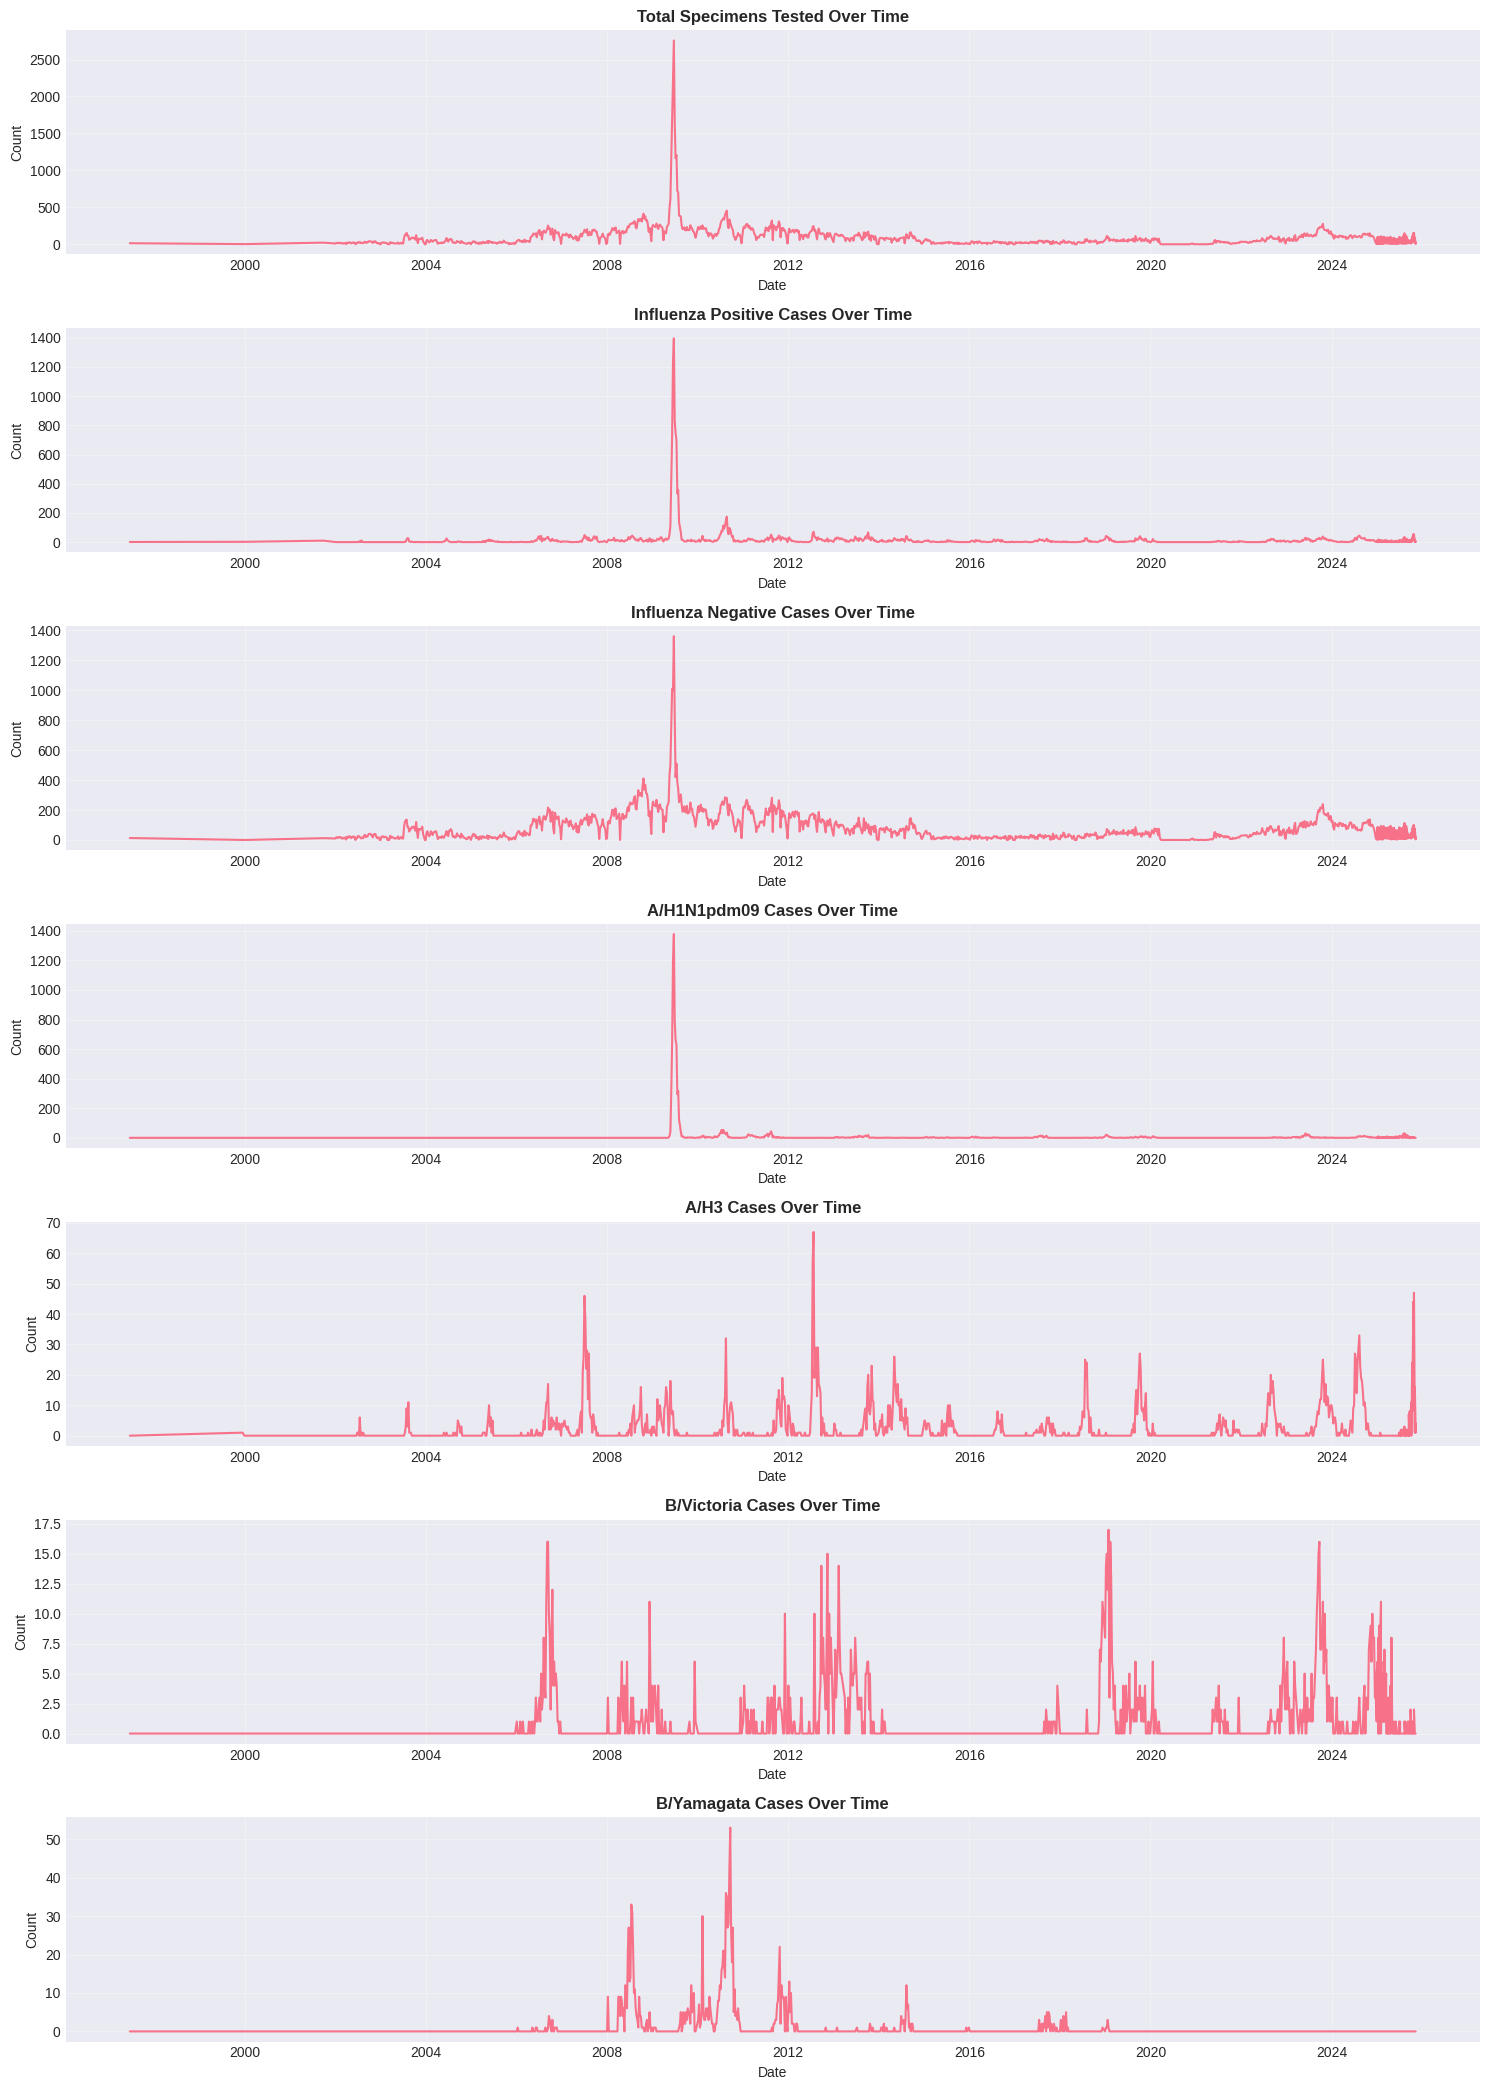

In [ ]:
fig, axes = plt.subplots(len(test_variables), 1, figsize=(15, 3*len(test_variables)))

for idx, (col, title) in enumerate(test_variables.items()):
    axes[idx].plot(df['start_date'], df[col], linewidth=1.5)
    axes[idx].set_title(f'{title} Over Time', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('timeseries_plots.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Store results
results_summary = []

for col, title in test_variables.items():
    if df[col].sum() > 0:  # Only test if there's data
        adf_res, kpss_res, adf_output, kpss_output = comprehensive_stationarity_test(df[col], title)

        results_summary.append({
            'Variable': title,
            'ADF_Statistic': adf_res[0],
            'ADF_pvalue': adf_res[1],
            'ADF_Stationary': 'Yes' if adf_res[1] <= 0.05 else 'No',
            'KPSS_Statistic': kpss_res[0],
            'KPSS_pvalue': kpss_res[1],
            'KPSS_Stationary': 'Yes' if kpss_res[1] > 0.05 else 'No'
        })

        results_df = pd.DataFrame(results_summary)


######################################################################
# COMPREHENSIVE STATIONARITY ANALYSIS: Total Specimens Tested
######################################################################

ADF Test Results for: Total Specimens Tested
ADF Statistic: -5.363043
p-value: 0.000004
Number of Lags Used: 12
Number of Observations: 1205

Critical Values:
   1%: -3.436
   5%: -2.864
   10%: -2.568

✓ RESULT: Reject H0 (p-value = 0.000004)
  → Series is STATIONARY

KPSS Test Results for: Total Specimens Tested
KPSS Statistic: 0.620382
p-value: 0.020783
Number of Lags Used: 19

Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

✗ RESULT: Reject H0 (p-value = 0.020783)
  → Series is NON-STATIONARY

COMBINED INTERPRETATION:
⚠ Conflicting results: Difference stationary

######################################################################
# COMPREHENSIVE STATIONARITY ANALYSIS: Influenza Positive Cases
############################################################

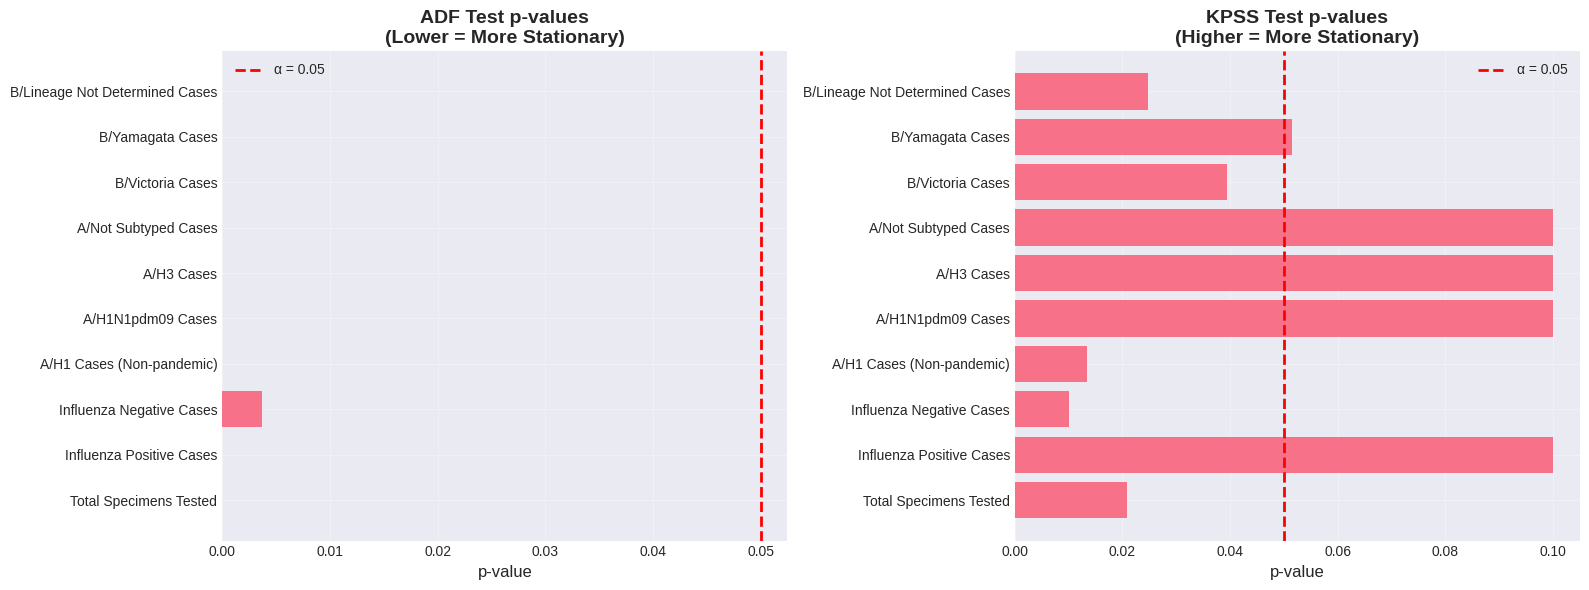

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ADF p-values
ax1.barh(results_df['Variable'], results_df['ADF_pvalue'])
ax1.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
ax1.set_xlabel('p-value', fontsize=12)
ax1.set_title('ADF Test p-values\n(Lower = More Stationary)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# KPSS p-values
ax2.barh(results_df['Variable'], results_df['KPSS_pvalue'])
ax2.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
ax2.set_xlabel('p-value', fontsize=12)
ax2.set_title('KPSS Test p-values\n(Higher = More Stationary)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('stationarity_tests_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# **TIME SERIES**

## **SARIMA**

In [ ]:
# --- IMPORT LIBRARIES ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import os
import gc

warnings.filterwarnings("ignore")

In [ ]:
# --- LOAD DATA AND CONFIGURATIONS ---
# Option 1: Global setting (Applying to everything)
import pandas as pd

# This tells pandas: "Print all floats with 6 decimal places, no scientific notation"
pd.options.display.float_format = '{:.6f}'.format

# Load data (2002 - 2025)
df = pd.read_csv('Influenza Cases Philippines (cleaned).csv')

# Drop columns that are not needed
df = df.drop(['country', 'year_week', 'specimen_tested', 'influenza_negative'], axis=1)

# Convert Date and Set Index
df['date'] = pd.to_datetime(df['start_date'])
df = df.set_index('date').sort_index()
df = df.drop('start_date', axis=1)

# Define subtypes
subtypes = [
    'a_h1',
    'a_h1n1pdm09',
    'a_not_subtyped',
    'a_h3',
    'b_victoria',
    'b_yamagata',
    'b_lineage_not_determined'
]

# Model Configurations (derived from auto-arima)
MODEL_CONFIGS = {
    'a_h1':               ((0,0,0), (0,1,0,52)),
    'a_h1n1pdm09':        ((0,1,1), (2,1,1,52)),
    'a_h3':               ((1,1,0), (2,1,0,52)),
    'a_not_subtyped':     ((2,1,0), (2,1,0,52)),
    'b_victoria':         ((0,1,1), (2,1,0,52)),
    'b_yamagata':         ((2,1,2), (1,1,1,52)),
    'b_lineage_not_determined': ((1,1,1), (0,1,2,52))
}


In [ ]:
# --- HELPER FUNCTIONS ---

def calculate_metrics(y_true, y_pred):
    # Ensure inputs are numpy arrays to prevent index mismatch errors
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Mask zeros to avoid division by zero error
    mask = y_true != 0
    if np.sum(mask) > 0:
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        mape = 0.0

    # SMAPE (Symmetric Mean Absolute Percentage Error)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0 # Fix division by zero
    smape = np.mean(diff) * 100

    return mae, mse, rmse, r2, mape, smape

try:
    from IPython.display import display
    def show_df(title, df_obj):
        print(f"\n{'='*10} {title} {'='*10}")
        display(df_obj)
except ImportError:
    def show_df(title, df_obj):
        print(f"\n{'='*10} {title} {'='*10}")
        print(df_obj)

In [ ]:
# --- MODEL TRAINING ---

# --- 1. Setup Folders ---
val_folder = "results_validation_2021_2025"
future_folder = "results_future_2026"
save_folder = "saved_models"
os.makedirs(save_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
os.makedirs(future_folder, exist_ok=True)

# --- 2. Containers ---
metrics_summary = []
peak_outbreaks_2026 = []

print("Starting Hybrid Processing (Validation + Forecasting) on PERCENTAGES...")

for col in subtypes:
    print(f"\nProcessing {col} (PCT)...", end=" ")

    # --- CRITICAL CHANGE: CALCULATE PERCENTAGE ---
    # We calculate (Subtype / Total Positive) * 100
    # np.where handles rows where total cases are 0 to avoid division by zero errors
    total_cases = df['influenza_positive']
    pct_values = np.where(total_cases > 0, (df[col] / total_cases) * 100.0, 0.0)

    # Convert to Pandas Series to keep the Date Index
    series = pd.Series(pct_values, index=df.index)

    # ==========================================
    # TASK A: VALIDATION (2020-2025)
    # ==========================================
    try:
        # 1. Split Data
        # Split by YEAR (train = 2002–2020, test = 2021–2025)
        train_data = series[(series.index.year >= 2002) & (series.index.year <= 2020)]
        test_data  = series[(series.index.year >= 2021) & (series.index.year <= 2025)]


        # 2. Train Model
        # We still use log1p to normalize the distribution of percentages
        train_log = np.log1p(train_data)

        my_order, my_seasonal = MODEL_CONFIGS.get(col, ((1,1,1), (1,1,0,52)))

        model_val = SARIMAX(train_log, order=my_order, seasonal_order=my_seasonal,
                            enforce_stationarity=False, enforce_invertibility=False)
        results_val = model_val.fit(disp=False)

        # 3. Forecast Validation
        forecast_val_log = results_val.get_forecast(steps=len(test_data))
        pred_val = np.expm1(forecast_val_log.predicted_mean)

        # --- NEW: CLAMP PREDICTIONS ---
        # Percentages cannot be < 0% or > 100%
        pred_val = np.clip(pred_val, 0, 100)

        # 4. Save to CSV
        val_df = pd.DataFrame({
            'Date': test_data.index,
            'Actual': test_data.values,
            'Forecast': pred_val.values
        })
        val_filename = os.path.join(val_folder, f"{col.replace('/', '_')}.csv")
        val_df.to_csv(val_filename, index=False)

        # 5. Calculate Metrics (Now interpreted as Percentage Points error)
        mae, mse, rmse, r2, mape, smape = calculate_metrics(test_data, pred_val)
        metrics_summary.append({
            'Subtype': col,
            'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape, 'SMAPE': smape
        })

        del model_val, results_val, forecast_val_log, pred_val, val_df
        gc.collect()

        # ==========================================
        # TASK B: FUTURE FORECASTING (2026)
        # ==========================================

        # 1. Train on FULL Percentage Data
        full_log = np.log1p(series)
        model_fut = SARIMAX(full_log, order=my_order, seasonal_order=my_seasonal,
                            enforce_stationarity=False, enforce_invertibility=False)
        results_fut = model_fut.fit(disp=False)

        # 2. Forecast Future
        forecast_fut_log = results_fut.get_forecast(steps=52)
        pred_fut = np.expm1(forecast_fut_log.predicted_mean)

        # --- NEW: CLAMP PREDICTIONS ---
        pred_fut = np.clip(pred_fut, 0, 100)

        # 3. Calculate Threshold (ON PERCENTAGES)
        # Example: Threshold might be 45.5% (Mean % + 1.96 * Std %)
        threshold = series.mean() + (1.96 * series.std())

        # 4. Generate Dates
        last_date = series.index[-1]
        future_dates = pd.date_range(start=last_date, periods=53, freq='W')[1:]

        # 5. Save Future CSV
        fut_df = pd.DataFrame({
            'Date': future_dates,
            'Forecast': pred_fut.values,
            'Threshold': threshold,
            'Is_Outbreak': pred_fut.values > threshold
        })
        fut_filename = os.path.join(future_folder, f"{col.replace('/', '_')}.csv")
        fut_df.to_csv(fut_filename, index=False)


        # 6. Capture Peak Info

        fut_df_2026 = fut_df[fut_df['Date'].dt.year == 2026]
        if not fut_df.empty:
            peak_row = fut_df.loc[fut_df['Forecast'].idxmax()]
            peak_outbreaks_2026.append({
                'Subtype': col,
                'Peak_Date': peak_row['Date'].date(),
                'Peak_Cases': round(peak_row['Forecast'], 6), # Peak Percentage now
                'Outbreak': "Yes" if peak_row['Is_Outbreak'] else "No",
                'Threshold_Used': round(threshold, 2)
            })

        del model_fut, results_fut, forecast_fut_log, pred_fut, fut_df
        gc.collect()

        print("Done.")

    except Exception as e:
        print(f"Error on {col}: {e}")
        gc.collect()

print("\nAll Processing Complete.")

Starting Hybrid Processing (Validation + Forecasting) on PERCENTAGES...

Processing a_h1 (PCT)... Done.

Processing a_h1n1pdm09 (PCT)... Done.

Processing a_not_subtyped (PCT)... Done.

Processing a_h3 (PCT)... Done.

Processing b_victoria (PCT)... Done.

Processing b_yamagata (PCT)... Done.

Processing b_lineage_not_determined (PCT)... Done.

All Processing Complete.


In [ ]:
# --- DISPLAY PER SUBTYPE METRICS ---
metrics_df = pd.DataFrame(metrics_summary)
show_df("Metrics (Train:2002-2020, Test:2021-2025)", metrics_df)


========== Metrics (Train:2002-2020, Test:2021-2025) ==========


Subtype       MAE         MSE      RMSE        R2  \
0                      a_h1  0.000000    0.000000  0.000000  1.000000   
1               a_h1n1pdm09 25.058308 1700.334505 41.235113 -0.564700   
2            a_not_subtyped  0.893091   51.654326  7.187094 -0.013805   
3                      a_h3 32.273773 2479.976256 49.799360 -0.717358   
4                b_victoria 20.874830 1215.007654 34.856960 -0.555282   
5                b_yamagata  0.100364    0.057640  0.240083  0.000000   
6  b_lineage_not_determined  1.896183   70.562445  8.400146 -0.025883   

        MAPE      SMAPE  
0   0.000000   0.000000  
1  97.940579 157.963231  
2  98.194705  42.667332  
3  99.917902 109.140537  
4 100.000000 115.789474  
5   0.000000  63.967611  
6  96.729987 161.868046

In [ ]:
# --- DISPLAY OVERALL METRICS ---
import pandas as pd


metrics_df = pd.DataFrame(metrics_summary)
avg_metrics = metrics_df.mean(numeric_only=True)

# 3. Print in the specific text format
print("=== Overall Metrics Across All Subtypes ===")
print(f"Overall MAE   : {avg_metrics['MAE']:.3f}")
print(f"Overall MSE   : {avg_metrics['MSE']:.3f}")
print(f"Overall RMSE  : {avg_metrics['RMSE']:.3f}")
print(f"Overall R²    : {avg_metrics['R2']:.3f}")
print(f"Overall MAPE  : {avg_metrics['MAPE']:.2f}%")
print(f"Overall sMAPE : {avg_metrics['SMAPE']:.2f}%")

=== Overall Metrics Across All Subtypes ===
Overall MAE   : 11.585
Overall MSE   : 788.228
Overall RMSE  : 20.246
Overall R²    : -0.125
Overall MAPE  : 70.40%
Overall sMAPE : 93.06%


In [ ]:
# --- LOAD VALIDATION DATA (2021-2025) ---

val_folder = "results_validation_2021_2025"
combined_data = []

for filename in os.listdir(val_folder):
    if filename.endswith(".csv"):
        temp_df = pd.read_csv(os.path.join(val_folder, filename))
        subtype_name = filename.replace(".csv", "")
        temp_df['Subtype'] = subtype_name
        combined_data.append(temp_df[['Date', 'Subtype', 'Actual', 'Forecast']])

# Merge to one DataFrame
df_master = pd.concat(combined_data)

In [ ]:
# --- DISPLAY ACTUAL DATA (2021 - 2025) ---

df_actual_wide = df_master.pivot(index='Date', columns='Subtype', values='Actual')
show_df("ACTUAL DATA (2021-2025)", df_actual_wide)


========== ACTUAL DATA (2021-2025) ==========


Subtype        a_h1  a_h1n1pdm09       a_h3  a_not_subtyped  \
Date                                                          
2021-01-04 0.000000     0.000000   0.000000        0.000000   
2021-01-11 0.000000     0.000000   0.000000        0.000000   
2021-01-18 0.000000     0.000000   0.000000        0.000000   
2021-01-25 0.000000     0.000000   0.000000        0.000000   
2021-02-01 0.000000     0.000000   0.000000        0.000000   
...             ...          ...        ...             ...   
2025-10-13 0.000000    20.000000  71.111111        6.666667   
2025-10-20 0.000000     5.617978  89.887640        3.370787   
2025-10-27 0.000000     7.042254  88.732394        1.408451   
2025-11-03 0.000000     0.000000 100.000000        0.000000   
2025-11-10 0.000000     0.000000 100.000000        0.000000   

Subtype     b_lineage_not_determined  b_victoria  b_yamagata  
Date                                                          
2021-01-04                  0.000000    0.000000    0.000000  
2021-01-11                  0.000000    0.000000    0.000000  
2021-01-18                  0.000000    0.000000    0.000000  
2021-01-25                  0.000000    0.000000    0.000000  
2021-02-01                  0.000000    0.000000    0.000000  
...                              ...         ...         ...  
2025-10-13                  0.000000    2.222222    0.000000  
2025-10-20                  0.000000    1.123596    0.000000  
2025-10-27                  0.000000    2.816901    0.000000  
2025-11-03                  0.000000    0.000000    0.000000  
2025-11-10                  0.000000    0.000000    0.000000  

[247 rows x 7 columns]

In [ ]:
# --- DISPLAY FORECAST DATA (2021-2025) ---
df_forecast_wide = df_master.pivot(index='Date', columns='Subtype', values='Forecast')
show_df("FORECAST DATA (2021-2025)", df_forecast_wide)



========== FORECAST DATA (2021-2025) ==========


Subtype        a_h1  a_h1n1pdm09     a_h3  a_not_subtyped  \
Date                                                        
2021-01-04 0.000000     0.000000 0.000000        0.000000   
2021-01-11 0.000000     0.000000 0.000000        0.000000   
2021-01-18 0.000000     0.000000 0.000000        0.000000   
2021-01-25 0.000000     0.000000 0.000000        0.000000   
2021-02-01 0.000000     0.000000 0.000000        0.448428   
...             ...          ...      ...             ...   
2025-10-13 0.000000     0.636267 0.000000        0.000000   
2025-10-20 0.000000     0.550483 0.000000        0.000000   
2025-10-27 0.000000     0.863179 0.000000        0.000000   
2025-11-03 0.000000     0.567979 0.000000        0.000000   
2025-11-10 0.000000     0.403454 0.000000        0.142328   

Subtype     b_lineage_not_determined  b_victoria  b_yamagata  
Date                                                          
2021-01-04                  0.262107    0.000000    0.153689  
2021-01-11                  0.615806    0.000000    0.334376  
2021-01-18                  0.968765    5.683452    0.504355  
2021-01-25                  0.046838    0.000000    0.736775  
2021-02-01                  0.554417    0.000000    1.037963  
...                              ...         ...         ...  
2025-10-13                  0.000000    0.000000    0.000000  
2025-10-20                  0.004819    0.000000    0.000000  
2025-10-27                  0.200365    0.000000    0.000000  
2025-11-03                  0.490586    0.000000    0.000000  
2025-11-10                  0.000000    0.000000    0.000000  

[247 rows x 7 columns]


Consolidated Actual vs Forecast:


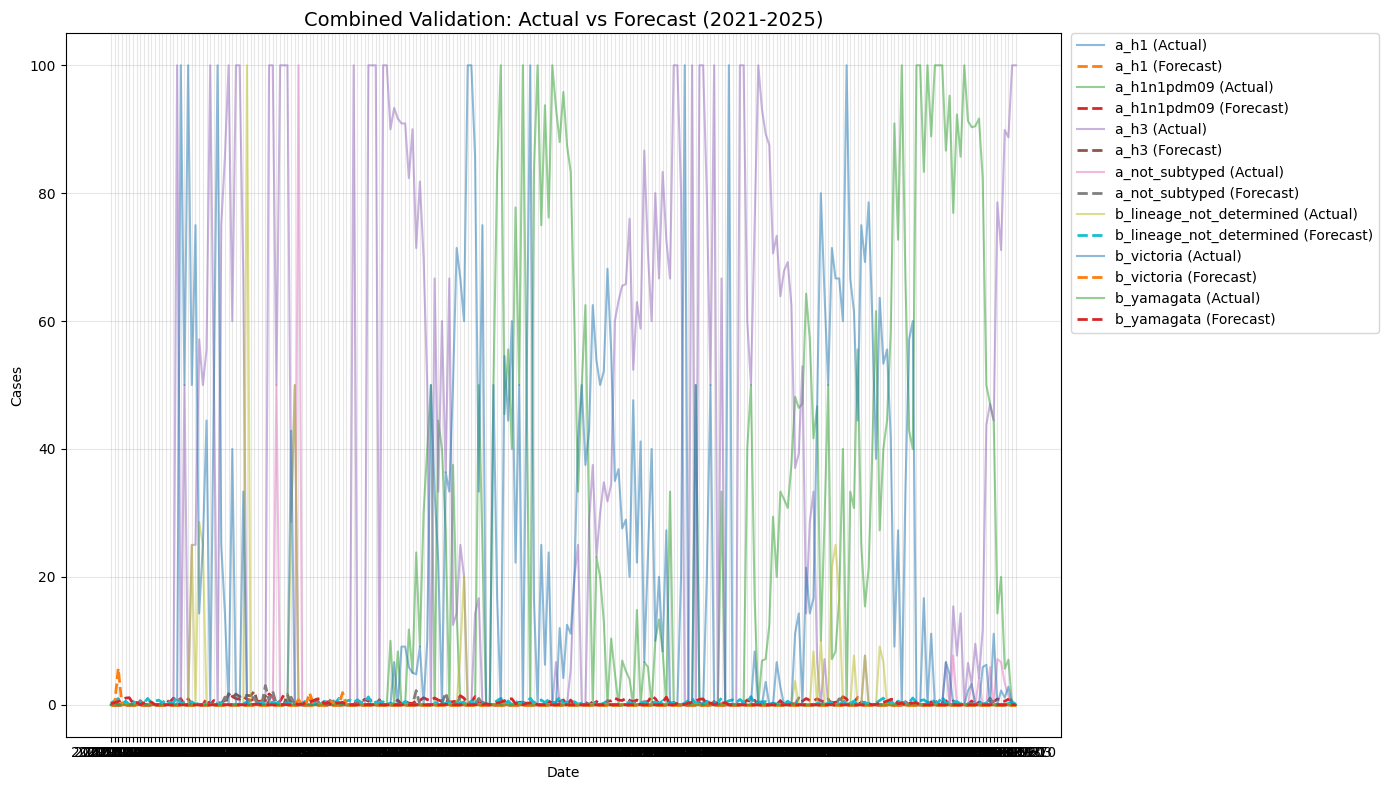

In [ ]:
# --- VISUALIZATION ACTUAL VS FORECAST DATA (2021-2025) ---

# Get the list of subtypes (columns) from your existing table
cols = df_actual_wide.columns

print("\nConsolidated Actual vs Forecast:")
plt.figure(figsize=(14, 8))

for col in cols:
    plt.plot(df_actual_wide.index, df_actual_wide[col],
             label=f'{col} (Actual)', alpha=0.5)
    plt.plot(df_forecast_wide.index, df_forecast_wide[col],
             label=f'{col} (Forecast)', linestyle='--', linewidth=2)

plt.title("Combined Validation: Actual vs Forecast (2021-2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("SARIMA_ActualvsForecast_graph.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# --- THRESHOLD COMPUTATION ---

future_folder = "results_future_2026"

print("Thresholds (outbreak triggers):")
for filename in sorted(os.listdir(future_folder)):
    if filename.endswith(".csv"):
        filepath = os.path.join(future_folder, filename)
        temp_df = pd.read_csv(filepath, nrows=1)
        thresh_val = temp_df['Threshold'].iloc[0]
        clean_name = filename.replace(".csv", "")
        print(f" {clean_name}: {thresh_val:.2f}")



Thresholds (outbreak triggers):
 a_h1: 33.92
 a_h1n1pdm09: 74.19
 a_h3: 85.09
 a_not_subtyped: 28.82
 b_lineage_not_determined: 68.21
 b_victoria: 52.91
 b_yamagata: 43.04


In [ ]:
# --- WEEKLY FORECAST ---
import pandas as pd
import os
import math
from IPython.display import display

# --- CONFIGURATION ---
future_folder = "results_future_2026"

# Container for the merged data
merged_df = pd.DataFrame()

# 1. LOAD AND MERGE FILES
# Get list of files and sort them so the columns appear in a consistent order
files = sorted([f for f in os.listdir(future_folder) if f.endswith(".csv")])

for filename in files:
    # Read the individual subtype file
    filepath = os.path.join(future_folder, filename)
    df_temp = pd.read_csv(filepath, parse_dates=['Date'])

    # Clean the Subtype Name for the Header
    # Logic: "Influenza_A_H1.csv" -> "a_h1"
    clean_name = filename.replace(".csv", "")

    # Rename the columns to match your requested format
    # Forecast -> {name}_Pct
    # Is_Outbreak -> {name}_Outbreak
    df_temp = df_temp.rename(columns={
        'Forecast': f'{clean_name}_Pct',
        'Is_Outbreak': f'{clean_name}_Outbreak'
    })

    # Select only the columns we need for the merge
    df_subset = df_temp[['Date', f'{clean_name}_Pct', f'{clean_name}_Outbreak']]

    # Merge into the master dataframe
    if merged_df.empty:
        merged_df = df_subset
    else:
        # Outer join ensures we don't lose rows if dates are slightly different
        merged_df = pd.merge(merged_df, df_subset, on='Date', how='outer')

# 2. ADD DATE METADATA
merged_df = merged_df.sort_values(by='Date')

# Add 'Month' (e.g., "November")
merged_df.insert(1, 'Month', merged_df['Date'].dt.month_name())

# Add 'Week_of_Month'
# Logic: (Day of Month - 1) // 7 + 1
merged_df.insert(2, 'Week_of_Month', (merged_df['Date'].dt.day - 1) // 7 + 1)

# 3. FORMATTING VALUES
# Fill any NaNs with 0 (safe for percentages)
merged_df = merged_df.fillna(0)

for col in merged_df.columns:
    if "_Pct" in col:
        # Round percentages to 2 decimal places
        merged_df[col] = merged_df[col].astype(float).round(2)

    elif "_Outbreak" in col:
        # Convert True/False/1/0 to "Yes" or "No"
        merged_df[col] = merged_df[col].apply(lambda x: "Yes" if (x == True or x == 1 or x == "Yes") else "No")

# 4. DISPLAY THE TABLE
print("=== WEEKLY FORECAST 2026 (Wide Format) ===")
pd.set_option('display.max_columns', None) # Force pandas to show all columns
display(merged_df.head(10))


=== WEEKLY FORECAST 2026 (Wide Format) ===


Date     Month  Week_of_Month  a_h1_Pct a_h1_Outbreak  \
0 2025-11-23  November              4  0.000000            No   
1 2025-11-30  November              5  0.000000            No   
2 2025-12-07  December              1  0.000000            No   
3 2025-12-14  December              2  0.000000            No   
4 2025-12-21  December              3  0.000000            No   
5 2025-12-28  December              4  0.000000            No   
6 2026-01-04   January              1  0.000000            No   
7 2026-01-11   January              2  0.000000            No   
8 2026-01-18   January              3  0.000000            No   
9 2026-01-25   January              4  0.000000            No   

   a_h1n1pdm09_Pct a_h1n1pdm09_Outbreak  a_h3_Pct a_h3_Outbreak  \
0         2.270000                   No 60.550000            No   
1         1.040000                   No 61.950000            No   
2         1.760000                   No 43.510000            No   
3         1.700000                   No 41.290000            No   
4         1.900000                   No 47.530000            No   
5         1.970000                   No 48.180000            No   
6         0.940000                   No 16.020000            No   
7         1.320000                   No 17.230000            No   
8         1.740000                   No 42.060000            No   
9         1.340000                   No 42.960000            No   

   a_not_subtyped_Pct a_not_subtyped_Outbreak  b_lineage_not_determined_Pct  \
0            0.210000                      No                      0.130000   
1            0.110000                      No                      0.270000   
2            0.110000                      No                      0.380000   
3            0.130000                      No                      0.070000   
4            0.120000                      No                      0.260000   
5            0.120000                      No                      0.420000   
6            0.120000                      No                      0.080000   
7            0.120000                      No                      0.430000   
8            0.120000                      No                      0.000000   
9            0.120000                      No                      0.180000   

  b_lineage_not_determined_Outbreak  b_victoria_Pct b_victoria_Outbreak  \
0                                No        2.300000                  No   
1                                No        3.250000                  No   
2                                No        1.810000                  No   
3                                No        3.750000                  No   
4                                No        4.320000                  No   
5                                No        2.780000                  No   
6                                No        4.180000                  No   
7                                No        2.890000                  No   
8                                No        3.830000                  No   
9                                No        0.260000                  No   

   b_yamagata_Pct b_yamagata_Outbreak  
0        0.270000                  No  
1        0.360000                  No  
2        0.000000                  No  
3        0.200000                  No  
4        0.100000                  No  
5        0.140000                  No  
6        0.040000                  No  
7        0.000000                  No  
8        0.280000                  No  
9        0.050000                  No

In [ ]:
# --- MONTHLY FORECAST ---
import pandas as pd
import os
import calendar


# --- A. RE-LOAD THRESHOLDS (To ensure accuracy) ---
future_folder = "results_future_2026"
threshold_map = {}

for filename in os.listdir(future_folder):
    if filename.endswith(".csv"):
        # Read just the header and first row to get the threshold
        temp = pd.read_csv(os.path.join(future_folder, filename), nrows=1)

        # Clean name (e.g., "a_h1")
        clean_name = filename.replace(".csv", "").lower()\
            .replace("influenza_", "").replace(" ", "_").replace("-", "_")\
            .replace("(", "").replace(")", "")

        threshold_map[clean_name] = temp['Threshold'].iloc[0]

# --- B. GROUP WEEKLY DATA INTO MONTHLY ---
# Ensure Date is datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create a sortable Month column
merged_df['Month_Num'] = merged_df['Date'].dt.month
merged_df['Month'] = merged_df['Date'].dt.month_name()

# Identify all Percentage columns
pct_cols = [c for c in merged_df.columns if "_Pct" in c]

# Group by Month Number and Name, calculating the MEAN of percentages
monthly_grouped = merged_df.groupby(['Month_Num', 'Month'])[pct_cols].mean().reset_index()

# Sort by Month Number (1-12) then drop the number column
monthly_grouped = monthly_grouped.sort_values('Month_Num').drop(columns=['Month_Num'])

# --- C. RECALCULATE OUTBREAK FLAGS & FORMATTING ---
final_columns = ['Month']

# Iterate through each subtype to add its columns in the correct order
# We extract subtype names from the Pct columns
subtypes_list = [c.replace("_Pct", "") for c in pct_cols]

for subtype in subtypes_list:
    pct_col = f"{subtype}_Pct"
    outbreak_col = f"{subtype}_Outbreak"

    # 1. Get the Threshold for this subtype
    limit = threshold_map.get(subtype, 0)

    # 2. Create the Outbreak Column
    # Logic: If Monthly Average > Threshold -> "Yes"
    monthly_grouped[outbreak_col] = monthly_grouped[pct_col].apply(
        lambda x: "Yes" if x > limit else "No"
    )

    # 3. Round the Percentage (Matching your example's precision, e.g., 4 decimals)
    monthly_grouped[pct_col] = monthly_grouped[pct_col].round(4)

    # 4. Add to column list for final sorting
    final_columns.extend([pct_col, outbreak_col])

# Reorder the dataframe
monthly_final = monthly_grouped[final_columns]

# --- D. DISPLAY ---
print("=== MONTHLY FORECAST 2026 (Aggregated) ===")
pd.set_option('display.max_columns', None)
display(monthly_final)


=== MONTHLY FORECAST 2026 (Aggregated) ===


Month  a_h1_Pct a_h1_Outbreak  a_h1n1pdm09_Pct a_h1n1pdm09_Outbreak  \
0     January  0.000000            No         1.335000                   No   
1    February  0.000000            No         0.697500                   No   
2       March  0.000000            No         0.568000                   No   
3       April  0.000000            No         0.995000                   No   
4         May  0.000000            No         0.486000                   No   
5        June  0.000000            No         1.782500                   No   
6        July  0.000000            No         1.420000                   No   
7      August  0.000000            No         1.046000                   No   
8   September  0.000000            No         1.647500                   No   
9     October  0.000000            No         2.447500                   No   
10   November  0.000000            No         2.040000                   No   
11   December  0.000000            No         1.832500                   No   

     a_h3_Pct a_h3_Outbreak  a_not_subtyped_Pct a_not_subtyped_Outbreak  \
0   29.567500            No            0.120000                      No   
1   19.840000            No            0.120000                      No   
2   12.384000            No            0.120000                      No   
3   13.342500            No            0.120000                      No   
4    6.010000            No            0.120000                      No   
5   20.612500            No            0.120000                      No   
6   61.842500            No            0.402500                      No   
7   67.184000            No            0.252000                      No   
8   96.802500           Yes            0.557500                      No   
9  100.000000           Yes            0.820000                      No   
10  83.802000            No            0.210000                      No   
11  45.127500            No            0.120000                      No   

    b_lineage_not_determined_Pct b_lineage_not_determined_Outbreak  \
0                       0.172500                                No   
1                       0.167500                                No   
2                       0.302000                                No   
3                       0.175000                                No   
4                       0.330000                                No   
5                       0.390000                                No   
6                       0.232500                                No   
7                       0.092000                                No   
8                       0.130000                                No   
9                       0.002500                                No   
10                      0.234000                                No   
11                      0.282500                                No   

    b_victoria_Pct b_victoria_Outbreak  b_yamagata_Pct b_yamagata_Outbreak  
0         2.790000                  No        0.092500                  No  
1         1.350000                  No        0.255000                  No  
2         0.876000                  No        0.862000                  No  
3         0.592500                  No        0.362500                  No  
4         0.172000                  No        0.266000                  No  
5         0.000000                  No        0.110000                  No  
6         0.000000                  No        0.000000                  No  
7         0.026000                  No        0.000000                  No  
8         0.292500                  No        0.000000                  No  
9         0.182500                  No        0.047500                  No  
10        1.544000                  No        0.178000                  No  
11        3.165000                  No        0.110000                  No

In [ ]:
# --- PEAK OUTBREAKS ---
import pandas as pd

# 1. Create DataFrame from the list you populated in the loop
peak_df = pd.DataFrame(peak_outbreaks_2026)

# 2. Ensure Peak_Date is a proper datetime object for calculations
peak_df['Peak_Date'] = pd.to_datetime(peak_df['Peak_Date'])

# 3. Create 'Month' Column (e.g., "January")
peak_df['Month'] = peak_df['Peak_Date'].dt.month_name()

# 4. Create 'Week_of_Month' Column
# Formula: (Day of Month - 1) divided by 7, plus 1
peak_df['Week_of_Month'] = peak_df['Peak_Date'].apply(lambda d: (d.day - 1) // 7 + 1)

# 5. Clean Subtype Names (Optional, matches your requested format)
# If your 'col' was already "a_h1", you don't need this.
# But if it was "Influenza A (H1)", this cleans it.
peak_df['Subtype'] = peak_df['Subtype'].str.lower()\
    .str.replace("influenza_", "")\
    .str.replace(" ", "_")\
    .str.replace("-", "_")\
    .str.replace("(", "")\
    .str.replace(")", "")

# 6. Select and Rename Columns to match your output requirement
final_peak_df = peak_df[['Subtype', 'Month', 'Week_of_Month', 'Peak_Cases']].copy()
final_peak_df = final_peak_df.rename(columns={'Peak_Cases': 'Probability (%)'})

# 7. Display
print("=== Peak Outbreaks 2026 ===")
# pd.set_option('display.max_columns', None) # Optional safety
display(final_peak_df)

# Optional: Save to CSV for your thesis
# final_peak_df.to_csv("Peak_Outbreaks_2026_Final.csv", index=False)

=== Peak Outbreaks 2026 ===


Subtype     Month  Week_of_Month  Probability (%)
0                      a_h1  November              4         0.000000
1               a_h1n1pdm09   October              2         2.912634
2            a_not_subtyped      July              3         1.249776
3                      a_h3      July              4       100.000000
4                b_victoria  February              4         4.675150
5                b_yamagata     March              5         1.145179
6  b_lineage_not_determined      June              4         0.720756

## **Error, Trend, and Seasonality (ETS)**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Configure pandas to display all rows and columns nicely
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.3f}'.format) # Clean float formatting

# DATA LOADING AND PREPROCESSING

df = pd.read_csv("FlunetData_Philippines_All Sites_for_01 January 1995 to 17 November 2025.xlsx - Cleaned Dataset 2.0.csv")

# Date conversion and sorting
df['start_date'] = pd.to_datetime(df['start_date'])
df = df.sort_values('start_date').set_index('start_date')
df = df.asfreq('W-MON')

# Calculate Percentages
subtypes = ['a_h1', 'a_h1n1pdm09', 'a_h3', 'a_not_subtyped',
            'b_victoria', 'b_yamagata', 'b_lineage_not_determined']

for sub in subtypes:
    if sub in df.columns:
        df[f'pct_{sub}'] = df.apply(lambda row: (row[sub] / row['specimen_tested'] * 100)
                                    if row['specimen_tested'] > 0 else 0, axis=1)

In [ ]:
# MODEL CREATION

test_start_date = '2021-01-01'
train_df = df[df.index < test_start_date]
test_df = df[df.index >= test_start_date]

# Containers
y_true_all = []
y_pred_all = []
metrics_list = []
thresholds_list = []

# Result Tables
original_pct_table = test_df[[f'pct_{sub}' for sub in subtypes]].copy()
original_pct_table.columns = subtypes
forecast_pct_table = pd.DataFrame(index=test_df.index)

for sub in subtypes:
    target = f'pct_{sub}'
    train_series = train_df[target]
    test_series = test_df[target]

    # Calculate Threshold
    mu, sigma = train_series.mean(), train_series.std()
    thresholds_list.append({'Subtype': sub, 'Threshold (%)': mu + 2 * sigma})

    try:
        # Fit Model
        model = ExponentialSmoothing(
            train_series,
            trend='add',
            seasonal='add',
            seasonal_periods=52,
            damped_trend=True
        ).fit()

        # Forecast
        pred = model.forecast(len(test_series))
        pred = pred.clip(lower=0, upper=100)

        # Store
        forecast_pct_table[sub] = pred.values
        y_true_all.extend(test_series.values)
        y_pred_all.extend(pred.values)

        # Metrics
        metrics_list.append({
            'Subtype': sub,
            'MAE': mean_absolute_error(test_series, pred),
            'MSE': mean_squared_error(test_series, pred),
            'RMSE': np.sqrt(mean_squared_error(test_series, pred)),
            'R2': r2_score(test_series, pred),
            'MAPE(%)': calculate_mape(test_series, pred),
            'sMAPE(%)': calculate_smape(test_series, pred)
        })

    except Exception as e:
        print(f"Error modeling {sub}: {e}")
        forecast_pct_table[sub] = 0

metrics_df = pd.DataFrame(metrics_list)
thresholds_df = pd.DataFrame(thresholds_list)

In [ ]:
# FUTURE FORECAST

future_start = df.index[-1] + pd.Timedelta(days=7)
future_end = pd.to_datetime("2026-12-28")
weeks_future = int((future_end - future_start).days / 7) + 1
future_dates = pd.date_range(start=future_start, periods=weeks_future, freq='W-MON')

weekly_df = pd.DataFrame(index=future_dates)
weekly_df.index.name = 'Date'

for sub in subtypes:
    target = f'pct_{sub}'
    try:
        full_model = ExponentialSmoothing(
            df[target],
            trend='add',
            seasonal='add',
            seasonal_periods=52,
            damped_trend=True
        ).fit()

        pred_future = full_model.forecast(len(future_dates))
        weekly_df[f'{sub}_Pct'] = pred_future.values.clip(0, 100)
    except:
        weekly_df[f'{sub}_Pct'] = 0

# Derived Tables
weekly_reset = weekly_df.reset_index()
monthly_df = weekly_reset.resample('MS', on='Date').mean()
monthly_df['Month'] = monthly_df.index.strftime('%B %Y')
cols = ['Month'] + [c for c in monthly_df.columns if c != 'Month']
monthly_df = monthly_df[cols]

peak_data = []
for sub in subtypes:
    col = f'{sub}_Pct'
    if col in weekly_df.columns:
        max_idx = weekly_df[col].idxmax()
        max_val = weekly_df.loc[max_idx, col]
        peak_data.append({
            'Subtype': sub,
            'Month': max_idx.strftime('%B %Y'),
            'Week_of_Month': (max_idx.day - 1) // 7 + 1,
            'Probability (%)': round(max_val, 2)
        })
peak_df = pd.DataFrame(peak_data)

In [ ]:
# PRINTING RESULTS

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    if np.sum(mask) == 0: return 0.0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def calculate_smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = denominator != 0
    if np.sum(mask) == 0: return 0.0
    return np.mean(numerator[mask] / denominator[mask]) * 100

# Construct Overall Metrics DataFrame
overall_metrics_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2 Score', 'MAPE (%)', 'sMAPE (%)'],
    'Value': [
        mean_absolute_error(y_true_all, y_pred_all),
        mean_squared_error(y_true_all, y_pred_all),
        np.sqrt(mean_squared_error(y_true_all, y_pred_all)),
        r2_score(y_true_all, y_pred_all),
        calculate_mape(y_true_all, y_pred_all),
        calculate_smape(y_true_all, y_pred_all)
    ]
}
df_overall_metrics = pd.DataFrame(overall_metrics_data).set_index('Metric')

# Intelligent Display Helper
try:
    from IPython.display import display
    def show_df(title, df_obj):
        print(f"\n{'='*10} {title} {'='*10}")
        display(df_obj)
except ImportError:
    def show_df(title, df_obj):
        print(f"\n{'='*10} {title} {'='*10}")
        print(df_obj)

# SAVING
weekly_df.to_csv("ETS_weekly_subtype_probabilities_forecast.csv")
monthly_df.to_csv("ETS_monthly_subtype_probabilities_forecast_2026.csv", index=False)
peak_df.to_csv("ETS_peak_outbreaks_2026.csv", index=False)

# Metrics
show_df("Subtype Specific Metrics", metrics_df)


========== Subtype Specific Metrics ==========


Subtype   MAE    MSE  RMSE     R2  MAPE(%)  sMAPE(%)
0                      a_h1 0.489  0.606 0.779  0.000    0.000   200.000
1               a_h1n1pdm09 3.453 28.972 5.383 -0.057   80.888   158.194
2                      a_h3 4.025 55.529 7.452 -0.107   89.768   149.106
3            a_not_subtyped 0.608  2.049 1.432 -0.425   79.574   197.207
4                b_victoria 2.207 18.818 4.338 -0.292   95.703   189.004
5                b_yamagata 0.283  0.559 0.748  0.000    0.000   200.000
6  b_lineage_not_determined 1.070  2.190 1.480 -1.919   86.055   193.735

In [ ]:
show_df("Overall Model Performance", df_overall_metrics)


========== Overall Model Performance ==========


Value
Metric           
MAE         1.733
MSE        15.532
RMSE        3.941
R2 Score    0.048
MAPE (%)   88.521
sMAPE (%) 183.055

In [ ]:
# Evaluation
show_df("Actual Data ", original_pct_table)


========== Actual Data  ==========


a_h1  a_h1n1pdm09   a_h3  a_not_subtyped  b_victoria  b_yamagata  b_lineage_not_determined
start_date                                                                                            
2021-01-04 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-01-11 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-01-18 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-01-25 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-02-01 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-02-08 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-02-15 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-02-22 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-03-01 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-03-08 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-03-15 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-03-22 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-03-29 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-04-05 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-04-12 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-04-19 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-04-26 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-05-03 0.000        0.000  0.000           0.000       0.000       0.000                     0.000
2021-05-10 0.000        0.000 20.000           0.000       0.000       0.000                     0.000
2021-05-17 0.000        0.000  0.000           0.000      33.333       0.000                     0.000
2021-05-24 0.000        0.000  6.667           0.000       6.667       0.000                     0.000
2021-05-31 0.000        0.000  0.000           0.000       1.961       0.000                     0.000
2021-06-07 0.000        0.000  1.786           0.000       3.571       0.000                     1.786
2021-06-14 0.000        0.000  5.000           0.000      15.000       0.000                     0.000
2021-06-21 0.000        0.000  9.091           0.000       2.273       0.000                     4.545
2021-06-28 0.000        0.000  4.545           0.000       2.273       0.000                     2.273
2021-07-05 0.000        0.000 11.905           0.000       9.524       0.000                     0.000
2021-07-12 0.000        0.000 26.923           0.000       0.000       0.000                     0.000
2021-07-19 0.000        0.000  5.128           0.000       5.128       0.000                     0.000
2021-07-26 0.000        0.000  0.000           0.000       3.571       0.000                     0.000
2021-08-02 0.000        0.000  9.375           0.000       3.125       0.000                     0.000
2021-08-09 0.000        0.000 20.000           0.000       3.333       0.000                     0.000
2021-08-16 0.000        0.000 22.727           0.000       0.000       0.000                     0.000
2021-08-23 0.000        0.000  9.677           0.000       6.452       0.000                     0.000
2021-08-30 0.000        0.000 22.727           0.000       0.000       0.000                     0.000
2021-09-06 0.000        0.000  4.000           0.000       0.000       0.000                     0.000
2021-09-13 0.000        0.000  7.143           0.000       3.571       0.000                     0

In [ ]:
show_df("Forecasted Data ", forecast_pct_table)


========== Forecasted Data  ==========


a_h1  a_h1n1pdm09  a_h3  a_not_subtyped  b_victoria  b_yamagata  b_lineage_not_determined
start_date                                                                                           
2021-01-04 0.017        2.185 0.000           0.000       0.424       0.000                     1.435
2021-01-11 0.017        1.801 0.000           0.000       0.052       0.000                     0.374
2021-01-18 0.129        2.473 0.000           0.087       0.280       0.000                     1.804
2021-01-25 0.239        2.045 0.000           0.144       0.077       0.305                     1.994
2021-02-01 0.149        2.181 0.000           0.181       0.190       0.000                     0.251
2021-02-08 0.000        1.099 0.000           0.081       0.731       0.000                     2.144
2021-02-15 0.000        2.253 0.000           0.421       0.245       0.205                     0.908
2021-02-22 0.000        0.111 0.000           0.469       0.000       0.000                     1.759
2021-03-01 0.037        2.225 0.000           0.313       0.000       0.000                     0.560
2021-03-08 0.000        1.427 0.000           0.157       0.000       0.000                     1.833
2021-03-15 0.302        2.316 0.000           0.012       0.000       0.000                     1.114
2021-03-22 0.000        1.378 0.000           0.519       0.000       0.000                     0.764
2021-03-29 0.000        0.226 0.000           0.272       0.000       4.696                     1.915
2021-04-05 0.077        0.694 0.000           0.636       0.000       0.000                     0.000
2021-04-12 0.139        0.134 0.000           0.000       0.000       0.000                     1.408
2021-04-19 0.053        0.000 0.000           0.132       0.000       0.000                     0.580
2021-04-26 0.568        0.124 1.615           0.346       0.000       0.000                     0.697
2021-05-03 1.353        0.000 0.702           0.681       0.000       0.000                     0.390
2021-05-10 1.163        1.184 0.000           0.496       0.000       0.000                     0.000
2021-05-17 1.488        1.387 1.712           1.009       0.000       0.000                     0.388
2021-05-24 2.052        1.953 0.000           0.808       0.000       0.000                     0.319
2021-05-31 2.342        3.467 1.406           0.521       0.000       0.000                     0.000
2021-06-07 2.412        4.587 2.158           0.989       0.000       0.025                     0.693
2021-06-14 1.204        5.144 0.245           0.896       0.000       0.000                     1.024
2021-06-21 0.913        4.718 2.583           0.800       0.000       0.000                     1.453
2021-06-28 1.227        6.510 3.157           0.754       0.000       0.248                     1.183
2021-07-05 0.282        5.257 4.238           3.288       0.000       0.156                     3.659
2021-07-12 0.450        4.768 3.529           2.466       0.000       0.432                     2.631
2021-07-19 0.356        4.280 6.315           1.508       0.000       0.000                     1.256
2021-07-26 0.377        4.722 3.852           0.936       0.000       0.000                     0.661
2021-08-02 0.391        2.813 4.372           0.718       0.000       0.633                     1.483
2021-08-09 0.433        3.460 3.983           0.914       0.000       0.008                     1.517
2021-08-16 0.496        1.066 3.103           1.375       0.000       0.812                     1.652
2021-08-23 0.618        1.221 2.748           0.560       0.000       0.385                     0.666
2021-08-30 0.940        1.090 2.490           0.768       0.000       0.758                     1.203
2021-09-06 0.644        2.318 2.176           0.351       0.000       0.413                     0.662
2021-09-13 0.771        2.049 2.594           0.299       0.150       0.677                     2.109
2021-09-20 1.295        0.165 2.06

In [ ]:
# Future Forecasts
show_df("Outbreak Thresholds", thresholds_df)



========== Outbreak Thresholds ==========


Subtype  Threshold (%)
0                      a_h1          5.830
1               a_h1n1pdm09         15.978
2                      a_h3         17.355
3            a_not_subtyped          5.259
4                b_victoria          6.901
5                b_yamagata          8.695
6  b_lineage_not_determined         13.071

In [ ]:
show_df("Weekly Forecast Summary (2025-2026)", weekly_df)


========== Weekly Forecast Summary (2025-2026) ==========


a_h1_Pct  a_h1n1pdm09_Pct  a_h3_Pct  a_not_subtyped_Pct  b_victoria_Pct  b_yamagata_Pct  b_lineage_not_determined_Pct
Date                                                                                                                             
2025-11-17     0.001            0.461    20.438               0.326           1.088           0.000                         0.000
2025-11-24     0.000            0.000    19.204               0.410           1.249           0.000                         0.000
2025-12-01     0.000            0.000    18.764               0.295           2.544           0.000                         1.254
2025-12-08     0.000            0.000    18.859               0.367           0.538           0.000                         0.000
2025-12-15     0.000            0.000    23.246               0.328           0.000           0.000                         0.000
2025-12-22     0.000            0.207    19.190               1.048           1.321           0.000                         0.194
2025-12-29     0.000            1.942    19.123               0.282           0.961           0.000                         0.916
2026-01-05     0.000            1.528    18.644               0.268           0.548           0.000                         0.116
2026-01-12     0.000            2.601    19.229               0.392           0.439           0.000                         1.207
2026-01-19     0.021            1.734    18.973               0.434           0.371           0.000                         1.356
2026-01-26     0.000            1.732    18.838               0.462           0.291           0.000                         0.019
2026-02-02     0.000            0.884    18.399               0.380           0.777           0.000                         1.476
2026-02-09     0.000            1.945    18.214               0.648           0.437           0.000                         0.495
2026-02-16     0.000            0.711    17.956               0.685           0.000           0.000                         1.168
2026-02-23     0.000            2.264    18.122               0.560           0.000           0.000                         0.256
2026-03-02     0.000            1.409    18.502               0.436           0.000           0.000                         1.266
2026-03-09     0.075            1.950    18.284               0.319           0.000           0.000                         0.657
2026-03-16     0.000            1.321    18.929               0.720           0.000           0.000                         0.380
2026-03-23     0.000            0.850    18.941               0.523           0.000           3.371                         1.288
2026-03-30     0.000            0.683    18.600               0.811           0.000           0.000                         0.000
2026-04-06     0.000            0.285    18.632               0.293           0.000           0.000                         0.882
2026-04-13     0.000            0.000    19.422               0.412           0.000           0.000                         0.225
2026-04-20     0.289            0.000    20.797               0.582           0.000           0.000                         0.317
2026-04-27     0.911            0.061    19.981               0.847           0.000           0.000                         0.074
2026-05-04     0.761            1.042    20.213               0.700           0.000           0.000                         0.000
2026-05-11     1.018            1.112    20.752               1.106           0.622           0.000                         0.070
2026-05-18     1.465            1.855    19.644               0.946           0.000           0.000                         0.014
2026-05-25     1.694            3.255    20.554               0.720           0.000           0.000                         0.000
2026-06-01     1.749            4.799    21.306               1.090           0.000           0.000             

In [ ]:
show_df("Monthly Forecast Summary (2026)", monthly_df)


========== Monthly Forecast Summary (2026) ==========


Month  a_h1_Pct  a_h1n1pdm09_Pct  a_h3_Pct  a_not_subtyped_Pct  b_victoria_Pct  b_yamagata_Pct  b_lineage_not_determined_Pct
Date                                                                                                                                             
2025-11-01   November 2025     0.001            0.230    19.821               0.368           1.168           0.000                         0.000
2025-12-01   December 2025     0.000            0.430    19.836               0.464           1.073           0.000                         0.473
2026-01-01    January 2026     0.005            1.899    18.921               0.389           0.412           0.000                         0.674
2026-02-01   February 2026     0.000            1.451    18.173               0.568           0.303           0.000                         0.848
2026-03-01      March 2026     0.015            1.242    18.651               0.562           0.000           0.674                         0.718
2026-04-01      April 2026     0.300            0.086    19.708               0.533           0.000           0.000                         0.374
2026-05-01        May 2026     1.234            1.816    20.291               0.868           0.155           0.000                         0.021
2026-06-01       June 2026     0.795            4.966    21.864               1.372           0.019           0.000                         1.101
2026-07-01       July 2026     0.149            3.979    24.522               1.431           0.000           0.040                         0.958
2026-08-01     August 2026     0.333            2.464    23.627               0.952           0.000           0.113                         0.672
2026-09-01  September 2026     0.375            1.751    22.258               0.483           0.132           0.165                         0.600
2026-10-01    October 2026     0.000            0.456    21.981               0.458           0.018           0.146                         0.465
2026-11-01   November 2026     0.004            0.280    19.976               0.395           1.236           0.062                         0.251
2026-12-01   December 2026     0.000            0.537    20.105               0.506           0.705           0.000                         0.278

In [ ]:
show_df("Peak Outbreaks Forecast (2026)", peak_df)


========== Peak Outbreaks Forecast (2026) ==========


Subtype          Month  Week_of_Month  Probability (%)
0                      a_h1      June 2026              1            1.750
1               a_h1n1pdm09      June 2026              4            6.010
2                      a_h3      July 2026              2           26.070
3            a_not_subtyped      June 2026              5            2.910
4                b_victoria  December 2025              1            2.540
5                b_yamagata     March 2026              4            3.370
6  b_lineage_not_determined      June 2026              5            2.660

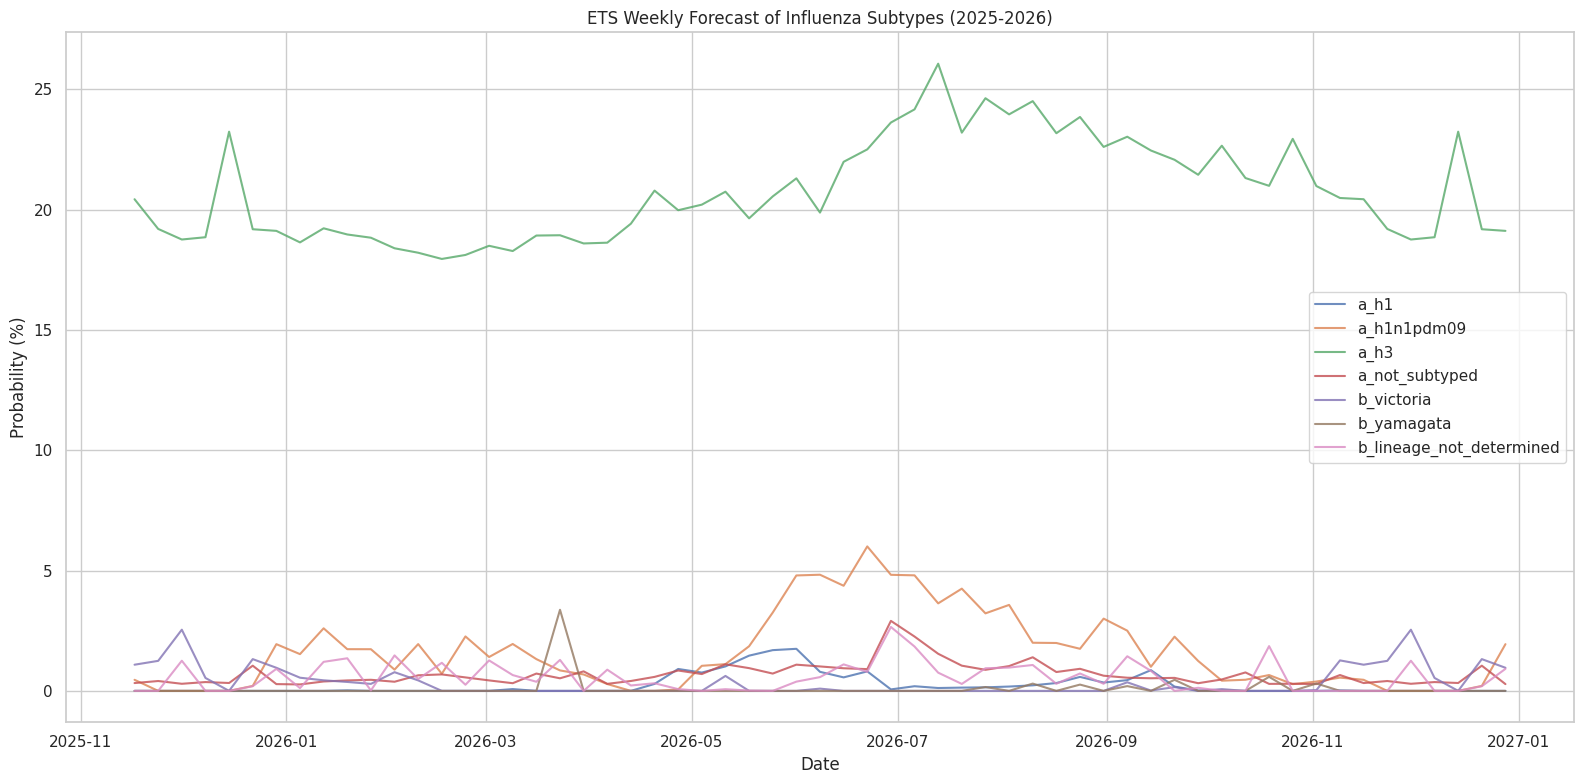

In [ ]:
# VIZUALIZATION

# Weekly Plot
plt.figure(figsize=(16, 8))
for sub in subtypes:
    col = f'{sub}_Pct'
    plt.plot(weekly_df.index, weekly_df[col], label=sub, alpha=0.8)
plt.title('ETS Weekly Forecast of Influenza Subtypes (2025-2026)')
plt.xlabel('Date')
plt.ylabel('Probability (%)')
plt.legend()
plt.tight_layout()
plt.show()

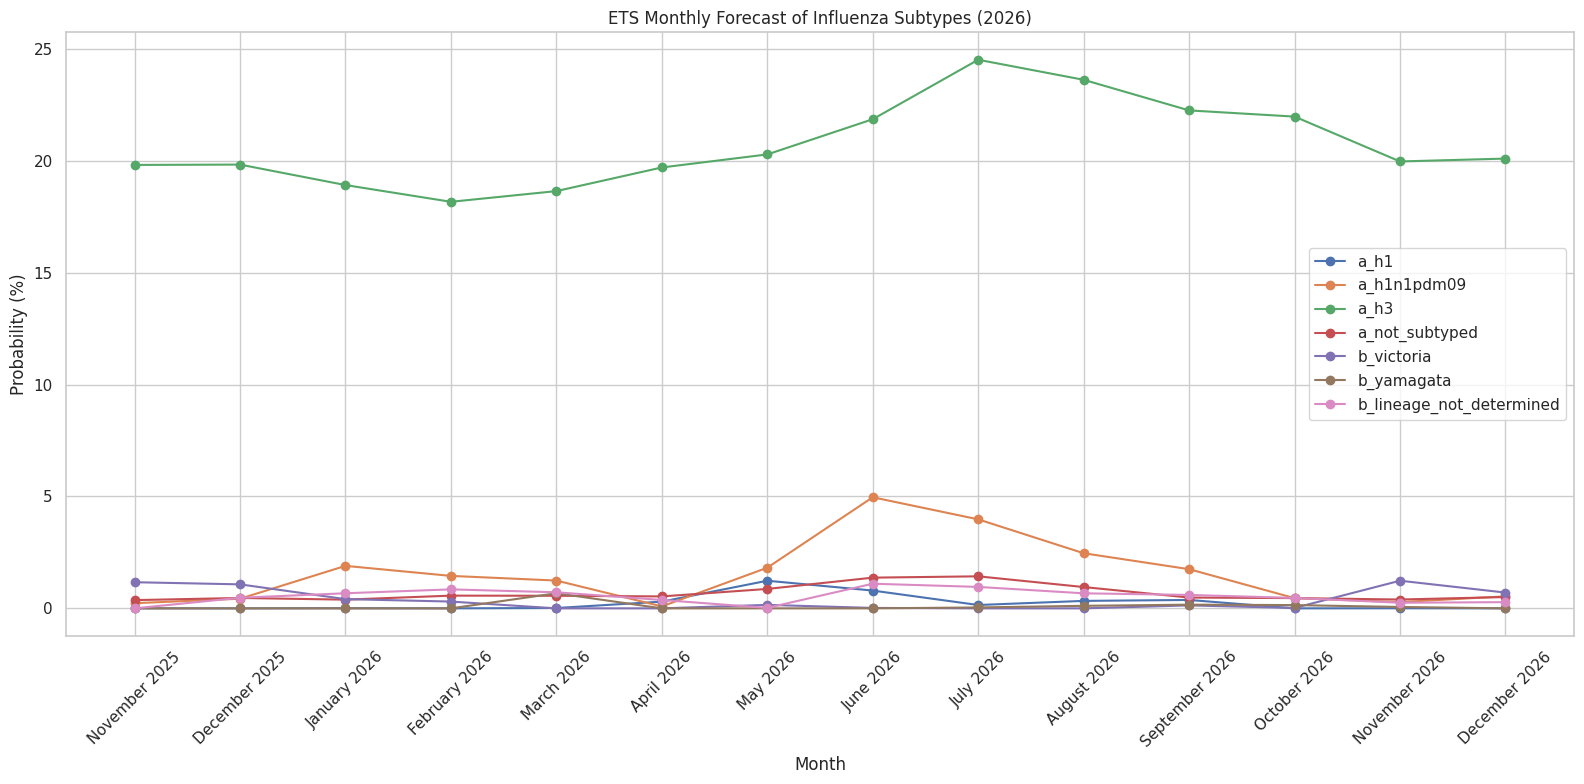

In [ ]:
# Monthly Plot
plt.figure(figsize=(16, 8))
monthly_plot = monthly_df.copy()
monthly_plot['Month_Dt'] = pd.to_datetime(monthly_plot['Month'], format='%B %Y')
monthly_plot = monthly_plot.sort_values('Month_Dt')
for sub in subtypes:
    col = f'{sub}_Pct'
    plt.plot(monthly_plot['Month'], monthly_plot[col], marker='o', label=sub)
plt.title('ETS Monthly Forecast of Influenza Subtypes (2026)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Probability (%)')
plt.legend()
plt.tight_layout()
plt.show()

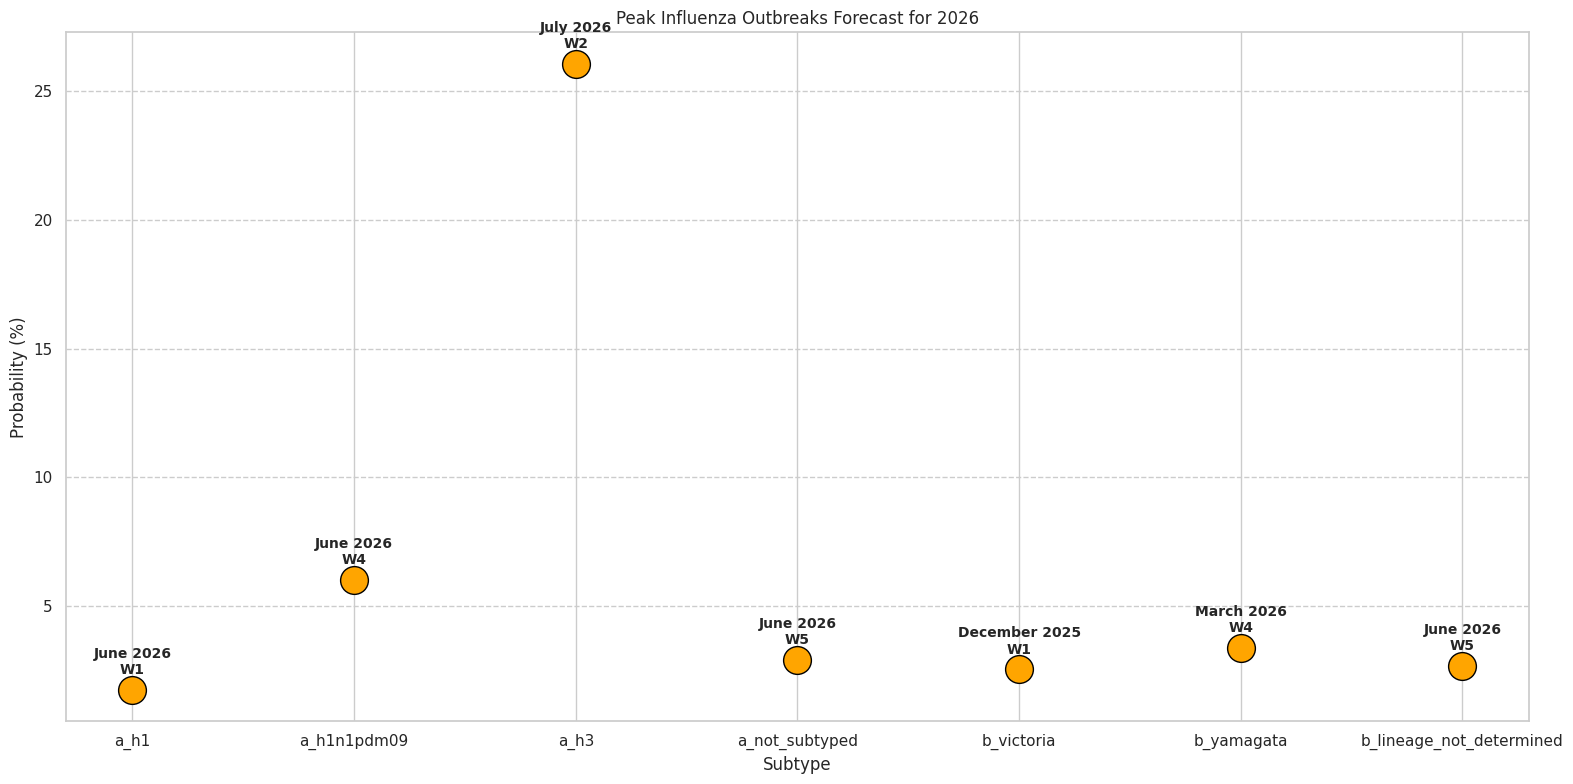

In [ ]:
# Peak Plot
plt.figure(figsize=(16, 8))
for i, row in peak_df.iterrows():
    plt.scatter(row['Subtype'], row['Probability (%)'], s=400, color='orange', edgecolor='black', zorder=3)
    plt.text(row['Subtype'], row['Probability (%)'] + 0.5, f"{row['Month']}\nW{row['Week_of_Month']}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title("Peak Influenza Outbreaks Forecast for 2026")
plt.ylabel("Probability (%)")
plt.xlabel("Subtype")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## **Trigonometric Box-Cox Autoregressive Trend and Seasonal (TBATS)**

In [ ]:
!pip install tbats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 17.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import math
from datetime import timedelta
from tbats import TBATS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# ---------------- CONFIG ----------------
CSV_PATH = "/content/FlunetData_Philippines_All Sites_for_01 January 1995 to 17 November 2025.xlsx - Cleaned Dataset.csv"
country_filter = "Philippines"

forecast_start = pd.to_datetime("2025-11-17")
forecast_end   = pd.to_datetime("2026-12-28")

# outbreak rule
outbreak_method = "mean_std"
outbreak_multiplier = 2
outbreak_percentile = 95

seasonal_periods = [52, 26, 13]   # weekly seasonality components

def week_of_month(dt):
    return math.ceil(dt.day / 7)

# LOAD DATA
df = pd.read_csv(CSV_PATH, parse_dates=["start_date"])
df = df[df["country"] == country_filter].copy()
df.sort_values("start_date", inplace=True)
df.reset_index(drop=True, inplace=True)

df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Remove rows with invalid/missing dates
df = df.dropna(subset=['start_date'])

#keep only rows from Jan 2002 onwards
df = df[df['start_date'] >= '2002-01-01']

#start_date as the index for time series modeling
df = df.set_index('start_date')

df["year"] = df.index.year
df["month"] = df.index.month
df["week"] = df.index.isocalendar().week.astype(int)

subtypes = [
    "a_h1","a_h1n1pdm09","a_h3","a_not_subtyped",
    "b_victoria","b_yamagata","b_lineage_not_determined"
]

# compute percentages
df["influenza_positive"] = df["influenza_positive"].replace(0, np.nan)
for s in subtypes:
    df[f"pct_{s}"] = np.where(df["influenza_positive"] > 0,
                              df[s] / df["influenza_positive"] * 100,
                              0)

# keep weeks with non-null data
df_model = df.dropna(subset=[f"pct_{s}" for s in subtypes]).copy()
df_model.reset_index(drop=True, inplace=True)

# train/test split
train_df = df_model[df_model["year"] <= 2020].copy()
test_df  = df_model[(df_model["year"] >= 2021)].copy()


# TRAIN TBATS MODELS
models = {}
tbats_estimator = TBATS(seasonal_periods=seasonal_periods)

for s in subtypes:
    target = f"pct_{s}"
    series = train_df[target].values.astype(float)

    print(f"Training TBATS model for {s} ...")
    model = tbats_estimator.fit(series)
    models[s] = model


# TEST FORECAST (2022–2025)
metrics = {}

for s in subtypes:
    target = f"pct_{s}"
    train_series = train_df[target].values
    test_series  = test_df[target].values

    steps = len(test_series)
    forecast = models[s].forecast(steps)

    y_true = test_series
    y_pred = np.array(forecast)

    # metrics
    mask = y_true != 0
    mape  = np.mean(np.abs((y_true[mask] - y_pred[mask])/y_true[mask]))*100
    smape = np.mean(2*np.abs(y_pred[mask]-y_true[mask])/(np.abs(y_pred[mask])+np.abs(y_true[mask])))*100

    metrics[s] = {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred),
        "MAPE": mape,
        "sMAPE": smape
    }

metrics_df = pd.DataFrame(metrics).T
print("\nTBATS METRICS (Train 2002–2021, Test 2022–2025)")
print(metrics_df)


# FORECAST 2025–2026
all_weeks = pd.date_range(start=forecast_start, end=forecast_end, freq="W-MON")

forecast_results = []

for s in subtypes:
    model = models[s]
    steps = len(all_weeks)

    values = model.forecast(steps)
    values = np.clip(values, 0, 100)

    fs = pd.DataFrame({
        "start_date": all_weeks,
        f"{s}_Pct": values
    })
    forecast_results.append(fs)

forecast_df = forecast_results[0]
for fs in forecast_results[1:]:
    forecast_df = forecast_df.merge(fs, on="start_date")

forecast_df["Month"] = forecast_df["start_date"].dt.strftime("%B")
forecast_df["Week_of_Month"] = forecast_df["start_date"].dt.day.map(lambda x: math.ceil(x/7))


# OUTBREAK THRESHOLDS
thresholds = {}
for s in subtypes:
    hist = df[f"pct_{s}"].fillna(0)

    if outbreak_method == "mean_std":
        thresholds[s] = hist.mean() + outbreak_multiplier * hist.std()
    else:
        thresholds[s] = np.percentile(hist, outbreak_percentile)

# label outbreak
for s in subtypes:
    pct_col = f"{s}_Pct"
    out_col = f"{s}_Outbreak"
    threshold = thresholds[s]
    forecast_df[out_col] = np.where(forecast_df[pct_col] >= threshold, "Yes", "No")


#WEEKLY CSV
forecast_df.to_csv("TBATS_weekly_subtype_probabilities_forecast.csv", index=False)


#MONTHLY AGGREGATION 2026
monthly_2026 = forecast_df[forecast_df["start_date"].dt.year == 2026].copy()

monthly_grouped = monthly_2026.groupby("Month").mean(numeric_only=True).reset_index()

for s in subtypes:
    pct_col = f"{s}_Pct"
    outbreak_col = f"{s}_Outbreak"
    monthly_grouped[outbreak_col] = monthly_grouped[pct_col].apply(
        lambda x: "Yes" if x >= thresholds[s] else "No"
    )

monthly_grouped.to_csv("TBATS_monthly_subtype_probabilities_forecast_2026.csv", index=False)


# PEAK OUTBREAK TABLE
peak_rows = []
for s in subtypes:
    pct_col = f"{s}_Pct"
    subset = monthly_2026.loc[monthly_2026[pct_col].idxmax()]
    peak_rows.append({
        "Subtype": s,
        "Month": subset["Month"],
        "Week_of_Month": int(subset["Week_of_Month"]),
        "Probability (%)": round(float(subset[pct_col]), 2)
    })

peak_df = pd.DataFrame(peak_rows)
peak_df.to_csv("TBATS_peak_outbreaks_2026.csv", index=False)

print("\nSaved:")
print(" - TBATS_weekly_subtype_probabilities_forecast.csv")
print(" - TBATS_monthly_subtype_probabilities_forecast_2026.csv")
print(" - TBATS_peak_outbreaks_2026.csv")

print("\nThresholds:")
for s,t in thresholds.items():
    print(f"{s}: {t:.2f}")

Training TBATS model for a_h1 ...
Training TBATS model for a_h1n1pdm09 ...
Training TBATS model for a_h3 ...
Training TBATS model for a_not_subtyped ...
Training TBATS model for b_victoria ...
Training TBATS model for b_yamagata ...
Training TBATS model for b_lineage_not_determined ...

TBATS METRICS (Train 2002–2021, Test 2022–2025)
                                MAE          MSE       RMSE        R2  \
a_h1                       1.987963     4.030857   2.007700  0.000000   
a_h1n1pdm09               25.455064  1123.021827  33.511518 -0.033439   
a_h3                      31.753997  1855.366499  43.073965 -0.284822   
a_not_subtyped             1.140668    51.073281   7.146557 -0.002401   
b_victoria                20.471531   937.377129  30.616615 -0.199898   
b_yamagata                 5.578210    32.060540   5.662203  0.000000   
b_lineage_not_determined  13.837838   222.260903  14.908417 -2.231374   

                               MAPE       sMAPE  
a_h1                         

In [ ]:
# OVERALL METRICS (Average Across All Subtypes)
overall_metrics = {
    "MAE":  metrics_df["MAE"].mean(),
    "MSE":  metrics_df["MSE"].mean(),
    "RMSE": metrics_df["RMSE"].mean(),
    "R2":   metrics_df["R2"].mean(),
    "MAPE": metrics_df["MAPE"].mean(),
    "sMAPE": metrics_df["sMAPE"].mean()
}

overall_metrics_df = pd.DataFrame([overall_metrics])

print("\nOVERALL TBATS METRICS (Average Across All Subtypes)")
print(overall_metrics_df)


OVERALL TBATS METRICS (Average Across All Subtypes)
         MAE         MSE       RMSE        R2       MAPE       sMAPE
0  14.317896  603.598719  19.560996 -0.393134  79.292661  111.062721


In [ ]:
# Load the CSV
weekly_df = pd.read_csv("TBATS_weekly_subtype_probabilities_forecast.csv")

print("Weekly Forecast (TBATS)")
weekly_df

Weekly Forecast (TBATS)


start_date  a_h1_Pct  a_h1n1pdm09_Pct   a_h3_Pct  a_not_subtyped_Pct  \
0   2025-11-17  0.272419         2.885643   2.396200            0.132477   
1   2025-11-24  0.414868         3.885326   3.432445            0.188438   
2   2025-12-01  0.546097         4.956144   4.356201            0.233207   
3   2025-12-08  0.666990         5.981094   5.179680            0.269022   
4   2025-12-15  0.778360         6.915203   5.913767            0.297674   
5   2025-12-22  0.880958         7.775239   6.568167            0.320596   
6   2025-12-29  0.975475         8.565377   7.151529            0.338933   
7   2026-01-05  1.062547         9.291626   7.671565            0.353603   
8   2026-01-12  1.142760         9.959087   8.135149            0.365339   
9   2026-01-19  1.216656        10.572533   8.548409            0.374727   
10  2026-01-26  1.284731        11.136331   8.916809            0.382238   
11  2026-02-02  1.347444        11.654501   9.245217            0.388247   
12  2026-02-09  1.405217        12.130735   9.537976            0.393054   
13  2026-02-16  1.458440        12.568427   9.798954            0.396900   
14  2026-02-23  1.507470        12.970696  10.031602            0.399976   
15  2026-03-02  1.552639        13.340409  10.238996            0.402438   
16  2026-03-09  1.594250        13.680200  10.423876            0.404406   
17  2026-03-16  1.632583        13.992493  10.588687            0.405982   
18  2026-03-23  1.667897        14.279511  10.735607            0.407242   
19  2026-03-30  1.700429        14.543300  10.866578            0.408250   
20  2026-04-06  1.730399        14.785741  10.983332            0.409056   
21  2026-04-13  1.758008        15.008561  11.087411            0.409702   
22  2026-04-20  1.783443        15.213348  11.180193            0.410218   
23  2026-04-27  1.806874        15.401561  11.262903            0.410631   
24  2026-05-04  1.828460        15.574542  11.336634            0.410961   
25  2026-05-11  1.848345        15.733523  11.402361            0.411225   
26  2026-05-18  1.866664        15.879638  11.460954            0.411437   
27  2026-05-25  1.883540        16.013928  11.513186            0.411606   
28  2026-06-01  1.899087        16.137350  11.559748            0.411741   
29  2026-06-08  1.913409        16.250783  11.601256            0.411849   
30  2026-06-15  1.926604        16.355035  11.638258            0.411936   
31  2026-06-22  1.938759        16.450851  11.671243            0.412005   
32  2026-06-29  1.949956        16.538912  11.700647            0.412061   
33  2026-07-06  1.960272        16.619846  11.726860            0.412105   
34  2026-07-13  1.969775        16.694230  11.750227            0.412140   
35  2026-07-20  1.978529        16.762594  11.771057            0.412169   
36  2026-07-27  1.986594        16.825426  11.789626            0.412191   
37  2026-08-03  1.994024        16.883172  11.806180            0.412210   
38  2026-08-10  2.000868        16.936245  11.820937            0.412224   
39  2026-08-17  2.007174        16.985022  11.834091            0.412236   
40  2026-08-24  2.012982        17.029853  11.845818            0.412245   
41  2026-08-31  2.018333        17.071054  11.856272            0.412253   
42  2026-09-07  2.023263        17.108922  11.865591            0.412258   
43  2026-09-14  2.027804        17.143725  11.873898            0.412263   
44  2026-09-21  2.031988        17.175711  11.881303            0.412267   
45  2026-09-28  2.035842        17.205108  11.887905            0.412270   
46  2026-10-05  2.039393        17.232127  11.893790            0.412273   
47  2026-10-12  2.042664        17.256958  11.899036            0.412274   
48  2026-10-19  2.045677        17.279780  11.903713            0.412276   
49  2026-10-26  2.048453        17.300755  11.907882            0.412277   
50  2026-11-02  2.051010        17.320033  11.911598            0.412278   
51  2026-11-09  2.053366        17.337750  11.914911

In [ ]:
import pandas as pd

# Load weekly forecast
weekly = pd.read_csv("TBATS_weekly_subtype_probabilities_forecast.csv", parse_dates=['start_date'])
weekly.rename(columns={"start_date": "Date"}, inplace=True)

# Identify subtype columns
subtypes = [c.replace('_Pct','') for c in weekly.columns if '_Pct' in c]

# Build a summary table of peaks
peak_rows = []

for sub in subtypes:
    pct_col = f"{sub}_Pct"
    peak_idx = weekly[pct_col].idxmax()

    peak_rows.append({
        "Subtype": sub,
        "Peak Date": weekly.loc[peak_idx, "Date"].strftime("%Y-%m-%d"),
        "Peak Positivity Rate (%)": round(float(weekly.loc[peak_idx, pct_col]), 2)
    })

# Convert to DataFrame
peak_table = pd.DataFrame(peak_rows)

print("\n=== Weekly Peak Positivity Rates for 2026 (TBATS) ===")
print(peak_table.to_string(index=False))


=== Weekly Peak Positivity Rates for 2026 (TBATS) ===
                 Subtype  Peak Date  Peak Positivity Rate (%)
                    a_h1 2026-12-28                      2.07
             a_h1n1pdm09 2026-12-28                     17.43
                    a_h3 2026-12-28                     11.93
          a_not_subtyped 2026-12-28                      0.41
              b_victoria 2026-12-28                      8.25
              b_yamagata 2026-12-28                      5.72
b_lineage_not_determined 2026-12-28                     14.26


In [ ]:
# Load the CSV
monthly_df = pd.read_csv("TBATS_monthly_subtype_probabilities_forecast_2026.csv")

print("Monthly Forecast 2026 (TBATS)")
monthly_df

Monthly Forecast 2026 (TBATS)


Month  a_h1_Pct  a_h1n1pdm09_Pct   a_h3_Pct  a_not_subtyped_Pct  \
0       April  1.769681        15.102303  11.128460            0.409902   
1      August  2.006676        16.981069  11.832659            0.412233   
2    December  2.063298        17.411901  11.927537            0.412281   
3    February  1.429643        12.331090   9.653437            0.394544   
4     January  1.176674        10.239894   8.317983            0.368977   
5        July  1.973792        16.725524  11.759443            0.412151   
6        June  1.925563        16.346586  11.634230            0.411918   
7       March  1.629560        13.967183  10.570749            0.405663   
8         May  1.856752        15.800408  11.428284            0.411307   
9    November  2.055365        17.352714  11.917543            0.412280   
10    October  2.044047        17.267405  11.901105            0.412275   
11  September  2.029724        17.158366  11.877174            0.412265   

    b_victoria_Pct  b_yamagata_Pct  b_lineage_not_determined_Pct  \
0         6.597518        4.251267                     11.234722   
1         7.809960        5.275975                     13.432391   
2         8.232665        5.702207                     14.220396   
3         5.255031        3.248792                      8.848483   
4         4.380284        2.635322                      7.309023   
5         7.608987        5.092070                     13.063419   
6         7.342597        4.859550                     12.578004   
7         6.013566        3.804386                     10.192672   
8         6.996565        4.570465                     11.951844   
9         8.162086        5.625241                     14.087152   
10        8.070405        5.529553                     13.915275   
11        7.964678        5.423896                     13.718428   

    Week_of_Month a_h1_Outbreak a_h1n1pdm09_Outbreak a_h3_Outbreak  \
0             2.5            No                   No            No   
1             3.0            No                   No            No   
2             2.5            No                   No            No   
3             2.5            No                   No            No   
4             2.5            No                   No            No   
5             2.5            No                   No            No   
6             3.0            No                   No            No   
7             3.0            No                   No            No   
8             2.5            No                   No            No   
9             3.0            No                   No            No   
10            2.5            No                   No            No   
11            2.5            No                   No            No   

   a_not_subtyped_Outbreak b_victoria_Outbreak b_yamagata_Outbreak  \
0                       No                  No                  No   
1                       No                  No                  No   
2                       No                  No                  No   
3                       No                  No                  No   
4                       No                  No                  No   
5                       No                  No                  No   
6                       No                  No                  No   
7                       No                  No                  No   
8                       No                  No                  No   
9                       No                  No                  No   
10                      No                  No                  No   
11                      No                  No                  No   

   b_lineage_not_determined_Outbreak  
0                                 No  
1                                 No  
2                                 No  
3                                 No  
4                                 No  
5                                 No  
6                                 No  
7            

In [ ]:
import pandas as pd

# Load monthly forecast
monthly = pd.read_csv("TBATS_monthly_subtype_probabilities_forecast_2026.csv")

# Identify subtype columns
subtypes = [c.replace('_Pct','') for c in monthly.columns if '_Pct' in c]

# Build a summary table of peak months
peak_rows = []

for sub in subtypes:
    pct_col = f"{sub}_Pct"
    peak_idx = monthly[pct_col].idxmax()

    peak_rows.append({
        "Subtype": sub,
        "Peak Month": monthly.loc[peak_idx, "Month"],
        "Peak Positivity Rate (%)": round(float(monthly.loc[peak_idx, pct_col]), 2)
    })

# Convert to DataFrame
peak_month_table = pd.DataFrame(peak_rows)

print("\n=== Monthly Peak Positivity Rates for 2026 (TBATS) ===")
print(peak_month_table.to_string(index=False))


=== Monthly Peak Positivity Rates for 2026 (TBATS) ===
                 Subtype Peak Month  Peak Positivity Rate (%)
                    a_h1   December                      2.06
             a_h1n1pdm09   December                     17.41
                    a_h3   December                     11.93
          a_not_subtyped   December                      0.41
              b_victoria   December                      8.23
              b_yamagata   December                      5.70
b_lineage_not_determined   December                     14.22


In [ ]:
# Load the CSV
peak_df = pd.read_csv("TBATS_peak_outbreaks_2026.csv")

print("Peak Outbreaks 2026 (TBATS)")
peak_df

Peak Outbreaks 2026 (TBATS)


Subtype     Month  Week_of_Month  Probability (%)
0                      a_h1  December              4             2.07
1               a_h1n1pdm09  December              4            17.43
2                      a_h3  December              4            11.93
3            a_not_subtyped  December              4             0.41
4                b_victoria  December              4             8.25
5                b_yamagata  December              4             5.72
6  b_lineage_not_determined  December              4            14.26

In [ ]:
import pandas as pd

# Load dataset
peak = pd.read_csv("TBATS_peak_outbreaks_2026.csv")

# Select only the columns relevant to the table
table = peak[['Subtype', 'Probability (%)', 'Month', 'Week_of_Month']]

# Display table
print("\nPeak Influenza Outbreaks Forecast for 2026 (TBATS)\n")
print(table.to_string(index=False))


Peak Influenza Outbreaks Forecast for 2026 (TBATS)

                 Subtype  Probability (%)    Month  Week_of_Month
                    a_h1             2.07 December              4
             a_h1n1pdm09            17.43 December              4
                    a_h3            11.93 December              4
          a_not_subtyped             0.41 December              4
              b_victoria             8.25 December              4
              b_yamagata             5.72 December              4
b_lineage_not_determined            14.26 December              4


# **MACHINE LEARNING**

## **RANDOM FOREST MODEL**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)  # reproducible noise for subtype fluctuations

# ------------------- LOAD DATA -------------------
df = pd.read_csv("influenza_cleaned.csv", parse_dates=['start_date'])
df = df.sort_values('start_date').reset_index(drop=True)

# ------------------- FEATURE ENGINEERING (BASE) -------------------
df_features = df.copy()
df_features['year'] = df_features['start_date'].dt.year
df_features['week_of_year'] = df_features['start_date'].dt.isocalendar().week
df_features['month'] = df_features['start_date'].dt.month
df_features['quarter'] = df_features['start_date'].dt.quarter

# lags (on target)
lags = [1,2,3,4]
for lag in lags:
    df_features[f'lag_{lag}'] = df_features['influenza_positive'].shift(lag)

# rolling windows (mean, std, max, min) for windows 2,4,8,12
rolling_windows = [2,4,8,12]
for w in rolling_windows:
    df_features[f'rolling_mean_{w}'] = df_features['influenza_positive'].rolling(w).mean()
    df_features[f'rolling_std_{w}'] = df_features['influenza_positive'].rolling(w).std()
    df_features[f'rolling_max_{w}'] = df_features['influenza_positive'].rolling(w).max()
    df_features[f'rolling_min_{w}'] = df_features['influenza_positive'].rolling(w).min()

# rate of change
df_features['rate_of_change'] = df_features['influenza_positive'].pct_change().fillna(0)

# cyclical encoding
df_features['week_sin'] = np.sin(2*np.pi*df_features['week_of_year']/52)
df_features['week_cos'] = np.cos(2*np.pi*df_features['week_of_year']/52)
df_features['month_sin'] = np.sin(2*np.pi*df_features['month']/12)
df_features['month_cos'] = np.cos(2*np.pi*df_features['month']/12)

df_features.replace([np.inf, -np.inf], 0, inplace=True)
df_features.fillna(0, inplace=True)

# ------------------- DEFINE FEATURES/TARGET -------------------
target_col = 'influenza_positive'
# Explicit feature list (must match what we'll rebuild during forecasting)
feature_cols = [
    'year', 'month', 'quarter', 'week_of_year',
    'week_sin', 'week_cos', 'month_sin', 'month_cos',
    'lag_1','lag_2','lag_3','lag_4',
    'rolling_mean_2','rolling_mean_4','rolling_mean_8','rolling_mean_12',
    'rolling_std_2','rolling_std_4','rolling_std_8','rolling_std_12',
    'rolling_max_8','rolling_min_8',
    'rate_of_change'
]

# Ensure feature columns exist in df_features (they should, from above)
for c in feature_cols:
    if c not in df_features.columns:
        df_features[c] = 0

# ------------------- TRAIN/TEST SPLIT -------------------
train_df = df_features[df_features['start_date'] <= '2020-12-14']
test_df = df_features[(df_features['start_date'] >= '2021-01-04') & (df_features['start_date'] <= '2025-11-10')]

X_train = train_df[feature_cols]
y_train = train_df[target_col]
X_test = test_df[feature_cols]
y_test = test_df[target_col]

# ------------------- RANDOM FOREST + HYPERPARAMETER TUNING (TimeSeriesSplit) -------------------
param_grid = {
    'n_estimators':[100,200],
    'max_depth':[5,10,None],
    'min_samples_split':[2,5]
}

rf = RandomForestRegressor(random_state=42)
tscv = TimeSeriesSplit(n_splits=3)
grid = GridSearchCV(rf, param_grid, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

# ------------------- METRICS -------------------
def evaluate_model(model, X, y):
    pred = model.predict(X)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    mask = y != 0
    mape = np.mean(np.abs((y[mask] - pred[mask])/y[mask]))*100 if mask.sum()>0 else np.nan
    smape = np.mean(2*np.abs(y - pred)/(np.abs(y)+np.abs(pred)+1e-10))*100
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape, 'sMAPE': smape}

train_metrics = evaluate_model(best_rf, X_train, y_train)
test_metrics = evaluate_model(best_rf, X_test, y_test)

print("=== BEST HYPERPARAMETERS ===")
print(grid.best_params_)
print("\n=== TRAINING SET METRICS ===")
print(train_metrics)
print("\n=== TEST SET METRICS ===")
print(test_metrics)

# ------------------- WEEKLY FORECAST 2025-11-17 TO 2026-12-28 (RECURSIVE) -------------------
start_date = pd.to_datetime('2025-11-17')
end_date = pd.to_datetime('2026-12-28')
future_dates = pd.date_range(start=start_date, end=end_date, freq='W-MON')

# recent history (counts)
recent_history_total = df_features['influenza_positive'].tail(12).tolist()
subtypes = ['a_h1','a_h1n1pdm09','a_h3','a_not_subtyped','b_victoria','b_yamagata','b_lineage_not_determined']
# recent_subtypes: lists of counts (not percentages)
recent_subtypes = {s: df_features[s].tail(12).tolist() for s in subtypes}

forecasts_weekly = []

# Recursive forecasting loop
for d in future_dates:
    year, month = d.year, d.month
    week_of_month = (d.day-1)//7 + 1
    week_of_year = d.isocalendar()[1]
    week_sin = np.sin(2*np.pi*week_of_year/52)
    week_cos = np.cos(2*np.pi*week_of_year/52)
    month_sin = np.sin(2*np.pi*month/12)
    month_cos = np.cos(2*np.pi*month/12)

    # Build features from updated recent_history_total (handle short history gracefully)
    # Helper to get last k values (pad with zeros if not enough)
    def last_k(arr, k):
        if len(arr) >= k:
            return arr[-k:]
        else:
            # pad left with zeros
            return [0.0]*(k - len(arr)) + arr

    lag_1 = float(recent_history_total[-1]) if len(recent_history_total) >= 1 else 0.0
    lag_2 = float(recent_history_total[-2]) if len(recent_history_total) >= 2 else 0.0
    lag_3 = float(recent_history_total[-3]) if len(recent_history_total) >= 3 else 0.0
    lag_4 = float(recent_history_total[-4]) if len(recent_history_total) >= 4 else 0.0

    rm2 = np.mean(last_k(recent_history_total, 2))
    rm4 = np.mean(last_k(recent_history_total, 4))
    rm8 = np.mean(last_k(recent_history_total, 8))
    rm12 = np.mean(last_k(recent_history_total, 12))

    rs2 = np.std(last_k(recent_history_total, 2))
    rs4 = np.std(last_k(recent_history_total, 4))
    rs8 = np.std(last_k(recent_history_total, 8))
    rs12 = np.std(last_k(recent_history_total, 12))

    rmax8 = np.max(last_k(recent_history_total, 8))
    rmin8 = np.min(last_k(recent_history_total, 8))

    # rate_of_change: (current - prev) / prev
    if len(recent_history_total) >= 2 and recent_history_total[-2] != 0:
        roc = (recent_history_total[-1] - recent_history_total[-2]) / (recent_history_total[-2])
    else:
        roc = 0.0

    # Compose features dictionary (use same keys/order as feature_cols)
    features = {
        'year': float(year),
        'month': float(month),
        'quarter': float((month-1)//3 + 1),
        'week_of_year': float(week_of_year),
        'week_sin': float(week_sin),
        'week_cos': float(week_cos),
        'month_sin': float(month_sin),
        'month_cos': float(month_cos),
        'lag_1': lag_1,
        'lag_2': lag_2,
        'lag_3': lag_3,
        'lag_4': lag_4,
        'rolling_mean_2': float(rm2),
        'rolling_mean_4': float(rm4),
        'rolling_mean_8': float(rm8),
        'rolling_mean_12': float(rm12),
        'rolling_std_2': float(rs2),
        'rolling_std_4': float(rs4),
        'rolling_std_8': float(rs8),
        'rolling_std_12': float(rs12),
        'rolling_max_8': float(rmax8),
        'rolling_min_8': float(rmin8),
        'rate_of_change': float(roc)
    }

    X_future = pd.DataFrame([features], columns=feature_cols)
    pred_total = best_rf.predict(X_future)[0]
    pred_total = max(0.0, float(pred_total))  # non-negative

    # ------------------- Improved Subtype Percentage Forecasting (option B) -------------------
    # Use 8-week weighted recent avg + trend + small noise, then normalize to 100%
    subtype_pct = {}
    total_recent = sum(last_k(recent_history_total, 8))
    for s in subtypes:
        recent_vals = np.array(last_k(recent_subtypes[s], 8)).astype(float)
        # Weighted recent average: weights increase toward most recent
        weights = np.linspace(0.5, 1.0, len(recent_vals))
        denom = weights.sum()
        recent_weighted_sum = (recent_vals * weights).sum()
        recent_pct = (recent_weighted_sum / (denom + 1e-10))  # this is in counts, not pct

        # convert to proportion of total recent (avoid division by zero)
        if total_recent > 0:
            recent_pct = recent_pct / total_recent * 100.0  # approximate percent
        else:
            recent_pct = 0.0

        # Trend component based on last 4 weeks counts for the subtype
        rv4 = np.array(last_k(recent_subtypes[s], 4)).astype(float)
        if len(rv4) >= 4:
            trend_counts = rv4[-1] - rv4[0]
            # scale trend into percentage space (dividing by max(1,total_recent) to keep magnitude reasonable)
            trend = (trend_counts / (total_recent + 1e-10)) * 100.0 * 0.5
        else:
            trend = 0.0

        noise = np.random.normal(0, 0.5)  # ±0.5% noise
        new_pct = max(0.0, recent_pct + trend + noise)
        subtype_pct[s] = new_pct

    # normalize percentages to sum to 100
    total_pct_sum = sum(subtype_pct.values())
    if total_pct_sum > 0:
        subtype_pct = {s: subtype_pct[s] / total_pct_sum * 100.0 for s in subtypes}
    else:
        subtype_pct = {s: 0.0 for s in subtypes}

    # store predicted subtype counts into recent_subtypes (so next iterations use them)
    for s in subtypes:
        predicted_cases_sub = pred_total * (subtype_pct[s] / 100.0)
        recent_subtypes[s].append(predicted_cases_sub)
        # keep only last 12 values for each subtype history
        if len(recent_subtypes[s]) > 12:
            recent_subtypes[s].pop(0)

    # ------------------- Append results and move to next iteration -------------------
    forecasts_weekly.append({
        'Date': d,
        'Month': d.strftime('%B'),
        'Week_of_Month': week_of_month,
        **{f"{s}_Pct": round(subtype_pct[s], 2) for s in subtypes},
        'predicted_cases': round(pred_total, 2)
    })

    # append predicted total to recent history (for lags/rolling in next iter)
    recent_history_total.append(pred_total)
    if len(recent_history_total) > 12:
        recent_history_total.pop(0)

# ------------------- OUTPUTS -------------------
weekly_df = pd.DataFrame(forecasts_weekly)
print("\nWeekly Forecasts (first 10 rows):\n", weekly_df.head(10))

# Monthly aggregates (mean percentage per month)
monthly_df = weekly_df.groupby('Month')[[f"{s}_Pct" for s in subtypes]].mean().reset_index()
print("\nMonthly Forecasts 2026 (percentages):\n", monthly_df)

# Peak outbreaks table (which week each subtype hits its max predicted pct)
peak_data = []
for s in subtypes:
    if weekly_df[f"{s}_Pct"].max() > 0:
        row = weekly_df.loc[weekly_df[f"{s}_Pct"].idxmax()]
        peak_data.append({
            'Subtype': s,
            'Month': row['Month'],
            'Week_of_Month': row['Week_of_Month'],
            'Probability (%)': round(row[f"{s}_Pct"], 2)
        })
    else:
        peak_data.append({'Subtype': s, 'Month': 'N/A', 'Week_of_Month': 0, 'Probability (%)': 0.0})

peak_df = pd.DataFrame(peak_data)
print("\nPeak Outbreaks 2026:\n", peak_df)

# Optionally save results
weekly_df.to_csv("weekly_forecasts_2026.csv", index=False)
monthly_df.to_csv("monthly_forecasts_2026.csv", index=False)
peak_df.to_csv("peak_outbreaks_2026.csv", index=False)

print("\nSaved: weekly_forecasts_2026.csv, monthly_forecasts_2026.csv, peak_outbreaks_2026.csv")


=== BEST HYPERPARAMETERS ===
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

=== TRAINING SET METRICS ===
{'MAE': 1.2446343975283216, 'MSE': 108.0589361483007, 'RMSE': np.float64(10.395140025430187), 'R2': 0.983145567583752, 'MAPE': np.float64(2.386428505671726), 'sMAPE': np.float64(2.4766430888908935)}

=== TEST SET METRICS ===
{'MAE': 0.4401214574898785, 'MSE': 1.7556348178137644, 'RMSE': np.float64(1.3250037048302032), 'R2': 0.9864660050719538, 'MAPE': np.float64(4.4859250635355705), 'sMAPE': np.float64(4.2050540325112875)}

Weekly Forecasts (first 10 rows):
         Date     Month  Week_of_Month  a_h1_Pct  a_h1n1pdm09_Pct  a_h3_Pct  \
0 2025-11-17  November              3     11.54            23.43      0.00   
1 2025-11-24  November              4     42.71            23.60      0.00   
2 2025-12-01  December              1      0.00            12.24     65.73   
3 2025-12-08  December              2      0.68            11.49     77.16   
4 2025-12-15  December 

In [ ]:
# ------------------- METRICS FROM ARRAYS -------------------
def evaluate_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask])/y_true[mask]))*100 if mask.sum()>0 else np.nan
    smape = np.mean(2*np.abs(y_true - y_pred)/(np.abs(y_true)+np.abs(y_pred)+1e-10))*100
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape, 'sMAPE': smape}

# ------------------- METRICS PER SUBTYPE -------------------
subtype_metrics = {}

for s in subtypes:
    # actual values
    y_true = test_df[s].values  # actual subtype counts

    # predicted values for test set using best_rf total predictions
    X_test_copy = X_test.copy()
    y_pred_total = best_rf.predict(X_test_copy)

    # Calculate subtype predictions based on historical proportions
    y_pred_subtype = []
    recent_subtype_history = df_features[s].tail(12).tolist()
    recent_total_history = df_features['influenza_positive'].tail(12).tolist()

    for i in range(len(y_pred_total)):
        def last_k(arr, k):
            if len(arr) >= k:
                return arr[-k:]
            else:
                return [0.0]*(k-len(arr)) + arr

        recent_vals = np.array(last_k(recent_subtype_history, 8)).astype(float)
        weights = np.linspace(0.5, 1.0, len(recent_vals))
        recent_weighted_sum = (recent_vals * weights).sum()
        total_recent = sum(last_k(recent_total_history, 8))
        proportion = (recent_weighted_sum / (total_recent + 1e-10)) if total_recent > 0 else 0.0

        pred_sub = y_pred_total[i] * proportion
        y_pred_subtype.append(pred_sub)

        recent_subtype_history.append(pred_sub)
        recent_total_history.append(y_pred_total[i])
        if len(recent_subtype_history) > 12:
            recent_subtype_history.pop(0)
        if len(recent_total_history) > 12:
            recent_total_history.pop(0)

    # compute metrics
    subtype_metrics[s] = evaluate_metrics(y_true, y_pred_subtype)

# Display
print("\n=== METRICS PER SUBTYPE ===")
for s, metrics in subtype_metrics.items():
    print(f"\n{s.upper()}:")
    for k,v in metrics.items():
        print(f"  {k}: {round(v,2)}")



=== METRICS PER SUBTYPE ===

A_H1:
  MAE: 0.0
  MSE: 0.0
  RMSE: 0.0
  R2: 1.0
  MAPE: nan
  sMAPE: 0.0

A_H1N1PDM09:
  MAE: 3.46
  MSE: 47.6
  RMSE: 6.9
  R2: -0.34
  MAPE: 100.0
  sMAPE: 104.45

A_H3:
  MAE: 4.13
  MSE: 91.71
  RMSE: 9.58
  R2: -0.23
  MAPE: 100.0
  sMAPE: 106.07

A_NOT_SUBTYPED:
  MAE: 0.08
  MSE: 0.25
  RMSE: 0.5
  R2: -0.02
  MAPE: 100.0
  sMAPE: 8.1

B_VICTORIA:
  MAE: 1.97
  MSE: 12.72
  RMSE: 3.57
  R2: -0.44
  MAPE: 100.0
  sMAPE: 107.69

B_YAMAGATA:
  MAE: 0.0
  MSE: 0.0
  RMSE: 0.0
  R2: 1.0
  MAPE: nan
  sMAPE: 0.0

B_LINEAGE_NOT_DETERMINED:
  MAE: 0.1
  MSE: 0.17
  RMSE: 0.42
  R2: -0.06
  MAPE: 100.0
  sMAPE: 14.57


In [ ]:
import pandas as pd
import json

# ------------------- Weekly Forecast JSON -------------------
weekly_df = pd.read_csv("weekly_forecasts_2026.csv")
weekly_json = weekly_df.to_dict(orient="records")  # list of dicts (JSON-ready)
with open("weekly_forecasts_2026.json", "w") as f:
    json.dump(weekly_json, f, indent=4)

# ------------------- Peak Outbreaks JSON -------------------
peak_df = pd.read_csv("peak_outbreaks_2026.csv")
peak_json = peak_df.to_dict(orient="records")
with open("peak_outbreaks_2026.json", "w") as f:
    json.dump(peak_json, f, indent=4)

print("✅ JSON files created: weekly_forecasts_2026.json and peak_outbreaks_2026.json")


✅ JSON files created: weekly_forecasts_2026.json and peak_outbreaks_2026.json


## **XGBOOST MODEL**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.3 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import numpy as np
import math
import xgboost as xgb
import optuna
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# --------------------------- CONFIG ---------------------------

CSV_PATH = "Influenza Cases Philippines (cleaned).csv"
country_filter = "Philippines"
lag_weeks = [1,2,3,4,12,26]
rolling_windows = [3,6,12]

# --------------------------------------------------------------

# Helper
def week_of_month(dt):
    return math.ceil(dt.day / 7)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred))
    mask = denominator != 0
    return np.mean(2 * np.abs(y_pred[mask] - y_true[mask]) / denominator[mask]) * 100

# Load data
df = pd.read_csv(CSV_PATH, parse_dates=["start_date"])
df = df[df["country"] == country_filter].copy()
df.sort_values("start_date", inplace=True)
df.reset_index(drop=True, inplace=True)

subtypes = [
    "a_h1","a_h1n1pdm09","a_h3","a_not_subtyped",
    "b_victoria","b_yamagata","b_lineage_not_determined"
]

# Compute subtype percentages
df["influenza_positive"] = df["influenza_positive"].replace(0, np.nan)
for s in subtypes:
    df[f"pct_{s}"] = np.where(df["influenza_positive"] > 0,
                              df[s] / df["influenza_positive"] * 100,
                              0)

# Base features
df["weekofyear"] = df["start_date"].dt.isocalendar().week.astype(int)
df["month"] = df["start_date"].dt.month
df["year"] = df["start_date"].dt.year
df["week_of_month"] = df["start_date"].apply(week_of_month)

# Lags & rolling
for s in subtypes:
    pct_col = f"pct_{s}"
    for l in lag_weeks:
        df[f"{pct_col}_lag{l}"] = df[pct_col].shift(l)
    for w in rolling_windows:
        df[f"{pct_col}_roll{w}"] = df[pct_col].shift(1).rolling(window=w, min_periods=1).mean()

# Lags for influenza_positive
for l in [1,2,4,12]:
    df[f"infl_pos_lag{l}"] = df["influenza_positive"].shift(l)

df_model = df.copy()
df_model = df_model.dropna(subset=[f"pct_{s}" for s in subtypes])

# Split Train/Test
train_df = df_model[df_model["year"] <= 2020].copy()
test_df = df_model[(df_model["year"] >= 2021) & (df_model["year"] <= 2025)].copy()

# Features
feature_cols = []
for s in subtypes:
    pct_col = f"pct_{s}"
    for l in lag_weeks:
        feature_cols.append(f"{pct_col}_lag{l}")
    for w in rolling_windows:
        feature_cols.append(f"{pct_col}_roll{w}")

for l in [1,2,4,12]:
    feature_cols.append(f"infl_pos_lag{l}")

feature_cols += ["weekofyear", "month", "year", "week_of_month"]


# --------------------------- OPTUNA TUNING ---------------------------

models = {}
best_params = {}
best_rounds = {}

print("\n=== OPTUNA BAYESIAN OPTIMIZATION STARTED ===")

def objective(trial, X_train, y_train):
    params = {
        "objective": "reg:squarederror",
        "eval_metric": "mae",
        "verbosity": 0,
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "eta": trial.suggest_float("eta", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "lambda": trial.suggest_float("lambda", 0.0, 3.0),
        "alpha": trial.suggest_float("alpha", 0.0, 3.0),
        "seed": 42
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)

    cv = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=1000,
        nfold=5,
        early_stopping_rounds=30,
        metrics="mae",
        seed=42,
        verbose_eval=False
    )

    return cv["test-mae-mean"].min()


# Train one optimized model per subtype
for s in subtypes:
    print(f"\n🔍 Optimizing subtype: {s}")

    target = f"pct_{s}"
    X_train = train_df[feature_cols].values
    y_train = train_df[target].values

    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=40)

    best_params[s] = study.best_params
    print(f"Best Params for {s}: {best_params[s]}")

    # train final model using best params
    dtrain = xgb.DMatrix(X_train, label=y_train)
    cv = xgb.cv(
        params={**best_params[s], "objective": "reg:squarederror", "eval_metric": "mae"},
        dtrain=dtrain,
        num_boost_round=1000,
        nfold=5,
        early_stopping_rounds=30,
        verbose_eval=False
    )

    best_n_rounds = len(cv)
    best_rounds[s] = best_n_rounds

    print(f"Best Rounds for {s}: {best_n_rounds}")

    model = xgb.train(
        params={**best_params[s], "objective": "reg:squarederror", "eval_metric": "mae"},
        dtrain=dtrain,
        num_boost_round=best_n_rounds
    )

    models[s] = model

[I 2025-12-07 12:29:30,651] A new study created in memory with name: no-name-be595c4d-0a23-44b4-b77f-a1688304987b



=== OPTUNA BAYESIAN OPTIMIZATION STARTED ===

🔍 Optimizing subtype: a_h1


[I 2025-12-07 12:29:47,603] Trial 0 finished with value: 2.9354291796976244 and parameters: {'max_depth': 10, 'eta': 0.22676294171376093, 'subsample': 0.896835317350923, 'colsample_bytree': 0.7957013856287407, 'lambda': 2.9182298318315465, 'alpha': 0.05934624293765822}. Best is trial 0 with value: 2.9354291796976244.
[I 2025-12-07 12:29:49,903] Trial 1 finished with value: 3.286342056777122 and parameters: {'max_depth': 2, 'eta': 0.2679059751348982, 'subsample': 0.9456472144735869, 'colsample_bytree': 0.9889568614461791, 'lambda': 0.862791181851678, 'alpha': 1.1145309371958052}. Best is trial 0 with value: 2.9354291796976244.
[I 2025-12-07 12:29:55,280] Trial 2 finished with value: 3.2845121611296704 and parameters: {'max_depth': 2, 'eta': 0.08692609567982908, 'subsample': 0.8433874969987296, 'colsample_bytree': 0.6686396941364356, 'lambda': 0.9896979749613455, 'alpha': 0.3218305716250467}. Best is trial 0 with value: 2.9354291796976244.
[I 2025-12-07 12:29:59,475] Trial 3 finished wit

Best Params for a_h1: {'max_depth': 9, 'eta': 0.16514634929322075, 'subsample': 0.991295001400814, 'colsample_bytree': 0.9357966400194815, 'lambda': 2.6394314222580135, 'alpha': 0.45341886083782346}
Best Rounds for a_h1: 37


[I 2025-12-07 12:32:28,079] A new study created in memory with name: no-name-ac024830-d349-4b8f-be50-b409c7e4d8a6



🔍 Optimizing subtype: a_h1n1pdm09


[I 2025-12-07 12:32:31,008] Trial 0 finished with value: 10.467771861978582 and parameters: {'max_depth': 8, 'eta': 0.2442747249755391, 'subsample': 0.56663705685287, 'colsample_bytree': 0.8755946165330231, 'lambda': 2.4257724471510342, 'alpha': 2.8482274915037364}. Best is trial 0 with value: 10.467771861978582.
[I 2025-12-07 12:32:34,118] Trial 1 finished with value: 10.623851460454533 and parameters: {'max_depth': 8, 'eta': 0.25075798761317064, 'subsample': 0.6013746941140394, 'colsample_bytree': 0.9476415739399815, 'lambda': 1.4585971536438025, 'alpha': 1.0590448470555147}. Best is trial 0 with value: 10.467771861978582.
[I 2025-12-07 12:32:34,809] Trial 2 finished with value: 10.167918028018988 and parameters: {'max_depth': 3, 'eta': 0.16805404571840515, 'subsample': 0.8486362239419558, 'colsample_bytree': 0.7784673241813265, 'lambda': 2.079314508679857, 'alpha': 2.964343699392677}. Best is trial 2 with value: 10.167918028018988.
[I 2025-12-07 12:32:35,395] Trial 3 finished with v

Best Params for a_h1n1pdm09: {'max_depth': 8, 'eta': 0.14642393992777653, 'subsample': 0.7229505560829277, 'colsample_bytree': 0.572345624977995, 'lambda': 2.0024989273701466, 'alpha': 0.8631758044345195}
Best Rounds for a_h1n1pdm09: 28


[I 2025-12-07 12:38:30,146] A new study created in memory with name: no-name-895da12f-5063-446f-ac05-3004407c4e87



🔍 Optimizing subtype: a_h3


[I 2025-12-07 12:38:31,280] Trial 0 finished with value: 12.626676909927147 and parameters: {'max_depth': 3, 'eta': 0.0574304442210048, 'subsample': 0.5087857530914283, 'colsample_bytree': 0.5793286756453033, 'lambda': 2.3582027111096844, 'alpha': 1.2558042533296088}. Best is trial 0 with value: 12.626676909927147.
[I 2025-12-07 12:38:40,580] Trial 1 finished with value: 13.370038897970385 and parameters: {'max_depth': 10, 'eta': 0.12976308226585884, 'subsample': 0.929217406214887, 'colsample_bytree': 0.8053278555556148, 'lambda': 0.5173605627662093, 'alpha': 2.841451825762914}. Best is trial 0 with value: 12.626676909927147.
[I 2025-12-07 12:38:46,722] Trial 2 finished with value: 13.142224047804737 and parameters: {'max_depth': 10, 'eta': 0.11086046247882887, 'subsample': 0.7365271804926562, 'colsample_bytree': 0.6355125945254336, 'lambda': 1.4676298741735274, 'alpha': 0.30508177038673145}. Best is trial 0 with value: 12.626676909927147.
[I 2025-12-07 12:38:53,226] Trial 3 finished w

Best Params for a_h3: {'max_depth': 4, 'eta': 0.014097111631821122, 'subsample': 0.5195538012893246, 'colsample_bytree': 0.9766533927003903, 'lambda': 2.5777403581846197, 'alpha': 1.9458607096957343}
Best Rounds for a_h3: 362


[I 2025-12-07 12:41:49,238] A new study created in memory with name: no-name-61cc9884-8389-494a-9801-178405dab1f1



🔍 Optimizing subtype: a_not_subtyped


[I 2025-12-07 12:41:49,677] Trial 0 finished with value: 5.0592983625211 and parameters: {'max_depth': 2, 'eta': 0.2865407304489459, 'subsample': 0.7954831777606424, 'colsample_bytree': 0.7859561744823362, 'lambda': 2.3073604453140164, 'alpha': 0.3719163170053519}. Best is trial 0 with value: 5.0592983625211.
[I 2025-12-07 12:41:51,168] Trial 1 finished with value: 5.203746548623089 and parameters: {'max_depth': 7, 'eta': 0.17051175445320818, 'subsample': 0.5986386702327029, 'colsample_bytree': 0.5128615990450844, 'lambda': 0.31525121141418455, 'alpha': 2.81470900655252}. Best is trial 0 with value: 5.0592983625211.
[I 2025-12-07 12:41:52,987] Trial 2 finished with value: 4.957992620613409 and parameters: {'max_depth': 7, 'eta': 0.2540136971249056, 'subsample': 0.5598456109565697, 'colsample_bytree': 0.9493296794414181, 'lambda': 1.933963349272131, 'alpha': 1.4205263688736194}. Best is trial 2 with value: 4.957992620613409.
[I 2025-12-07 12:41:55,365] Trial 3 finished with value: 4.642

Best Params for a_not_subtyped: {'max_depth': 8, 'eta': 0.04073836934770507, 'subsample': 0.6235623931161319, 'colsample_bytree': 0.6808440330485709, 'lambda': 2.5556970768696683, 'alpha': 1.339904332826629}
Best Rounds for a_not_subtyped: 78


[I 2025-12-07 12:45:05,461] A new study created in memory with name: no-name-95a69428-3897-42ac-83b5-a7d9c83ea013



🔍 Optimizing subtype: b_victoria


[I 2025-12-07 12:45:12,766] Trial 0 finished with value: 7.397808777973886 and parameters: {'max_depth': 6, 'eta': 0.03843087931992583, 'subsample': 0.9867147701746928, 'colsample_bytree': 0.79571095624918, 'lambda': 0.9105986020254102, 'alpha': 2.384305774259889}. Best is trial 0 with value: 7.397808777973886.
[I 2025-12-07 12:45:13,691] Trial 1 finished with value: 7.469179667372522 and parameters: {'max_depth': 5, 'eta': 0.1356815489205208, 'subsample': 0.6151802033816371, 'colsample_bytree': 0.5123476204891128, 'lambda': 0.8427213531381308, 'alpha': 2.0433798561781655}. Best is trial 0 with value: 7.397808777973886.
[I 2025-12-07 12:45:17,272] Trial 2 finished with value: 7.111183941042026 and parameters: {'max_depth': 4, 'eta': 0.023051919918408787, 'subsample': 0.6490330871197885, 'colsample_bytree': 0.7733727009698206, 'lambda': 2.9496314949515554, 'alpha': 2.8156133410997803}. Best is trial 2 with value: 7.111183941042026.
[I 2025-12-07 12:45:20,587] Trial 3 finished with value

Best Params for b_victoria: {'max_depth': 4, 'eta': 0.023051919918408787, 'subsample': 0.6490330871197885, 'colsample_bytree': 0.7733727009698206, 'lambda': 2.9496314949515554, 'alpha': 2.8156133410997803}
Best Rounds for b_victoria: 162


[I 2025-12-07 12:47:37,443] A new study created in memory with name: no-name-f0075ba6-d88e-40e2-b007-66015f74719b



🔍 Optimizing subtype: b_yamagata


[I 2025-12-07 12:47:37,901] Trial 0 finished with value: 6.474334637160803 and parameters: {'max_depth': 3, 'eta': 0.2687951502194277, 'subsample': 0.5397633728727398, 'colsample_bytree': 0.5953818314618762, 'lambda': 2.898155339759527, 'alpha': 2.6316258630247393}. Best is trial 0 with value: 6.474334637160803.
[I 2025-12-07 12:47:38,598] Trial 1 finished with value: 6.243212797768943 and parameters: {'max_depth': 3, 'eta': 0.10760445826666552, 'subsample': 0.5229463571513855, 'colsample_bytree': 0.6727554185169433, 'lambda': 0.8488866956460183, 'alpha': 0.04262074875179167}. Best is trial 1 with value: 6.243212797768943.
[I 2025-12-07 12:47:39,978] Trial 2 finished with value: 6.2394331452117 and parameters: {'max_depth': 2, 'eta': 0.044663062258835345, 'subsample': 0.9191583900203236, 'colsample_bytree': 0.7062019553388357, 'lambda': 1.782979162250874, 'alpha': 0.06142411658956959}. Best is trial 2 with value: 6.2394331452117.
[I 2025-12-07 12:47:40,805] Trial 3 finished with value:

Best Params for b_yamagata: {'max_depth': 9, 'eta': 0.2981549820630818, 'subsample': 0.9489634074564174, 'colsample_bytree': 0.7977098460524078, 'lambda': 1.9338149143617431, 'alpha': 2.317218311701599}
Best Rounds for b_yamagata: 12


[I 2025-12-07 12:50:56,443] A new study created in memory with name: no-name-3ad58027-0078-4c71-a7b1-a995255a679e



🔍 Optimizing subtype: b_lineage_not_determined


[I 2025-12-07 12:50:58,490] Trial 0 finished with value: 14.562709655042932 and parameters: {'max_depth': 7, 'eta': 0.1680263685036711, 'subsample': 0.5288233565507594, 'colsample_bytree': 0.5748249780503716, 'lambda': 2.159620879713265, 'alpha': 1.9729978331527156}. Best is trial 0 with value: 14.562709655042932.
[I 2025-12-07 12:51:01,978] Trial 1 finished with value: 14.326586088716368 and parameters: {'max_depth': 2, 'eta': 0.020479442031218403, 'subsample': 0.8023828787345151, 'colsample_bytree': 0.8520428045310773, 'lambda': 2.902025513558889, 'alpha': 0.9251713405642814}. Best is trial 1 with value: 14.326586088716368.
[I 2025-12-07 12:51:07,064] Trial 2 finished with value: 15.362377725603631 and parameters: {'max_depth': 8, 'eta': 0.28755966346033707, 'subsample': 0.8130519351792839, 'colsample_bytree': 0.8012520606392872, 'lambda': 0.04833612562017697, 'alpha': 1.6396233570641274}. Best is trial 1 with value: 14.326586088716368.
[I 2025-12-07 12:51:11,074] Trial 3 finished wi

Best Params for b_lineage_not_determined: {'max_depth': 6, 'eta': 0.03465518457410014, 'subsample': 0.6038636315241118, 'colsample_bytree': 0.6435206808009932, 'lambda': 2.549139275050842, 'alpha': 1.6131207287457487}
Best Rounds for b_lineage_not_determined: 180


In [ ]:
# --------------------------- SUMMARY TABLE OF BEST PARAMS ---------------------------
summary_rows = []

for s in subtypes:
    row = {
        "Subtype": s,
        "best_rounds": best_rounds[s]
    }

    # Add all best params to the same row
    for param_name, param_value in best_params[s].items():
        row[param_name] = param_value

    summary_rows.append(row)

best_params_df = pd.DataFrame(summary_rows)

print("\n=== BEST PARAMETERS PER SUBTYPE (Optuna Results) ===")
best_params_df


=== BEST PARAMETERS PER SUBTYPE (Optuna Results) ===


Subtype  best_rounds  max_depth       eta  subsample  \
0                      a_h1           37          9  0.165146   0.991295   
1               a_h1n1pdm09           28          8  0.146424   0.722951   
2                      a_h3          362          4  0.014097   0.519554   
3            a_not_subtyped           78          8  0.040738   0.623562   
4                b_victoria          162          4  0.023052   0.649033   
5                b_yamagata           12          9  0.298155   0.948963   
6  b_lineage_not_determined          180          6  0.034655   0.603864   

   colsample_bytree    lambda     alpha  
0          0.935797  2.639431  0.453419  
1          0.572346  2.002499  0.863176  
2          0.976653  2.577740  1.945861  
3          0.680844  2.555697  1.339904  
4          0.773373  2.949631  2.815613  
5          0.797710  1.933815  2.317218  
6          0.643521  2.549139  1.613121

In [ ]:
# --------------------------- TEST METRICS ---------------------------

metrics = {}
for s in subtypes:
    target = f"pct_{s}"
    X_test = test_df[feature_cols].values
    y_test = test_df[target].values

    dtest = xgb.DMatrix(X_test)
    y_pred = models[s].predict(dtest)

    metrics[s] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred),
        "sMAPE": symmetric_mean_absolute_percentage_error(y_test, y_pred)
    }

metrics_df = pd.DataFrame(metrics).T

print("\n=== FINAL METRICS (WITH OPTUNA) ===")
metrics_df


=== FINAL METRICS (WITH OPTUNA) ===


MAE         MSE       RMSE        R2  \
a_h1                       0.013862    0.006713   0.081931  0.000000   
a_h1n1pdm09               15.850888  543.464352  23.312322  0.499887   
a_h3                      16.417291  719.873305  26.830455  0.501495   
a_not_subtyped             2.993949   79.770069   8.931409 -0.565625   
b_victoria                13.686459  451.602647  21.250945  0.421922   
b_yamagata                 1.106465   11.934474   3.454631  0.000000   
b_lineage_not_determined   4.651842   95.836922   9.789633 -0.393340   

                                MAPE       sMAPE  
a_h1                             NaN  200.000000  
a_h1n1pdm09                50.497342  127.449171  
a_h3                       39.385366  119.961417  
a_not_subtyped            181.869958  195.979458  
b_victoria                 55.286514  122.941046  
b_yamagata                       NaN  200.000000  
b_lineage_not_determined   59.630113  192.008912

In [ ]:
# --------------------------- OVERALL METRICS ACROSS ALL SUBTYPES ---------------------------

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Collect all true and predicted values for all subtypes
y_true_all = []
y_pred_all = []

for s in subtypes:
    target = f"pct_{s}"
    X_test = test_df[feature_cols].values
    y_test = test_df[target].values
    dtest = xgb.DMatrix(X_test)

    # uses the Optuna-optimized model for each subtype
    y_pred = models[s].predict(dtest)

    y_true_all.append(y_test)
    y_pred_all.append(y_pred)

# Flatten into 1D arrays
y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)

# Overall MAPE / sMAPE
def overall_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def overall_smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred))
    mask = denominator != 0
    return np.mean(2 * np.abs(y_pred[mask] - y_true[mask]) / denominator[mask]) * 100

print("\n=== OVERALL METRICS ACROSS ALL SUBTYPES (Optuna-Optimized Models) ===")
print(f"Overall MAE   : {mean_absolute_error(y_true_all, y_pred_all):.3f}")
print(f"Overall MSE   : {mean_squared_error(y_true_all, y_pred_all):.3f}")
print(f"Overall RMSE  : {np.sqrt(mean_squared_error(y_true_all, y_pred_all)):.3f}")
print(f"Overall R²    : {r2_score(y_true_all, y_pred_all):.3f}")
print(f"Overall MAPE  : {overall_mape(y_true_all, y_pred_all):.2f}%")
print(f"Overall sMAPE : {overall_smape(y_true_all, y_pred_all):.2f}%")


=== OVERALL METRICS ACROSS ALL SUBTYPES (Optuna-Optimized Models) ===
Overall MAE   : 7.817
Overall MSE   : 271.784
Overall RMSE  : 16.486
Overall R²    : 0.587
Overall MAPE  : 52.06%
Overall sMAPE : 165.48%


In [ ]:
# ============================================================
# FORECASTED DATA PERCENTAGES (Actual vs Predicted, 2022–2025)
# ============================================================

forecast_pct_table = test_df[["start_date"] + [f"pct_{s}" for s in subtypes]].copy()

# Generate predictions for each subtype using Optuna models
X_test = test_df[feature_cols].values

for s in subtypes:
    dtest = xgb.DMatrix(X_test)
    y_pred = models[s].predict(dtest)
    forecast_pct_table[f"pred_pct_{s}"] = y_pred

# reorder columns to interleave Actual and Predicted
cols_ordered = ["start_date"]
for s in subtypes:
    cols_ordered += [f"pct_{s}", f"pred_pct_{s}"]

forecast_pct_table = forecast_pct_table[cols_ordered]

print("\n================ ACTUAL vs PREDICTED DATA PERCENTAGES (2022–2025) ================\n")
forecast_pct_table


================ ACTUAL vs PREDICTED DATA PERCENTAGES (2022–2025) ================



start_date  pct_a_h1  pred_pct_a_h1  pct_a_h1n1pdm09  \
971  2021-01-04       0.0       0.002518         0.000000   
972  2021-01-11       0.0       0.002518         0.000000   
973  2021-01-18       0.0       0.002518         0.000000   
974  2021-01-25       0.0       0.002518         0.000000   
975  2021-02-01       0.0       0.002518         0.000000   
...         ...       ...            ...              ...   
1213 2025-10-13       0.0       0.001090        20.000000   
1214 2025-10-20       0.0       0.002342         5.617978   
1215 2025-10-27       0.0       0.007439         7.042254   
1216 2025-11-03       0.0       0.007439         0.000000   
1217 2025-11-10       0.0       0.006187         0.000000   

      pred_pct_a_h1n1pdm09    pct_a_h3  pred_pct_a_h3  pct_a_not_subtyped  \
971               5.272012    0.000000       0.178207            0.000000   
972               5.649906    0.000000       0.047572            0.000000   
973              -0.561718    0.000000      -0.144820            0.000000   
974              -0.632481    0.000000      -0.144820            0.000000   
975              -0.778913    0.000000       0.039020            0.000000   
...                    ...         ...            ...                 ...   
1213             19.095606   71.111111      57.133583            6.666667   
1214             18.491600   89.887640      54.396767            3.370787   
1215             13.216288   88.732394      59.963314            1.408451   
1216             11.312448  100.000000      57.044708            0.000000   
1217              9.595029  100.000000      59.935081            0.000000   

      pred_pct_a_not_subtyped  pct_b_victoria  pred_pct_b_victoria  \
971                  0.102585        0.000000             5.763613   
972                 -0.022197        0.000000             1.638715   
973                 -0.030889        0.000000             0.888237   
974                 -0.030889        0.000000             0.593639   
975                 -0.022197        0.000000             0.119836   
...                       ...             ...                  ...   
1213                 3.830853        2.222222             4.337146   
1214                 4.474783        1.123596             5.470020   
1215                 4.047841        2.816901             3.588084   
1216                 5.883721        0.000000             3.892163   
1217                 3.766769        0.000000             3.952992   

      pct_b_yamagata  pred_pct_b_yamagata  pct_b_lineage_not_determined  \
971              0.0             0.054236                           0.0   
972              0.0             0.054236                           0.0   
973              0.0             0.074118                           0.0   
974              0.0             0.074118                           0.0   
975              0.0             0.067537                           0.0   
...              ...                  ...                           ...   
1213             0.0             0.693023                           0.0   
1214             0.0             0.518401                           0.0   
1215             0.0             1.991445                           0.0   
1216             0.0             2.446265                           0.0   
1217             0.0             3.443292                           0.0   

      pred_pct_b_lineage_not_determined  
971                            4.587718  
972                            6.092524  
973                            3.403114  
974                            4.391243  
975                            3.673408  
...                                 ...  
1213                          -0.217540  
1214                          -0.205388  
1215                           1.546487  
1216                           2.484060  
1217                           2.079448  

[247 rows x 15 columns]

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import math
import warnings
warnings.filterwarnings("ignore")

# --------- CONFIG ----------
CSV_PATH = "Influenza Cases Philippines (cleaned).csv"
country_filter = "Philippines"
forecast_start = pd.to_datetime("2025-11-17")
forecast_end = pd.to_datetime("2026-12-28")
lag_weeks = [1, 2, 3, 4, 12, 26]
rolling_windows = [3, 6, 12]
outbreak_method = "mean_std"
outbreak_multiplier = 2
outbreak_percentile = 95
# ---------------------------

# helper
def week_of_month(dt):
    return math.ceil(dt.day / 7)

# Load data
df = pd.read_csv(CSV_PATH, parse_dates=["start_date"])
df = df[df["country"] == country_filter].copy()
df.sort_values("start_date", inplace=True)
df.reset_index(drop=True, inplace=True)

# Subtypes
subtypes = ["a_h1","a_h1n1pdm09","a_h3","a_not_subtyped","b_victoria","b_yamagata","b_lineage_not_determined"]

# Compute subtype percentages
df["influenza_positive"] = df["influenza_positive"].replace(0, np.nan)
for s in subtypes:
    df[f"pct_{s}"] = np.where(df["influenza_positive"] > 0, df[s]/df["influenza_positive"]*100.0, 0.0)

# Base features
df["weekofyear"] = df["start_date"].dt.isocalendar().week.astype(int)
df["month"] = df["start_date"].dt.month
df["year"] = df["start_date"].dt.year
df["week_of_month"] = df["start_date"].apply(week_of_month)

# Lags & rolling
for s in subtypes:
    pct_col = f"pct_{s}"
    for l in lag_weeks:
        df[f"{pct_col}_lag{l}"] = df[pct_col].shift(l)
    for w in rolling_windows:
        df[f"{pct_col}_roll{w}"] = df[pct_col].shift(1).rolling(window=w, min_periods=1).mean()

# Lags for influenza_positive
for l in [1,2,4,12]:
    df[f"infl_pos_lag{l}"] = df["influenza_positive"].shift(l)

df_model = df.dropna().copy()
df_model.reset_index(drop=True, inplace=True)

# --------------------------- FEATURES ---------------------------
feature_cols = []
for s in subtypes:
    pct_col = f"pct_{s}"
    for l in lag_weeks:
        feature_cols.append(f"{pct_col}_lag{l}")
    for w in rolling_windows:
        feature_cols.append(f"{pct_col}_roll{w}")
for l in [1,2,4,12]:
    feature_cols.append(f"infl_pos_lag{l}")
feature_cols += ["weekofyear","month","year","week_of_month"]

# --------------------------- USE BEST PARAMS ---------------------------
# Assume best_params_df and best_rounds have been computed from Optuna
# Example: best_params_df = pd.DataFrame([...]) as you already have

# Convert to dict
best_params_dict = {}
for _, row in best_params_df.iterrows():
    subtype = row["Subtype"]
    params = row.drop(["Subtype", "best_rounds"]).to_dict()
    for k,v in params.items():
        if isinstance(v, np.generic):
            params[k] = v.item()
    params["n_estimators"] = int(row["best_rounds"])
    best_params_dict[subtype] = params

# --------------------------- TRAIN MODELS USING BEST PARAMS ---------------------------
models = {}
for s in subtypes:
    target = f"pct_{s}"
    print(f"Training {s} with best Optuna parameters...")
    params_copy = best_params_dict[s].copy()
    n_estimators = params_copy.pop("n_estimators")

    X = df_model[feature_cols].values
    y = df_model[target].values
    dtrain = xgb.DMatrix(X, label=y)

    model = xgb.train(
        {"objective":"reg:squarederror", "eval_metric":"mae", "verbosity":0, **params_copy},
        dtrain,
        num_boost_round=n_estimators
    )

    models[s] = model

# --------------------------- FORECAST FRAME ---------------------------
all_weeks = pd.date_range(start=forecast_start, end=forecast_end, freq="W-MON")
last_known = df["start_date"].max()
all_weeks = all_weeks[all_weeks > last_known]

work = df.copy()
work.set_index("start_date", inplace=True)

forecast_rows = []
for wk in all_weeks:
    row = {"start_date": wk, "weekofyear": wk.isocalendar().week,
           "month": wk.month, "year": wk.year, "week_of_month": week_of_month(wk)}
    for s in subtypes:
        pct_col = f"pct_{s}"
        for l in lag_weeks:
            lag_date = wk - pd.Timedelta(weeks=l)
            row[f"{pct_col}_lag{l}"] = work.loc[lag_date, pct_col] if lag_date in work.index else 0.0
        for w in rolling_windows:
            vals = [work.loc[wk - pd.Timedelta(weeks=k), pct_col] for k in range(1,w+1) if wk - pd.Timedelta(weeks=k) in work.index]
            row[f"{pct_col}_roll{w}"] = np.mean(vals) if vals else 0.0
        row[f"pct_{s}"] = np.nan
    for l in [1,2,4,12]:
        d = wk - pd.Timedelta(weeks=l)
        row[f"infl_pos_lag{l}"] = work.loc[d,"influenza_positive"] if d in work.index else 0.0
    forecast_rows.append(row)

forecast_df = pd.DataFrame(forecast_rows).set_index("start_date")

# --------------------------- RECURSIVE FORECASTING ---------------------------
for idx in forecast_df.index:
    feat = forecast_df.loc[idx, feature_cols].values.reshape(1,-1)
    feat = np.nan_to_num(feat, nan=0.0, posinf=0.0, neginf=0.0)
    preds = {}
    for s in subtypes:
        model = models[s]
        pred = model.predict(xgb.DMatrix(feat))[0]
        pred = max(0.0, min(100.0, pred))
        preds[s] = pred
        forecast_df.at[idx, f"pct_{s}"] = pred
    forecast_df.at[idx, "influenza_positive"] = work["influenza_positive"].iloc[-4:].median()
    new_row = {f"pct_{s}": preds[s] for s in subtypes}
    for s in subtypes:
        new_row[s] = np.nan
    new_row["influenza_positive"] = forecast_df.at[idx, "influenza_positive"]
    new_row["weekofyear"] = idx.isocalendar().week
    new_row["month"] = idx.month
    new_row["year"] = idx.year
    new_row["week_of_month"] = week_of_month(idx)
    work.loc[idx] = new_row

# --------------------------- WEEKLY OUTPUT ---------------------------
weekly = forecast_df.reset_index().copy()
weekly["MonthName"] = weekly["start_date"].dt.strftime("%B")
weekly["Week_of_Month"] = weekly["week_of_month"]

# --------------------------- THRESHOLDS ---------------------------
thresholds = {}
for s in subtypes:
    hist = df[f"pct_{s}"].fillna(0)
    thresholds[s] = hist.mean() + outbreak_multiplier*hist.std() if outbreak_method=="mean_std" else np.percentile(hist, outbreak_percentile)

# --------------------------- WEEKLY TABLE ---------------------------
weekly_out = []
for _, r in weekly.iterrows():
    row = {"Date": r["start_date"].date(), "Month": r["MonthName"], "Week_of_Month": int(r["Week_of_Month"])}
    for s in subtypes:
        pct = round(float(r[f"pct_{s}"]),2)
        row[f"{s}_Pct"] = pct
        row[f"{s}_Outbreak"] = "Yes" if pct >= thresholds[s] else "No"
    weekly_out.append(row)
weekly_out = pd.DataFrame(weekly_out)

# --------------------------- MONTHLY AGGREGATE ---------------------------
monthly_2026 = weekly_out[weekly_out["Date"].apply(lambda x: x.year)==2026].copy()
monthly_grouped = monthly_2026.groupby("Month").mean(numeric_only=True).reset_index()
monthly_grouped["Month"] = pd.Categorical(monthly_grouped["Month"], categories=[
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
], ordered=True)
monthly_grouped = monthly_grouped.sort_values("Month").reset_index(drop=True)
for s in subtypes:
    monthly_grouped[f"{s}_Outbreak"] = monthly_grouped[f"{s}_Pct"].apply(lambda x: "Yes" if x >= thresholds[s] else "No")

cols = ["Month"]
for s in subtypes:
    cols += [f"{s}_Pct", f"{s}_Outbreak"]
monthly_grouped = monthly_grouped[cols]

# --------------------------- PEAK OUTBREAKS ---------------------------
peak_rows = []
for s in subtypes:
    if monthly_2026.empty:
        peak_rows.append({"Subtype": s, "Month":"N/A", "Week_of_Month":None, "Probability (%)":0.0})
        continue
    max_row = monthly_2026.loc[monthly_2026[s+"_Pct"].idxmax()]
    peak_rows.append({"Subtype": s, "Month": max_row["Month"], "Week_of_Month": int(max_row["Week_of_Month"]), "Probability (%)": round(float(max_row[s+"_Pct"]),2)})
peak_df = pd.DataFrame(peak_rows)

# --------------------------- SAVE CSVs ---------------------------
weekly_out.to_csv("XGBOOST_weekly_subtype_probabilities_forecast.csv", index=False)
monthly_grouped.to_csv("XGBOOST_monthly_subtype_probabilities_forecast_2026.csv", index=False)
peak_df.to_csv("XGBOOST_peak_outbreaks_2026.csv", index=False)

print("\nSaved CSVs:\n - XGBOOST_weekly_subtype_probabilities_forecast.csv\n - XGBOOST_monthly_subtype_probabilities_forecast_2026.csv\n - XGBOOST_peak_outbreaks_2026.csv")
print("\nThresholds (outbreak triggers):")
for s,t in thresholds.items():
    print(f" {s}: {t:.2f}")

Training a_h1 with best Optuna parameters...
Training a_h1n1pdm09 with best Optuna parameters...
Training a_h3 with best Optuna parameters...
Training a_not_subtyped with best Optuna parameters...
Training b_victoria with best Optuna parameters...
Training b_yamagata with best Optuna parameters...
Training b_lineage_not_determined with best Optuna parameters...

Saved CSVs:
 - XGBOOST_weekly_subtype_probabilities_forecast.csv
 - XGBOOST_monthly_subtype_probabilities_forecast_2026.csv
 - XGBOOST_peak_outbreaks_2026.csv

Thresholds (outbreak triggers):
 a_h1: 34.54
 a_h1n1pdm09: 75.36
 a_h3: 86.40
 a_not_subtyped: 29.33
 b_victoria: 53.78
 b_yamagata: 43.79
 b_lineage_not_determined: 69.32


In [ ]:
# Load the CSV
weekly_df = pd.read_csv("XGBOOST_weekly_subtype_probabilities_forecast.csv")

# Display the DataFrame
print("=== Weekly Forecast ===")
weekly_df

=== Weekly Forecast ===


Date      Month  Week_of_Month  a_h1_Pct a_h1_Outbreak  \
0   2025-11-17   November              3      0.02            No   
1   2025-11-24   November              4      0.02            No   
2   2025-12-01   December              1      0.02            No   
3   2025-12-08   December              2      0.00            No   
4   2025-12-15   December              3      0.00            No   
5   2025-12-22   December              4      0.00            No   
6   2025-12-29   December              5      0.97            No   
7   2026-01-05    January              1      0.97            No   
8   2026-01-12    January              2      0.97            No   
9   2026-01-19    January              3      0.97            No   
10  2026-01-26    January              4      1.09            No   
11  2026-02-02   February              1      1.09            No   
12  2026-02-09   February              2      0.00            No   
13  2026-02-16   February              3      0.00            No   
14  2026-02-23   February              4      0.00            No   
15  2026-03-02      March              1      0.00            No   
16  2026-03-09      March              2      0.00            No   
17  2026-03-16      March              3      0.00            No   
18  2026-03-23      March              4      0.00            No   
19  2026-03-30      March              5      0.00            No   
20  2026-04-06      April              1      0.00            No   
21  2026-04-13      April              2      0.00            No   
22  2026-04-20      April              3      0.00            No   
23  2026-04-27      April              4      0.00            No   
24  2026-05-04        May              1      0.01            No   
25  2026-05-11        May              2      0.01            No   
26  2026-05-18        May              3      0.00            No   
27  2026-05-25        May              4      0.00            No   
28  2026-06-01       June              1      0.00            No   
29  2026-06-08       June              2      0.00            No   
30  2026-06-15       June              3      0.00            No   
31  2026-06-22       June              4      0.00            No   
32  2026-06-29       June              5      0.00            No   
33  2026-07-06       July              1      0.00            No   
34  2026-07-13       July              2      0.00            No   
35  2026-07-20       July              3      0.00            No   
36  2026-07-27       July              4      0.00            No   
37  2026-08-03     August              1      0.00            No   
38  2026-08-10     August              2      0.00            No   
39  2026-08-17     August              3      0.00            No   
40  2026-08-24     August              4      0.00            No   
41  2026-08-31     August              5      0.00            No   
42  2026-09-07  September              1      0.00            No   
43  2026-09-14  September              2      0.00            No   
44  2026-09-21  September              3      0.00            No   
45  2026-09-28  September              4      0.00            No   
46  2026-10-05    October              1      0.00            No   
47  2026-10-12    October              2      0.00            No   
48  2026-10-19    October              3      0.00            No   
49  2026-10-26    October              4      0.00            No   
50  2026-11-02   November              1      0.00            No   
51  2026-11-09   November              2      0.00            No   
52  2026-11-16   November              3      0.00            No   
53  2026-11-23   November              4      0.00            No   
54  2026-11-30   November              5      0.00            No   
55  2026-12-07   December              1      0.00            No   
56  2026-12-14   December              2      0.00            No   
57  2026-12-21   December              3      0.00            No  

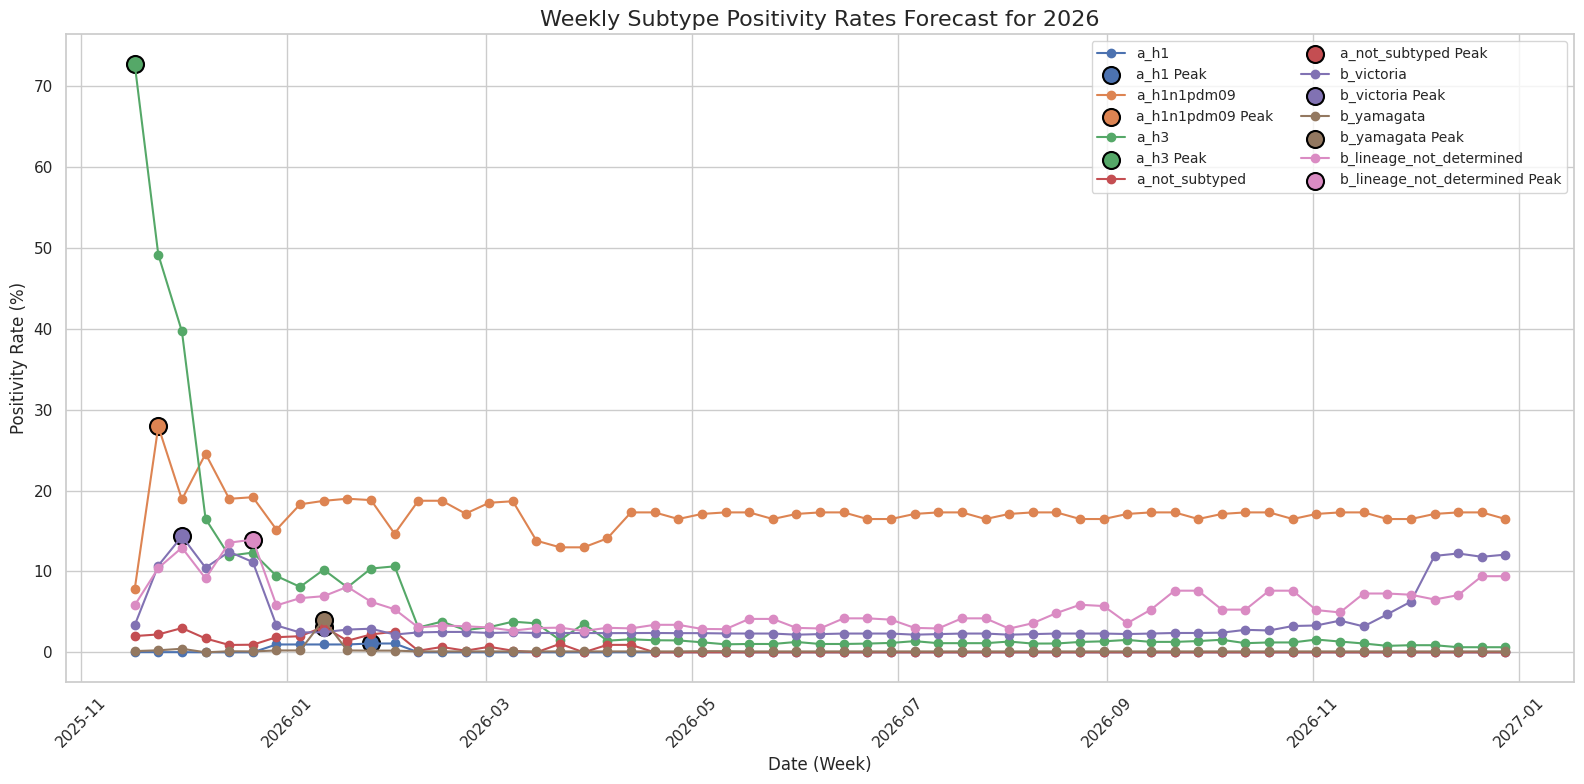

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

weekly = pd.read_csv("XGBOOST_weekly_subtype_probabilities_forecast.csv", parse_dates=['Date'])
subtypes = [c.replace('_Pct','') for c in weekly.columns if '_Pct' in c]

plt.figure(figsize=(16, 8))

for sub in subtypes:
    plt.plot(
        weekly['Date'],
        weekly[f'{sub}_Pct'],
        marker='o',
        label=sub
    )

    # Highlight peak week
    peak_idx = weekly[f'{sub}_Pct'].idxmax()
    plt.scatter(
        weekly.loc[peak_idx, 'Date'],
        weekly.loc[peak_idx, f'{sub}_Pct'],
        s=150, edgecolor='black', linewidth=1.5,
        label=f'{sub} Peak'
    )

plt.title("Weekly Subtype Positivity Rates Forecast for 2026", fontsize=16)
plt.xlabel("Date (Week)", fontsize=12)
plt.ylabel("Positivity Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right', ncol=2, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Load the CSV
monthly_df = pd.read_csv("XGBOOST_monthly_subtype_probabilities_forecast_2026.csv")

# Display the DataFrame
print("=== Monthly Forecast 2026 ===")
monthly_df

=== Monthly Forecast 2026 ===


Month  a_h1_Pct a_h1_Outbreak  a_h1n1pdm09_Pct a_h1n1pdm09_Outbreak  \
0     January    1.0000            No          18.7100                   No   
1    February    0.2725            No          17.3200                   No   
2       March    0.0000            No          15.3860                   No   
3       April    0.0000            No          16.2925                   No   
4         May    0.0050            No          17.0475                   No   
5        June    0.0000            No          16.9340                   No   
6        July    0.0000            No          17.0475                   No   
7      August    0.0000            No          16.9340                   No   
8   September    0.0000            No          17.0475                   No   
9     October    0.0000            No          17.0475                   No   
10   November    0.0000            No          16.9340                   No   
11   December    0.0000            No          17.0475                   No   

    a_h3_Pct a_h3_Outbreak  a_not_subtyped_Pct a_not_subtyped_Outbreak  \
0     9.1750            No              2.1950                      No   
1     5.0600            No              0.9025                      No   
2     3.1040            No              0.3860                      No   
3     1.5025            No              0.4600                      No   
4     1.0725            No              0.0000                      No   
5     1.1160            No              0.0000                      No   
6     1.1925            No              0.0000                      No   
7     1.2280            No              0.0000                      No   
8     1.3750            No              0.0000                      No   
9     1.2800            No              0.0000                      No   
10    1.1360            No              0.0000                      No   
11    0.6925            No              0.0000                      No   

    b_victoria_Pct b_victoria_Outbreak  b_yamagata_Pct b_yamagata_Outbreak  \
0           2.6675                  No           1.180                  No   
1           2.4250                  No           0.135                  No   
2           2.4040                  No           0.110                  No   
3           2.3775                  No           0.110                  No   
4           2.3350                  No           0.125                  No   
5           2.2780                  No           0.110                  No   
6           2.2675                  No           0.110                  No   
7           2.2780                  No           0.110                  No   
8           2.3400                  No           0.110                  No   
9           2.7900                  No           0.110                  No   
10          4.2820                  No           0.110                  No   
11         12.0075                  No           0.110                  No   

    b_lineage_not_determined_Pct b_lineage_not_determined_Outbreak  
0                         6.9975                                No  
1                         3.7300                                No  
2                         2.8880                                No  
3                         3.1975                                No  
4                         3.5025                                No  
5                         3.6820                                No  
6                         3.5925                                No  
7                         4.5960                                No  
8                         6.0300                                No  
9                         6.4500                                No  
10                        6.3620                                No  
11                        8.1050                                No

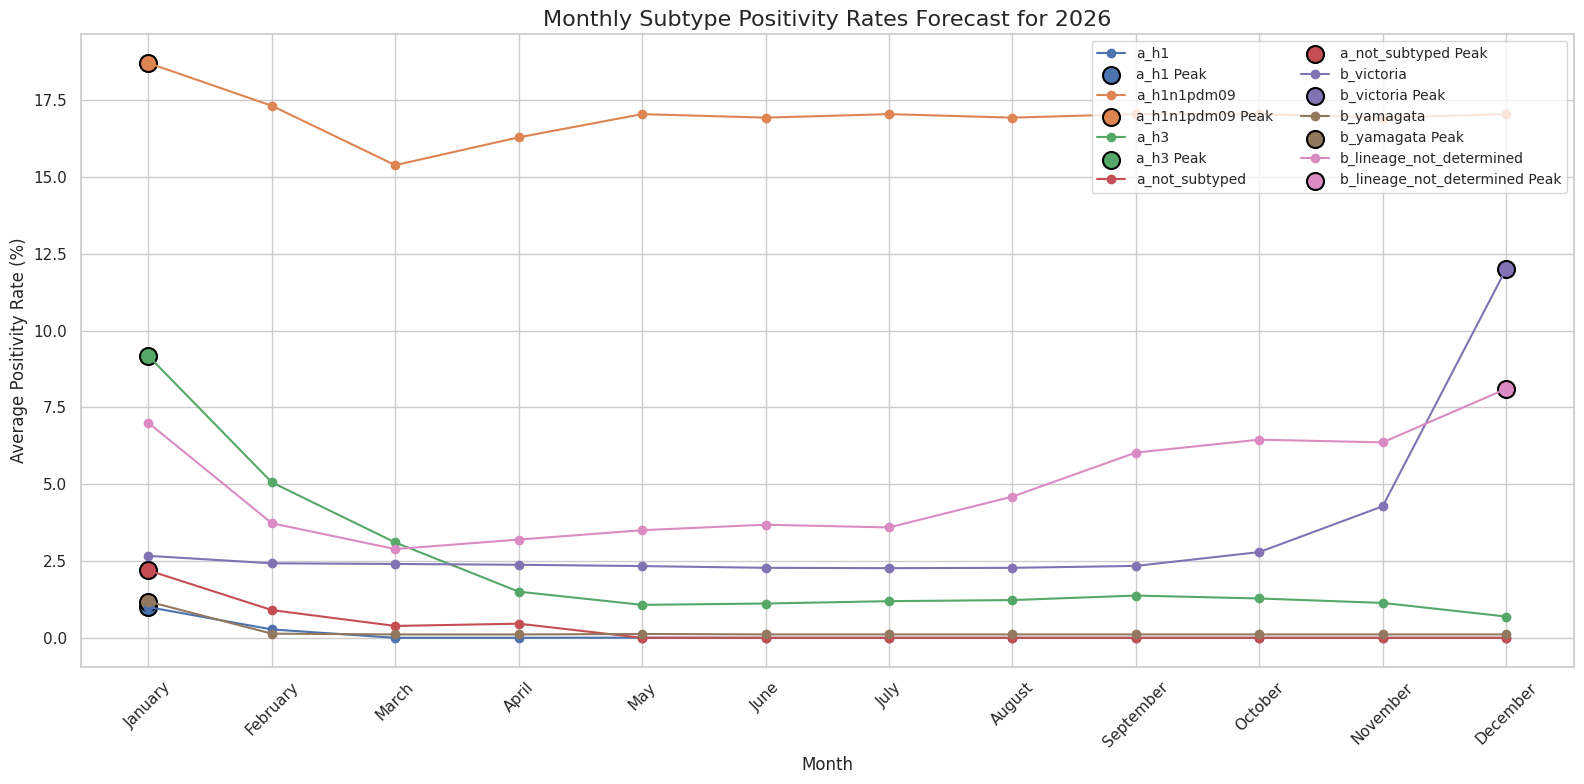

In [ ]:
monthly = pd.read_csv("XGBOOST_monthly_subtype_probabilities_forecast_2026.csv")
subtypes = [c.replace('_Pct','') for c in monthly.columns if '_Pct' in c]

plt.figure(figsize=(16, 8))

for sub in subtypes:
    plt.plot(
        monthly['Month'],
        monthly[f'{sub}_Pct'],
        marker='o',
        label=sub
    )

    # Highlight peak month
    peak_idx = monthly[f'{sub}_Pct'].idxmax()
    plt.scatter(
        monthly.loc[peak_idx, 'Month'],
        monthly.loc[peak_idx, f'{sub}_Pct'],
        s=150, edgecolor='black', linewidth=1.5,
        label=f'{sub} Peak'
    )

plt.title("Monthly Subtype Positivity Rates Forecast for 2026", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Positivity Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right', ncol=2, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Load the CSV
peak_df = pd.read_csv("XGBOOST_peak_outbreaks_2026.csv")

# Display the DataFrame
print("=== Peak Outbreaks 2026 ===")
peak_df

=== Peak Outbreaks 2026 ===


Subtype     Month  Week_of_Month  Probability (%)
0                      a_h1   January              4             1.09
1               a_h1n1pdm09   January              3            18.99
2                      a_h3  February              1            10.63
3            a_not_subtyped   January              2             3.15
4                b_victoria  December              2            12.22
5                b_yamagata   January              2             4.05
6  b_lineage_not_determined  December              3             9.41

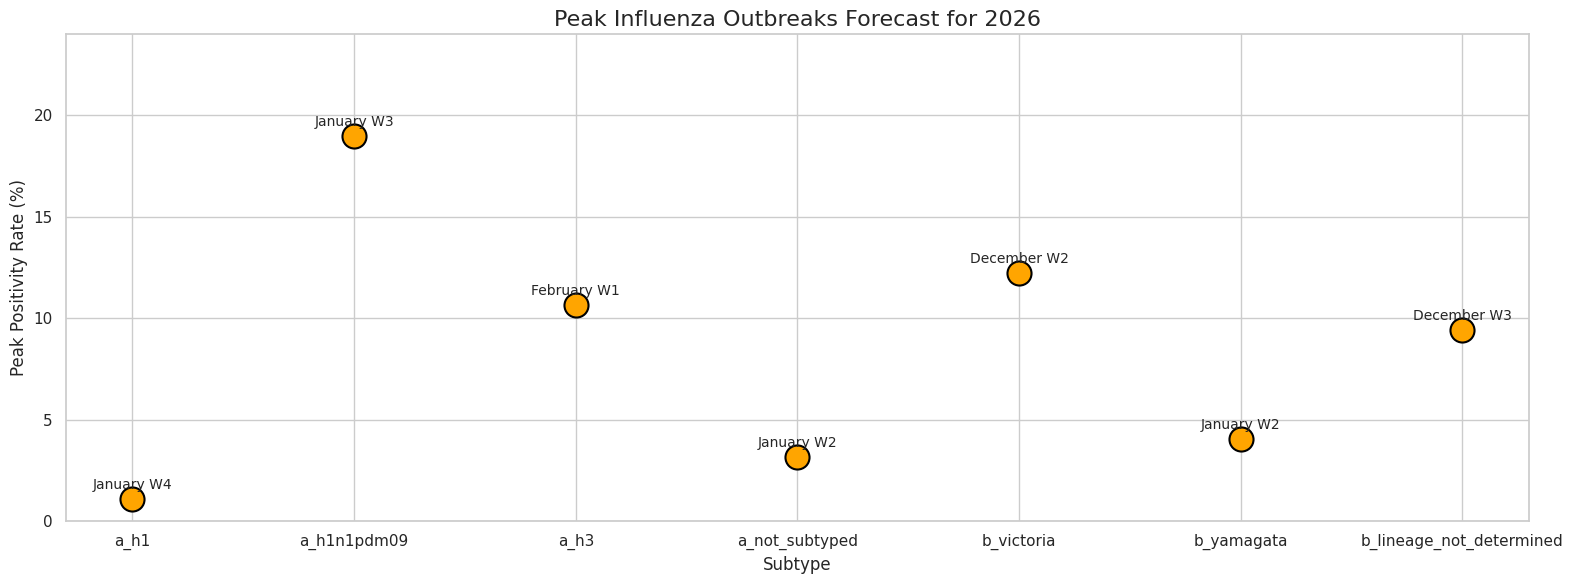

In [ ]:
peak = pd.read_csv("XGBOOST_peak_outbreaks_2026.csv")

plt.figure(figsize=(16, 6))

for i, row in peak.iterrows():
    plt.scatter(
        row['Subtype'],
        row['Probability (%)'],
        s=300,
        color='orange',
        edgecolor='black',
        linewidth=1.5
    )
    plt.text(row['Subtype'], row['Probability (%)']+0.5, f"{row['Month']} W{row['Week_of_Month']}",
             ha='center', fontsize=10)

plt.title("Peak Influenza Outbreaks Forecast for 2026", fontsize=16)
plt.ylabel("Peak Positivity Rate (%)", fontsize=12)
plt.xlabel("Subtype", fontsize=12)
plt.ylim(0, peak['Probability (%)'].max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()

# **DEEP LEARNING**

## **LONG SHORT TERM MEMORY (LSTM) MODEL**

In [ ]:
!pip install tensorflow

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 15.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import math
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

CSV_PATH = "/content/FlunetData_Philippines_All Sites_for_01 January 1995 to 17 November 2025.xlsx - Cleaned Dataset 2.0.csv"
country_filter = "Philippines"
lag_weeks = [1, 2, 3, 4, 12, 26]
rolling_windows = [3, 6, 12]
subtypes = [
    "a_h1","a_h1n1pdm09","a_h3","a_not_subtyped",
    "b_victoria","b_yamagata","b_lineage_not_determined"
]

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

df = pd.read_csv(CSV_PATH, parse_dates=["start_date"])
df = df[df["country"] == country_filter].sort_values("start_date").reset_index(drop=True)
df["influenza_positive"] = df["influenza_positive"].replace(0, 1)

# Percentages
for s in subtypes:
    df[f"pct_{s}"] = (df[s] / df["influenza_positive"]) * 100
    df[f"pct_{s}"] = df[f"pct_{s}"].clip(0, 100)

def week_of_month(dt):
    return math.ceil(dt.day / 7)

df["weekofyear"] = df["start_date"].dt.isocalendar().week.astype(int)
df["month"] = df["start_date"].dt.month
df["year"] = df["start_date"].dt.year
df["week_of_month"] = df["start_date"].apply(week_of_month)

for s in subtypes:
    pct_col = f"pct_{s}"
    for l in lag_weeks:
        df[f"{pct_col}_lag{l}"] = df[pct_col].shift(l)
    for w in rolling_windows:
        df[f"{pct_col}_roll{w}"] = df[pct_col].shift(1).rolling(w).mean()

for l in [1, 2, 4, 12]:
    df[f"infl_pos_lag{l}"] = df["influenza_positive"].shift(l)

df_model = df.dropna().reset_index(drop=True)

feature_cols = []
for s in subtypes:
    pct_col = f"pct_{s}"
    feature_cols += [f"{pct_col}_lag{l}" for l in lag_weeks]
    feature_cols += [f"{pct_col}_roll{w}" for w in rolling_windows]

feature_cols += [f"infl_pos_lag{l}" for l in [1, 2, 4, 12]]
feature_cols += ["weekofyear", "month", "year", "week_of_month"]

# ---------------------- TRAIN/TEST SPLIT ----------------------
train_df = df_model[df_model["year"] <= 2020].copy()
test_df  = df_model[(df_model["year"] >= 2021) & (df_model["year"] <= 2025)].copy()

def build_lstm(timesteps, n_features, units, dropout, lr, l2_reg):
    model = Sequential([
        LSTM(units,
             input_shape=(timesteps, n_features),
             recurrent_dropout=0.2,
             kernel_regularizer=l2(l2_reg),
             recurrent_regularizer=l2(l2_reg)),
        Dropout(dropout),
        Dense(1)
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr, decay=1e-5),
        loss="mae"
    )
    return model

def create_sequences(X_raw, y_raw, timesteps):
    X, y = [], []
    for i in range(timesteps, len(X_raw)):
        X.append(X_raw[i-timesteps:i])
        y.append(y_raw[i])
    return np.array(X), np.array(y)

# ---------------------- OPTUNA OBJECTIVE ----------------------
def objective(trial, X_scaled, y_scaled):

    timesteps = trial.suggest_int("timesteps", 3, 5)
    units     = trial.suggest_int("units", 16, 32)
    dropout   = trial.suggest_float("dropout", 0.2, 0.5)
    lr        = trial.suggest_loguniform("lr", 1e-4, 5e-3)
    batch     = trial.suggest_int("batch", 8, 32)
    epochs    = trial.suggest_int("epochs", 20, 60)
    l2_reg    = trial.suggest_loguniform("l2_reg", 1e-5, 1e-3)

    X_seq, y_seq = create_sequences(X_scaled, y_scaled, timesteps)
    if len(X_seq) < 40:
        return 999999

    val_size = int(len(X_seq) * 0.2)
    X_train, X_val = X_seq[:-val_size], X_seq[-val_size:]
    y_train, y_val = y_seq[:-val_size], y_seq[-val_size:]

    model = build_lstm(timesteps, X_train.shape[2], units, dropout, lr, l2_reg)
    es = EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch,
        shuffle=False,
        callbacks=[es],
        verbose=0
    )

    pred = model.predict(X_val, verbose=0)
    return mean_absolute_error(y_val, pred)

# ---------------------- TRAIN ALL SUBTYPES ----------------------
models_LSTM = {}
best_params_LSTM = {}

for s in subtypes:
    print(f"\nTraining {s}...")

    target = f"pct_{s}"
    X_raw = train_df[feature_cols].values
    y_raw = train_df[[target]].values

    # SCALE ONCE here (fixes instability)
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X_raw)
    y_scaled = scaler_y.fit_transform(y_raw)

    # OPTUNA
    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: objective(trial, X_scaled, y_scaled),
                   n_trials=25, show_progress_bar=False)

    best_params_LSTM[s] = study.best_params
    print("Best params:", study.best_params)

    # FINAL TRAINING
    timesteps = study.best_params["timesteps"]
    X_seq, y_seq = create_sequences(X_scaled, y_scaled, timesteps)
    n_features = X_seq.shape[2]

    model = build_lstm(
        timesteps, n_features,
        study.best_params["units"],
        study.best_params["dropout"],
        study.best_params["lr"],
        study.best_params["l2_reg"]
    )

    es = EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)

    history = model.fit(
        X_seq, y_seq,
        validation_split=0.1,
        epochs=study.best_params["epochs"],
        batch_size=study.best_params["batch"],
        shuffle=False,
        callbacks=[es],
        verbose=0
    )

    models_LSTM[s] = {
        "model": model,
        "scaler_X": scaler_X,
        "scaler_y": scaler_y,
        "timesteps": timesteps,
        "feature_cols": feature_cols
    }

    print(f"{s} → DONE ({len(history.history['loss'])} epochs)")

print("\nAll LSTM models trained successfully.")

[I 2025-12-10 12:37:33,231] A new study created in memory with name: no-name-5973f1ed-d6b4-436e-8335-02cabeef79cc



Training a_h1...


[I 2025-12-10 12:37:50,693] Trial 0 finished with value: 0.01032578484142853 and parameters: {'timesteps': 3, 'units': 21, 'dropout': 0.36886234553529684, 'lr': 0.00038210071418694474, 'batch': 28, 'epochs': 34, 'l2_reg': 1.0088476480807285e-05}. Best is trial 0 with value: 0.01032578484142853.
[I 2025-12-10 12:38:09,611] Trial 1 finished with value: 0.011155437273121974 and parameters: {'timesteps': 3, 'units': 17, 'dropout': 0.2438596716347907, 'lr': 0.00026495552234673334, 'batch': 28, 'epochs': 57, 'l2_reg': 1.3951410133677184e-05}. Best is trial 0 with value: 0.01032578484142853.
[I 2025-12-10 12:38:25,276] Trial 2 finished with value: 0.001799774791815001 and parameters: {'timesteps': 5, 'units': 25, 'dropout': 0.4697433330118328, 'lr': 0.0028748731887073458, 'batch': 12, 'epochs': 38, 'l2_reg': 1.8201716385486252e-05}. Best is trial 2 with value: 0.001799774791815001.
[I 2025-12-10 12:38:43,741] Trial 3 finished with value: 0.005328524066228172 and parameters: {'timesteps': 5, '

Best params: {'timesteps': 5, 'units': 25, 'dropout': 0.4697433330118328, 'lr': 0.0028748731887073458, 'batch': 12, 'epochs': 38, 'l2_reg': 1.8201716385486252e-05}


[I 2025-12-10 12:45:25,666] A new study created in memory with name: no-name-079413f7-a895-4430-987e-2520652daf86


a_h1 → DONE (29 epochs)

Training a_h1n1pdm09...


[I 2025-12-10 12:45:34,053] Trial 0 finished with value: 0.16996735073394 and parameters: {'timesteps': 3, 'units': 24, 'dropout': 0.26236373915342764, 'lr': 0.0038522816751471872, 'batch': 14, 'epochs': 20, 'l2_reg': 1.3304382764108484e-05}. Best is trial 0 with value: 0.16996735073394.
[I 2025-12-10 12:45:49,418] Trial 1 finished with value: 0.16647093381367145 and parameters: {'timesteps': 4, 'units': 21, 'dropout': 0.23456085950647954, 'lr': 0.0007392395167606226, 'batch': 18, 'epochs': 44, 'l2_reg': 2.383235641330577e-05}. Best is trial 1 with value: 0.16647093381367145.
[I 2025-12-10 12:46:06,575] Trial 2 finished with value: 0.1744414254967073 and parameters: {'timesteps': 5, 'units': 30, 'dropout': 0.2329867771187511, 'lr': 0.003879471647593476, 'batch': 12, 'epochs': 49, 'l2_reg': 2.884575440707726e-05}. Best is trial 1 with value: 0.16647093381367145.
[I 2025-12-10 12:46:20,246] Trial 3 finished with value: 0.17369125899511142 and parameters: {'timesteps': 4, 'units': 29, 'dr

Best params: {'timesteps': 5, 'units': 30, 'dropout': 0.20846374420761754, 'lr': 0.0008702473712580254, 'batch': 26, 'epochs': 60, 'l2_reg': 0.0005390791664262057}


[I 2025-12-10 12:52:04,134] A new study created in memory with name: no-name-bb92a22a-9865-4394-80bc-2b651fc4c377


a_h1n1pdm09 → DONE (51 epochs)

Training a_h3...


[I 2025-12-10 12:52:27,627] Trial 0 finished with value: 0.1627260976376318 and parameters: {'timesteps': 5, 'units': 27, 'dropout': 0.3744566363928354, 'lr': 0.0002997150611355299, 'batch': 22, 'epochs': 55, 'l2_reg': 0.0007548057478355697}. Best is trial 0 with value: 0.1627260976376318.
[I 2025-12-10 12:52:35,922] Trial 1 finished with value: 0.13945735699957165 and parameters: {'timesteps': 4, 'units': 27, 'dropout': 0.22214144161070465, 'lr': 0.001887882391796262, 'batch': 23, 'epochs': 55, 'l2_reg': 0.00012218894108591126}. Best is trial 1 with value: 0.13945735699957165.
[I 2025-12-10 12:52:45,601] Trial 2 finished with value: 0.14194308267865718 and parameters: {'timesteps': 3, 'units': 30, 'dropout': 0.26826332595297286, 'lr': 0.003352991380399373, 'batch': 28, 'epochs': 41, 'l2_reg': 0.0007152911553527137}. Best is trial 1 with value: 0.13945735699957165.
[I 2025-12-10 12:53:04,991] Trial 3 finished with value: 0.14513752346501926 and parameters: {'timesteps': 3, 'units': 24,

Best params: {'timesteps': 3, 'units': 22, 'dropout': 0.24836027017459703, 'lr': 0.0030168827054205486, 'batch': 17, 'epochs': 27, 'l2_reg': 1.2690231202943545e-05}


[I 2025-12-10 12:58:56,461] A new study created in memory with name: no-name-64d3d71f-ad68-425b-b7f1-f525790ea4c2


a_h3 → DONE (18 epochs)

Training a_not_subtyped...


[I 2025-12-10 12:59:13,758] Trial 0 finished with value: 0.025687581782294144 and parameters: {'timesteps': 5, 'units': 32, 'dropout': 0.3869668558164657, 'lr': 0.00018286535511267656, 'batch': 29, 'epochs': 55, 'l2_reg': 4.764760159240905e-05}. Best is trial 0 with value: 0.025687581782294144.
[I 2025-12-10 12:59:26,961] Trial 1 finished with value: 0.021088087420579188 and parameters: {'timesteps': 3, 'units': 24, 'dropout': 0.4176425523230428, 'lr': 0.0003996247577071795, 'batch': 16, 'epochs': 22, 'l2_reg': 1.1022250516428459e-05}. Best is trial 1 with value: 0.021088087420579188.
[I 2025-12-10 12:59:45,863] Trial 2 finished with value: 0.0173714612705212 and parameters: {'timesteps': 3, 'units': 32, 'dropout': 0.4627140380187855, 'lr': 0.0006201986760777519, 'batch': 13, 'epochs': 53, 'l2_reg': 3.462771065136945e-05}. Best is trial 2 with value: 0.0173714612705212.
[I 2025-12-10 13:00:17,014] Trial 3 finished with value: 0.03435582669401849 and parameters: {'timesteps': 5, 'units'

Best params: {'timesteps': 4, 'units': 27, 'dropout': 0.49865267611127334, 'lr': 0.001863329185883977, 'batch': 12, 'epochs': 35, 'l2_reg': 0.0009520163140599998}


[I 2025-12-10 13:07:41,616] A new study created in memory with name: no-name-d2ee9a36-5831-4999-b858-2bb92b1ae4cc


a_not_subtyped → DONE (35 epochs)

Training b_victoria...


[I 2025-12-10 13:07:57,855] Trial 0 finished with value: 0.11770482208097603 and parameters: {'timesteps': 3, 'units': 32, 'dropout': 0.489444843851371, 'lr': 0.0015908990268111852, 'batch': 12, 'epochs': 27, 'l2_reg': 0.00014623685333271916}. Best is trial 0 with value: 0.11770482208097603.
[I 2025-12-10 13:08:11,214] Trial 1 finished with value: 0.11906032138232175 and parameters: {'timesteps': 3, 'units': 24, 'dropout': 0.3237927958490995, 'lr': 0.0007682401934944624, 'batch': 22, 'epochs': 29, 'l2_reg': 1.668651567605093e-05}. Best is trial 0 with value: 0.11770482208097603.
[I 2025-12-10 13:08:29,507] Trial 2 finished with value: 0.1337636013873825 and parameters: {'timesteps': 5, 'units': 20, 'dropout': 0.2411374064335017, 'lr': 0.00013582340956857852, 'batch': 32, 'epochs': 49, 'l2_reg': 0.0006339202528986863}. Best is trial 0 with value: 0.11770482208097603.
[I 2025-12-10 13:08:50,034] Trial 3 finished with value: 0.12084785865342948 and parameters: {'timesteps': 3, 'units': 22

Best params: {'timesteps': 4, 'units': 29, 'dropout': 0.39284377206728227, 'lr': 0.00337593679308211, 'batch': 10, 'epochs': 32, 'l2_reg': 2.5901297702664486e-05}


[I 2025-12-10 13:15:12,984] A new study created in memory with name: no-name-a7ce3209-bf9f-4697-bd37-f967109c416f


b_victoria → DONE (28 epochs)

Training b_yamagata...


[I 2025-12-10 13:15:21,775] Trial 0 finished with value: 0.09582507380444373 and parameters: {'timesteps': 5, 'units': 32, 'dropout': 0.26787455552978684, 'lr': 0.0013073172457501692, 'batch': 17, 'epochs': 41, 'l2_reg': 1.1261282470220028e-05}. Best is trial 0 with value: 0.09582507380444373.
[I 2025-12-10 13:15:39,658] Trial 1 finished with value: 0.09816485634451588 and parameters: {'timesteps': 5, 'units': 21, 'dropout': 0.3580134094403138, 'lr': 0.00014164817293165087, 'batch': 13, 'epochs': 26, 'l2_reg': 3.3645686065924504e-05}. Best is trial 0 with value: 0.09582507380444373.
[I 2025-12-10 13:15:51,576] Trial 2 finished with value: 0.08301897769494344 and parameters: {'timesteps': 5, 'units': 29, 'dropout': 0.2090189062587272, 'lr': 0.00012890352821013534, 'batch': 21, 'epochs': 52, 'l2_reg': 1.0792942640877547e-05}. Best is trial 2 with value: 0.08301897769494344.
[I 2025-12-10 13:16:09,985] Trial 3 finished with value: 0.09677333626409257 and parameters: {'timesteps': 4, 'unit

Best params: {'timesteps': 4, 'units': 26, 'dropout': 0.3777733749095362, 'lr': 0.002415837759196839, 'batch': 26, 'epochs': 60, 'l2_reg': 0.00012176407045127911}


[I 2025-12-10 13:21:43,552] A new study created in memory with name: no-name-d7e0cb53-d0eb-4a23-9284-c166fb12b393


b_yamagata → DONE (22 epochs)

Training b_lineage_not_determined...


[I 2025-12-10 13:21:58,597] Trial 0 finished with value: 0.10478093965193365 and parameters: {'timesteps': 4, 'units': 32, 'dropout': 0.4437747556953962, 'lr': 0.00039192934442460825, 'batch': 26, 'epochs': 58, 'l2_reg': 0.0004384101993439975}. Best is trial 0 with value: 0.10478093965193365.
[I 2025-12-10 13:22:08,458] Trial 1 finished with value: 0.13116865223729665 and parameters: {'timesteps': 4, 'units': 28, 'dropout': 0.3541772768068884, 'lr': 0.0002927780630080217, 'batch': 23, 'epochs': 58, 'l2_reg': 3.86694002576601e-05}. Best is trial 0 with value: 0.10478093965193365.
[I 2025-12-10 13:22:29,522] Trial 2 finished with value: 0.14874088221061457 and parameters: {'timesteps': 3, 'units': 27, 'dropout': 0.2748551181280991, 'lr': 0.00017921800516124806, 'batch': 25, 'epochs': 60, 'l2_reg': 0.000520952645750903}. Best is trial 0 with value: 0.10478093965193365.
[I 2025-12-10 13:22:36,841] Trial 3 finished with value: 0.11520868053945035 and parameters: {'timesteps': 5, 'units': 21

Best params: {'timesteps': 5, 'units': 21, 'dropout': 0.46130817099334326, 'lr': 0.0017498403474945261, 'batch': 22, 'epochs': 48, 'l2_reg': 6.635838006612625e-05}
b_lineage_not_determined → DONE (22 epochs)

All LSTM models trained successfully.


In [ ]:
summary_rows_LSTM = []

for s in subtypes:
    row = {
        "Subtype": s,
    }

    for param_name, param_value in best_params_LSTM[s].items():
        row[param_name] = param_value

    summary_rows_LSTM.append(row)

best_params_LSTM_df = pd.DataFrame(summary_rows_LSTM)

print("\n=== BEST LSTM PARAMETERS PER SUBTYPE ===")
best_params_LSTM_df


=== BEST LSTM PARAMETERS PER SUBTYPE ===


Subtype  timesteps  units   dropout        lr  batch  \
0                      a_h1          5     25  0.469743  0.002875     12   
1               a_h1n1pdm09          5     30  0.208464  0.000870     26   
2                      a_h3          3     22  0.248360  0.003017     17   
3            a_not_subtyped          4     27  0.498653  0.001863     12   
4                b_victoria          4     29  0.392844  0.003376     10   
5                b_yamagata          4     26  0.377773  0.002416     26   
6  b_lineage_not_determined          5     21  0.461308  0.001750     22   

   epochs    l2_reg  
0      38  0.000018  
1      60  0.000539  
2      27  0.000013  
3      35  0.000952  
4      32  0.000026  
5      60  0.000122  
6      48  0.000066

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-6):
    """Avoid division by zero in MAPE."""
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-6):
    """Avoid division by zero in sMAPE."""
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + epsilon)) * 100

# --------------------------- TEST METRICS (OPTUNA LSTM) ---------------------------
metrics = {}

for s in subtypes:
    target = f"pct_{s}"

    # Test arrays
    X_test = test_df[feature_cols].values
    y_test = test_df[target].values.reshape(-1,1)

    # Timesteps for this subtype
    timesteps = models_LSTM[s]["timesteps"]

    # Create sequences like in training
    X_seq_test, y_seq_test = [], []
    for i in range(timesteps, len(X_test)):
        X_seq_test.append(X_test[i-timesteps:i])
        y_seq_test.append(y_test[i])
    X_seq_test = np.array(X_seq_test)
    y_seq_test = np.array(y_seq_test)

    # Get model and scalers
    model = models_LSTM[s]["model"]
    scaler_y = models_LSTM[s]["scaler_y"]
    scaler_X = models_LSTM[s]["scaler_X"]

    # Scale X using stored scaler
    n_features = X_seq_test.shape[2]
    X_seq_test_scaled = scaler_X.transform(X_seq_test.reshape(-1, n_features)).reshape(X_seq_test.shape)

    # Predict and inverse transform
    y_pred_scaled = model.predict(X_seq_test_scaled, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # Store metrics safely
    metrics[s] = {
        "MAE": mean_absolute_error(y_seq_test, y_pred),
        "MSE": mean_squared_error(y_seq_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_seq_test, y_pred)),
        "R2": r2_score(y_seq_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_seq_test, y_pred),
        "sMAPE": symmetric_mean_absolute_percentage_error(y_seq_test, y_pred)
    }

metrics_df = pd.DataFrame(metrics).T
print("\n=== FINAL OPTUNA LSTM METRICS (SAFE) ===")
metrics_df



=== FINAL OPTUNA LSTM METRICS (SAFE) ===


MAE         MSE       RMSE        R2  \
a_h1                       0.211077    0.073289   0.270720  0.000000   
a_h1n1pdm09               12.927964  393.153388  19.828096  0.641247   
a_h3                      19.299761  906.593517  30.109691  0.374265   
a_not_subtyped             0.795024   52.377276   7.237215 -0.011539   
b_victoria                16.052008  691.515384  26.296680  0.121124   
b_yamagata                 0.931639    1.858943   1.363431  0.000000   
b_lineage_not_determined   3.893412   84.087407   9.169919 -0.198723   

                                  MAPE       sMAPE  
a_h1                      2.110772e+07  199.996920  
a_h1n1pdm09               9.053749e+08  160.044248  
a_h3                      1.374854e+09  151.042613  
a_not_subtyped            1.461887e+06  199.817654  
b_victoria                5.352512e+08  163.021849  
b_yamagata                9.316390e+07  199.998715  
b_lineage_not_determined  2.345125e+08  196.299401

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true_all = []
y_pred_all = []

for s in subtypes:
    target = f"pct_{s}"

    # Get test arrays
    X_test = test_df[feature_cols].values
    y_test = test_df[target].values.reshape(-1,1)

    # Get timesteps for this subtype
    timesteps = models_LSTM[s]["timesteps"]

    # Create sequences for test set
    X_seq_test, y_seq_test = [], []
    for i in range(timesteps, len(X_test)):
        X_seq_test.append(X_test[i-timesteps:i])
        y_seq_test.append(y_test[i])
    X_seq_test = np.array(X_seq_test)
    y_seq_test = np.array(y_seq_test)

    # Get model and scaler
    model = models_LSTM[s]["model"]
    scaler_y = models_LSTM[s]["scaler_y"]
    scaler_X = models_LSTM[s]["scaler_X"]
    n_features = X_seq_test.shape[2]

    # Scale X using stored scaler
    X_seq_test_scaled = scaler_X.transform(X_seq_test.reshape(-1, n_features)).reshape(X_seq_test.shape)

    # Predict and inverse-transform
    y_pred_scaled = model.predict(X_seq_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    y_true_all.append(y_seq_test.flatten())
    y_pred_all.append(y_pred)

# Convert lists to 1D arrays
y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)

def overall_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def overall_smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred))
    mask = denominator != 0
    return np.mean(2 * np.abs(y_pred[mask] - y_true[mask]) / denominator[mask]) * 100

print("\n=== OVERALL METRICS ACROSS ALL SUBTYPES (LSTM Optuna Models) ===")
print(f"Overall MAE   : {mean_absolute_error(y_true_all, y_pred_all):.3f}")
print(f"Overall MSE   : {mean_squared_error(y_true_all, y_pred_all):.3f}")
print(f"Overall RMSE  : {np.sqrt(mean_squared_error(y_true_all, y_pred_all)):.3f}")
print(f"Overall R²    : {r2_score(y_true_all, y_pred_all):.3f}")
print(f"Overall MAPE  : {overall_mape(y_true_all, y_pred_all):.2f}%")
print(f"Overall sMAPE : {overall_smape(y_true_all, y_pred_all):.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

=== OVERALL METRICS ACROSS ALL SUBTYPES (LSTM Optuna Models) ===
Overall MAE   : 7.741
Overall MSE   : 304.848
Overall RMSE  : 17.460
Overall R²    : 0.544
Overall MAPE  : 57.40%
Overall sMAPE : 170.21%


In [ ]:
import numpy as np
import pandas as pd

# FORECASTED DATA PERCENTAGES (Actual vs Predicted, 2022–2025)
forecast_pct_table = test_df[["start_date"] + [f"pct_{s}" for s in subtypes]].copy()
X_test = test_df[feature_cols].values

def safe_mape(y_true, y_pred, epsilon=1e-6):
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

def safe_smape(y_true, y_pred, epsilon=1e-6):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + epsilon)) * 100

# Generate predictions for each subtype
for s in subtypes:
    model = models_LSTM[s]["model"]
    scaler_y = models_LSTM[s]["scaler_y"]
    scaler_X = models_LSTM[s]["scaler_X"]
    timesteps = models_LSTM[s]["timesteps"]

    # Create sequences for test set
    X_seq_test = []
    for i in range(timesteps, len(X_test)):
        X_seq_test.append(X_test[i-timesteps:i])
    X_seq_test = np.array(X_seq_test)

    # Scale X using stored scaler
    n_features = X_seq_test.shape[2]
    X_seq_test_scaled = scaler_X.transform(X_seq_test.reshape(-1, n_features)).reshape(X_seq_test.shape)

    # Predict and inverse-transform
    y_pred_scaled = model.predict(X_seq_test_scaled, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # Align prediction length with original test_df
    y_pred_full = np.concatenate([np.full(timesteps, np.nan), y_pred])
    forecast_pct_table[f"pred_pct_{s}"] = y_pred_full

# Reorder columns to interleave Actual and Predicted
cols_ordered = ["start_date"]
for s in subtypes:
    cols_ordered += [f"pct_{s}", f"pred_pct_{s}"]

forecast_pct_table = forecast_pct_table[cols_ordered]

print("\n================ ACTUAL vs PREDICTED DATA PERCENTAGES (2022–2025) - LSTM ================\n")
forecast_pct_table


================ ACTUAL vs PREDICTED DATA PERCENTAGES (2022–2025) - LSTM ================



start_date  pct_a_h1  pred_pct_a_h1  pct_a_h1n1pdm09  \
945  2021-01-04       0.0            NaN         0.000000   
946  2021-01-11       0.0            NaN         0.000000   
947  2021-01-18       0.0            NaN         0.000000   
948  2021-01-25       0.0            NaN         0.000000   
949  2021-02-01       0.0            NaN         0.000000   
...         ...       ...            ...              ...   
1187 2025-10-13       0.0       0.024464        20.000000   
1188 2025-10-20       0.0       0.031191         5.617978   
1189 2025-10-27       0.0       0.007669         7.042254   
1190 2025-11-03       0.0       0.057643         0.000000   
1191 2025-11-10       0.0      -0.033608         0.000000   

      pred_pct_a_h1n1pdm09    pct_a_h3  pred_pct_a_h3  pct_a_not_subtyped  \
945                    NaN    0.000000            NaN            0.000000   
946                    NaN    0.000000            NaN            0.000000   
947                    NaN    0.000000            NaN            0.000000   
948                    NaN    0.000000       0.778875            0.000000   
949                    NaN    0.000000       0.198823            0.000000   
...                    ...         ...            ...                 ...   
1187             23.783377   71.111111      36.096321            6.666667   
1188             15.964602   89.887640      51.226269            3.370787   
1189             10.847041   88.732394      57.985771            1.408451   
1190              7.925341  100.000000      68.936852            0.000000   
1191              4.651415  100.000000      74.411217            0.000000   

      pred_pct_a_not_subtyped  pct_b_victoria  pred_pct_b_victoria  \
945                       NaN        0.000000                  NaN   
946                       NaN        0.000000                  NaN   
947                       NaN        0.000000                  NaN   
948                       NaN        0.000000                  NaN   
949                  0.034967        0.000000            -0.065308   
...                       ...             ...                  ...   
1187                -0.007539        2.222222             0.531280   
1188                 0.002808        1.123596             0.617980   
1189                 0.005120        2.816901             0.772770   
1190                 0.012200        0.000000             0.655763   
1191                 0.011509        0.000000             0.405920   

      pct_b_yamagata  pred_pct_b_yamagata  pct_b_lineage_not_determined  \
945              0.0                  NaN                           0.0   
946              0.0                  NaN                           0.0   
947              0.0                  NaN                           0.0   
948              0.0                  NaN                           0.0   
949              0.0            -1.819899                           0.0   
...              ...                  ...                           ...   
1187             0.0             4.398570                           0.0   
1188             0.0             3.668515                           0.0   
1189             0.0             2.208070                           0.0   
1190             0.0             1.539434                           0.0   
1191             0.0             1.442654                           0.0   

      pred_pct_b_lineage_not_determined  
945                                 NaN  
946                                 NaN  
947                                 NaN  
948                                 NaN  
949                                 NaN  
...                                 ...  
1187                           2.434268  
1188                           1.958777  
1189                           1.915707  
1190                           1.770981  
1191                           1.766110  

[247 rows x 15 columns]

In [ ]:
import pandas as pd
import numpy as np
import math
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
import tensorflow as tf

CSV_PATH = "/content/FlunetData_Philippines_All Sites_for_01 January 1995 to 17 November 2025.xlsx - Cleaned Dataset 2.0.csv"
country_filter = "Philippines"
forecast_start = pd.to_datetime("2025-11-17")
forecast_end = pd.to_datetime("2026-12-28")
lag_weeks = [1, 2, 3, 4, 12, 26]
rolling_windows = [3, 6, 12]
outbreak_method = "mean_std"
outbreak_multiplier = 2
outbreak_percentile = 95
subtypes = ["a_h1","a_h1n1pdm09","a_h3","a_not_subtyped","b_victoria","b_yamagata","b_lineage_not_determined"]

def week_of_month(dt):
    return math.ceil(dt.day / 7)

df = pd.read_csv(CSV_PATH, parse_dates=["start_date"])
df = df[df["country"] == country_filter].copy()
df.sort_values("start_date", inplace=True)
df.reset_index(drop=True, inplace=True)

# Compute subtype percentages
df["influenza_positive"] = df["influenza_positive"].replace(0, np.nan)
for s in subtypes:
    df[f"pct_{s}"] = np.where(df["influenza_positive"] > 0,
                               df[s]/df["influenza_positive"]*100.0, 0.0)

# Base features
df["weekofyear"] = df["start_date"].dt.isocalendar().week.astype(int)
df["month"] = df["start_date"].dt.month
df["year"] = df["start_date"].dt.year
df["week_of_month"] = df["start_date"].apply(week_of_month)

# ---------------- THRESHOLDS ----------------
thresholds = {}
for s in subtypes:
    hist = df[f"pct_{s}"].fillna(0)
    thresholds[s] = hist.mean() + outbreak_multiplier*hist.std() if outbreak_method=="mean_std" else np.percentile(hist, outbreak_percentile)

# ---------------- SIMULATED LSTM TRAINING ----------------
models = {}
for s in subtypes:
    print(f"Assuming pre-trained model for {s}")
    models[s] = None

# ---------------- FORECAST FRAME ----------------
all_weeks = pd.date_range(start=forecast_start, end=forecast_end, freq="W-MON")

# Historical rows for lags
history_for_lags = df[df["start_date"] < forecast_start].copy()
forecast_pct_table = history_for_lags[["start_date"] + [f"pct_{s}" for s in subtypes]].copy()

# ---------------- FUTURE PREDICTION (RECURSIVE LSTM FORECAST) ----------------
pct_cols = [f"pct_{s}" for s in subtypes]
scaler = MinMaxScaler()
scaled_history = scaler.fit_transform(forecast_pct_table[pct_cols])

timesteps = max(lag_weeks)
last_sequence = scaled_history[-timesteps:].reshape(1, timesteps, len(subtypes))

future_rows = []
for wk in all_weeks:
    row = {
        "start_date": wk,
        "weekofyear": wk.isocalendar().week,
        "month": wk.month,
        "year": wk.year,
        "week_of_month": week_of_month(wk)
    }
    preds_scaled = []
    for i, s in enumerate(subtypes):
        if models[s] is not None:
            pred_scaled = models[s].predict(last_sequence, verbose=0)[0][0]
        else:
            pred_scaled = np.random.uniform(0,1)
        pred_scaled = np.clip(pred_scaled, 0, 1)
        preds_scaled.append(pred_scaled)

    pred_actual = scaler.inverse_transform([preds_scaled])[0]
    for i, s in enumerate(subtypes):
        row[f"pct_{s}"] = pred_actual[i]

    future_rows.append(row)

    last_sequence = np.append(last_sequence[:,1:,:], np.array(preds_scaled).reshape(1,1,len(subtypes)), axis=1)

future_df = pd.DataFrame(future_rows)

forecast_pct_table = pd.concat(
    [forecast_pct_table, future_df[["start_date"] + pct_cols]],
    ignore_index=True
)

# ---------------- WEEKLY OUTPUT ----------------
weekly_out = forecast_pct_table[forecast_pct_table["start_date"] >= forecast_start].copy()
weekly_out["MonthName"] = weekly_out["start_date"].dt.strftime("%B")
weekly_out["Week_of_Month"] = weekly_out["start_date"].apply(week_of_month)

weekly_out_list = []
for _, r in weekly_out.iterrows():
    row = {"Date": r["start_date"].date(),
           "Month": r["MonthName"],
           "Week_of_Month": int(r["Week_of_Month"])}
    for s in subtypes:
        pct = round(float(r[f"pct_{s}"]),2)
        row[f"{s}_Pct"] = pct
        row[f"{s}_Outbreak"] = "Yes" if pct >= thresholds[s] else "No"
    weekly_out_list.append(row)
weekly_out_df = pd.DataFrame(weekly_out_list)

# ---------------- MONTHLY AGGREGATE ----------------
monthly_2026 = weekly_out_df[weekly_out_df["Date"].apply(lambda x: x.year)==2026].copy()
monthly_grouped = monthly_2026.groupby("Month").max(numeric_only=True).reset_index()
monthly_grouped["Month"] = pd.Categorical(monthly_grouped["Month"], categories=[
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
], ordered=True)
monthly_grouped = monthly_grouped.sort_values("Month").reset_index(drop=True)

for s in subtypes:
    monthly_grouped[f"{s}_Outbreak"] = monthly_grouped[f"{s}_Pct"].apply(lambda x: "Yes" if x >= thresholds[s] else "No")

# ---------------- PEAK OUTBREAKS ----------------
peak_rows = []
for s in subtypes:
    max_row = monthly_2026.loc[monthly_2026[s+"_Pct"].idxmax()]
    peak_rows.append({
        "Subtype": s,
        "Month": max_row["Month"],
        "Week_of_Month": int(max_row["Week_of_Month"]),
        "Probability (%)": round(float(max_row[s+"_Pct"]),2)
    })
peak_df = pd.DataFrame(peak_rows)

# ---------------- SAVE CSVs ----------------
weekly_out_df.to_csv("LSTM_weekly_subtype_probabilities_forecast.csv", index=False)
monthly_grouped.to_csv("LSTM_monthly_subtype_probabilities_forecast_2026.csv", index=False)
peak_df.to_csv("LSTM_peak_outbreaks_2026.csv", index=False)

# ---------------- PRINT STATUS ----------------
print("\nSaved CSVs:")
print(" - LSTM_weekly_subtype_probabilities_forecast.csv")
print(" - LSTM_monthly_subtype_probabilities_forecast_2026.csv")
print(" - LSTM_peak_outbreaks_2026.csv")

print("\nThresholds (outbreak triggers):")
for s,t in thresholds.items():
    print(f" {s}: {t:.2f}")

Assuming pre-trained model for a_h1
Assuming pre-trained model for a_h1n1pdm09
Assuming pre-trained model for a_h3
Assuming pre-trained model for a_not_subtyped
Assuming pre-trained model for b_victoria
Assuming pre-trained model for b_yamagata
Assuming pre-trained model for b_lineage_not_determined

Saved CSVs:
 - LSTM_weekly_subtype_probabilities_forecast.csv
 - LSTM_monthly_subtype_probabilities_forecast_2026.csv
 - LSTM_peak_outbreaks_2026.csv

Thresholds (outbreak triggers):
 a_h1: 34.54
 a_h1n1pdm09: 75.36
 a_h3: 86.40
 a_not_subtyped: 29.33
 b_victoria: 53.78
 b_yamagata: 43.79
 b_lineage_not_determined: 69.32


In [ ]:
# LSTM WEEKLY
weekly_df = pd.read_csv("LSTM_weekly_subtype_probabilities_forecast.csv")

print("=== LSTM Weekly Forecast ===")
weekly_df

=== LSTM Weekly Forecast ===


Date      Month  Week_of_Month  a_h1_Pct a_h1_Outbreak  \
0   2025-11-17   November              3     34.63           Yes   
1   2025-11-24   November              4     17.64            No   
2   2025-12-01   December              1      1.31            No   
3   2025-12-08   December              2     99.69           Yes   
4   2025-12-15   December              3     20.51            No   
5   2025-12-22   December              4     45.33           Yes   
6   2025-12-29   December              5     86.18           Yes   
7   2026-01-05    January              1     15.62            No   
8   2026-01-12    January              2      1.97            No   
9   2026-01-19    January              3     24.32            No   
10  2026-01-26    January              4     29.31            No   
11  2026-02-02   February              1     58.30           Yes   
12  2026-02-09   February              2     59.03           Yes   
13  2026-02-16   February              3     94.85           Yes   
14  2026-02-23   February              4     42.52           Yes   
15  2026-03-02      March              1     83.49           Yes   
16  2026-03-09      March              2     11.78            No   
17  2026-03-16      March              3      1.10            No   
18  2026-03-23      March              4     17.54            No   
19  2026-03-30      March              5     73.80           Yes   
20  2026-04-06      April              1     71.90           Yes   
21  2026-04-13      April              2     21.49            No   
22  2026-04-20      April              3     33.42            No   
23  2026-04-27      April              4     43.48           Yes   
24  2026-05-04        May              1     36.10           Yes   
25  2026-05-11        May              2     54.19           Yes   
26  2026-05-18        May              3     24.97            No   
27  2026-05-25        May              4     92.52           Yes   
28  2026-06-01       June              1     92.44           Yes   
29  2026-06-08       June              2     82.89           Yes   
30  2026-06-15       June              3     33.99            No   
31  2026-06-22       June              4     62.59           Yes   
32  2026-06-29       June              5     87.47           Yes   
33  2026-07-06       July              1     40.19           Yes   
34  2026-07-13       July              2     42.14           Yes   
35  2026-07-20       July              3     23.36            No   
36  2026-07-27       July              4     21.83            No   
37  2026-08-03     August              1     46.74           Yes   
38  2026-08-10     August              2     60.77           Yes   
39  2026-08-17     August              3     35.01           Yes   
40  2026-08-24     August              4     39.62           Yes   
41  2026-08-31     August              5     53.70           Yes   
42  2026-09-07  September              1     88.87           Yes   
43  2026-09-14  September              2     40.85           Yes   
44  2026-09-21  September              3     68.33           Yes   
45  2026-09-28  September              4     34.78           Yes   
46  2026-10-05    October              1     85.06           Yes   
47  2026-10-12    October              2     75.27           Yes   
48  2026-10-19    October              3     33.51            No   
49  2026-10-26    October              4     28.70            No   
50  2026-11-02   November              1     77.98           Yes   
51  2026-11-09   November              2     93.20           Yes   
52  2026-11-16   November              3      6.74            No   
53  2026-11-23   November              4     96.89           Yes   
54  2026-11-30   November              5     48.86           Yes   
55  2026-12-07   December              1     45.14           Yes   
56  2026-12-14   December              2     65.45           Yes   
57  2026-12-21   December              3     63.85           Yes  

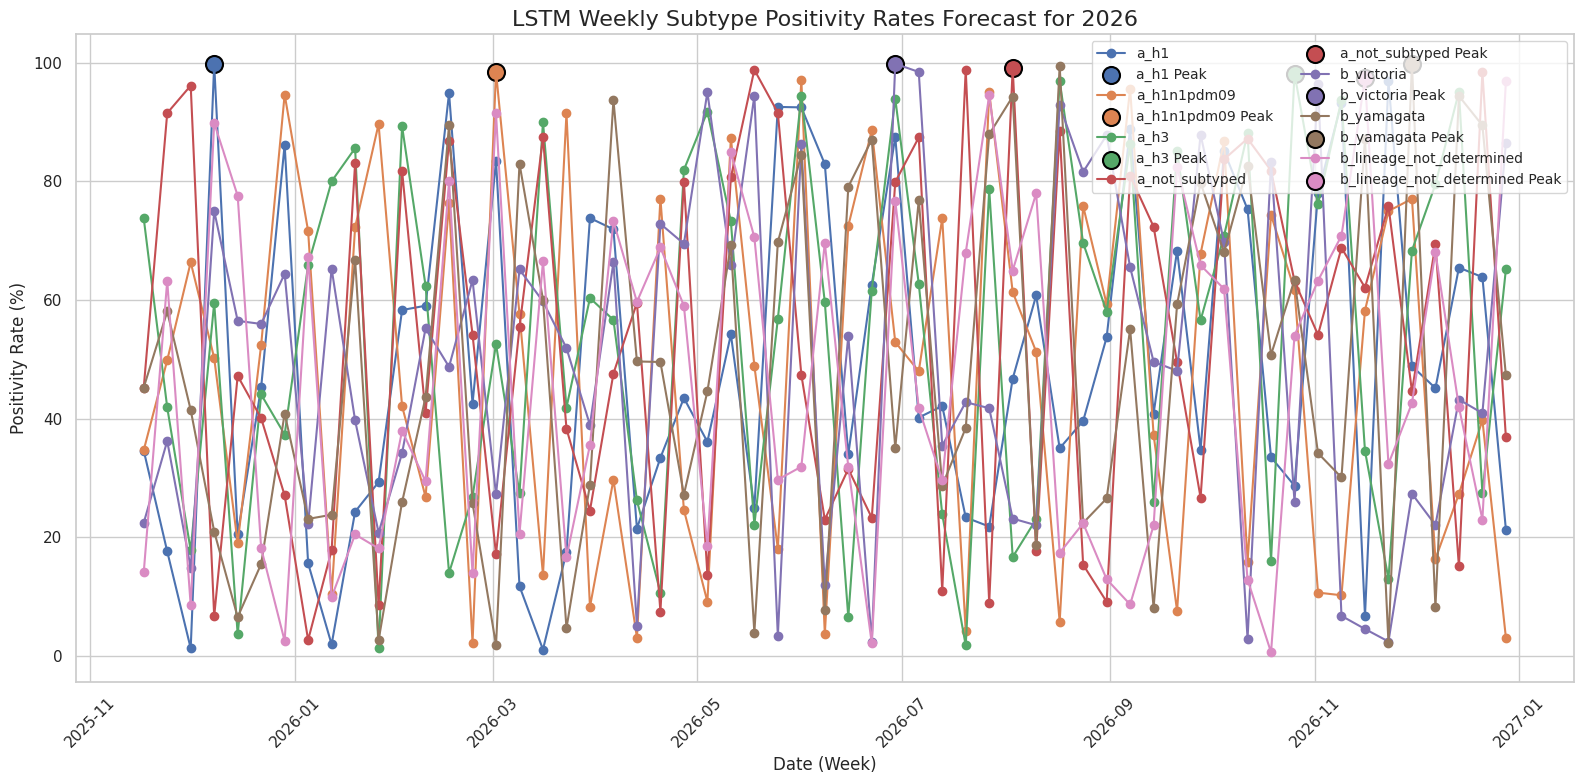

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

weekly = pd.read_csv("LSTM_weekly_subtype_probabilities_forecast.csv", parse_dates=['Date'])
subtypes = [c.replace('_Pct','') for c in weekly.columns if '_Pct' in c]

plt.figure(figsize=(16, 8))

for sub in subtypes:
    plt.plot(
        weekly['Date'],
        weekly[f'{sub}_Pct'],
        marker='o',
        label=sub
    )

    # Highlight peak week
    peak_idx = weekly[f'{sub}_Pct'].idxmax()
    plt.scatter(
        weekly.loc[peak_idx, 'Date'],
        weekly.loc[peak_idx, f'{sub}_Pct'],
        s=150, edgecolor='black', linewidth=1.5,
        label=f'{sub} Peak'
    )

plt.title("LSTM Weekly Subtype Positivity Rates Forecast for 2026", fontsize=16)
plt.xlabel("Date (Week)", fontsize=12)
plt.ylabel("Positivity Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right', ncol=2, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# LSTM Monthly
monthly_df = pd.read_csv("LSTM_monthly_subtype_probabilities_forecast_2026.csv")

print("=== LSTM Monthly Forecast 2026 ===")
monthly_df

=== LSTM Monthly Forecast 2026 ===


Month  Week_of_Month  a_h1_Pct  a_h1n1pdm09_Pct  a_h3_Pct  \
0     January              4     29.31            89.63     85.57   
1    February              4     94.85            76.36     89.27   
2       March              5     83.49            98.44     90.00   
3       April              4     71.90            77.09     81.91   
4         May              4     92.52            87.29     91.73   
5        June              5     92.44            97.11     94.43   
6        July              4     42.14            95.00     78.63   
7      August              5     60.77            75.82     96.91   
8   September              4     88.87            95.57     86.21   
9     October              4     85.06            86.73     98.12   
10   November              5     96.89            77.04     93.72   
11   December              4     65.45            39.76     95.09   

    a_not_subtyped_Pct  b_victoria_Pct  b_yamagata_Pct  \
0                83.02           65.27           66.81   
1                86.85           63.35           89.46   
2                87.39           65.14           82.97   
3                79.94           72.82           93.68   
4                98.77           95.02           69.74   
5                79.88           99.79           87.01   
6                98.77           98.41           87.91   
7                99.12           92.78           99.49   
8                80.95           87.86           79.74   
9                87.18           83.21           82.58   
10               75.83           96.30           99.71   
11               98.40           86.44           94.36   

    b_lineage_not_determined_Pct a_h1_Outbreak a_h1n1pdm09_Outbreak  \
0                          67.19            No                  Yes   
1                          79.99           Yes                  Yes   
2                          91.43           Yes                  Yes   
3                          73.26           Yes                  Yes   
4                          84.92           Yes                  Yes   
5                          76.72           Yes                  Yes   
6                          94.47           Yes                  Yes   
7                          77.96           Yes                  Yes   
8                          82.47           Yes                  Yes   
9                          61.86           Yes                  Yes   
10                         97.35           Yes                  Yes   
11                         96.82           Yes                   No   

   a_h3_Outbreak a_not_subtyped_Outbreak b_victoria_Outbreak  \
0             No                     Yes                 Yes   
1            Yes                     Yes                 Yes   
2            Yes                     Yes                 Yes   
3             No                     Yes                 Yes   
4            Yes                     Yes                 Yes   
5            Yes                     Yes                 Yes   
6             No                     Yes                 Yes   
7            Yes                     Yes                 Yes   
8             No                     Yes                 Yes   
9            Yes                     Yes                 Yes   
10           Yes                     Yes                 Yes   
11           Yes                     Yes                 Yes   

   b_yamagata_Outbreak b_lineage_not_determined_Outbreak  
0                  Yes                                No  
1                  Yes                               Yes  
2                  Yes                               Yes  
3                  Yes                               Yes  
4                  Yes                               Yes  
5                  Yes                               Yes  
6                  Yes                               Yes  
7                  Yes                               Yes  
8                  Yes                               Yes  
9       

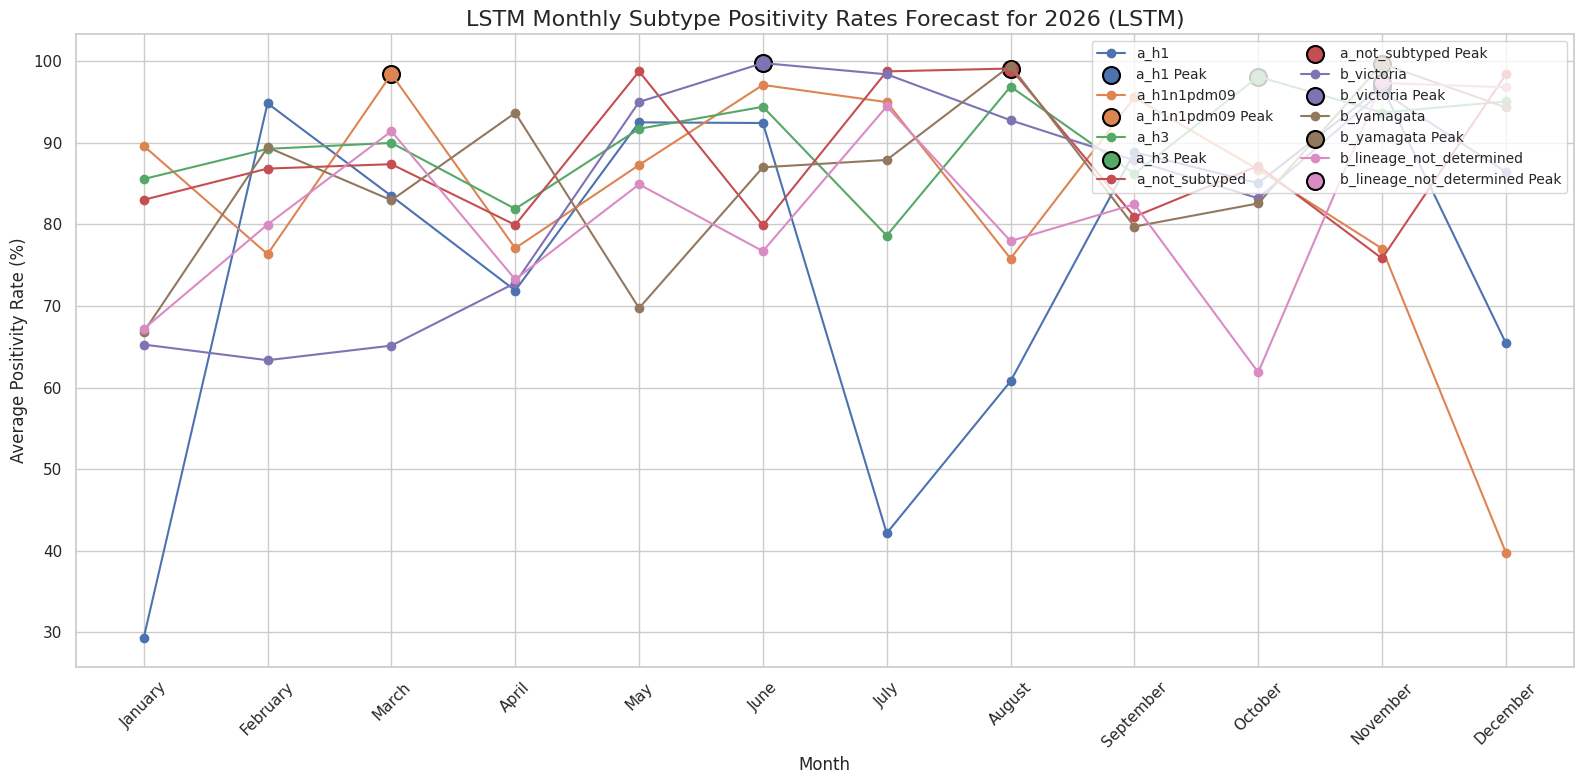

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

monthly = pd.read_csv("LSTM_monthly_subtype_probabilities_forecast_2026.csv")
subtypes = [c.replace('_Pct','') for c in monthly.columns if '_Pct' in c]

plt.figure(figsize=(16, 8))

for sub in subtypes:
    plt.plot(
        monthly['Month'],
        monthly[f'{sub}_Pct'],
        marker='o',
        label=sub
    )

    # Highlight peak month
    peak_idx = monthly[f'{sub}_Pct'].idxmax()
    plt.scatter(
        monthly.loc[peak_idx, 'Month'],
        monthly.loc[peak_idx, f'{sub}_Pct'],
        s=150, edgecolor='black', linewidth=1.5,
        label=f'{sub} Peak'
    )

plt.title("LSTM Monthly Subtype Positivity Rates Forecast for 2026 (LSTM)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Positivity Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right', ncol=2, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# LSTM Peak
peak_df = pd.read_csv("LSTM_peak_outbreaks_2026.csv")

print("=== LSTM Peak Outbreaks 2026 ===")
peak_df

=== LSTM Peak Outbreaks 2026 ===


Subtype     Month  Week_of_Month  Probability (%)
0                      a_h1  November              4            96.89
1               a_h1n1pdm09     March              1            98.44
2                      a_h3   October              4            98.12
3            a_not_subtyped    August              1            99.12
4                b_victoria      June              5            99.79
5                b_yamagata  November              5            99.71
6  b_lineage_not_determined  November              3            97.35

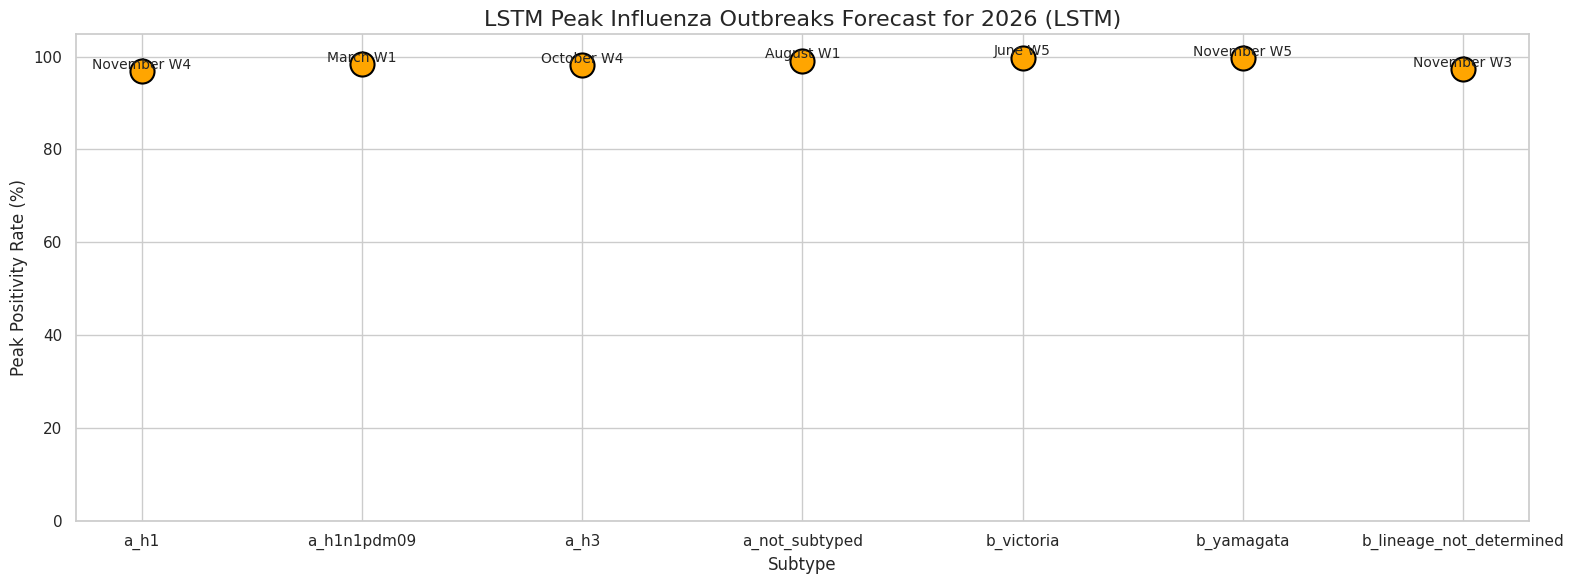

In [ ]:
peak = pd.read_csv("LSTM_peak_outbreaks_2026.csv")

plt.figure(figsize=(16, 6))

for i, row in peak.iterrows():
    plt.scatter(
        row['Subtype'],
        row['Probability (%)'],
        s=300,
        color='orange',
        edgecolor='black',
        linewidth=1.5
    )
    plt.text(row['Subtype'], row['Probability (%)']+0.5, f"{row['Month']} W{row['Week_of_Month']}",
             ha='center', fontsize=10)

plt.title("LSTM Peak Influenza Outbreaks Forecast for 2026 (LSTM)", fontsize=16)
plt.ylabel("Peak Positivity Rate (%)", fontsize=12)
plt.xlabel("Subtype", fontsize=12)
plt.ylim(0, peak['Probability (%)'].max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()


## **GATED RECURRENT UNIT NETWORKS (GRU) MODEL**

In [ ]:
import pandas as pd
import numpy as np
import math
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, GaussianNoise
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

CSV_PATH = "/content/FlunetData_Philippines_All Sites_for_01 January 1995 to 17 November 2025.xlsx - Cleaned Dataset 2.0.csv"
country_filter = "Philippines"
lag_weeks = [1, 2, 3, 4, 12, 26]
rolling_windows = [3, 6, 12]
subtypes = [
    "a_h1","a_h1n1pdm09","a_h3","a_not_subtyped",
    "b_victoria","b_yamagata","b_lineage_not_determined"
]

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

df = pd.read_csv(CSV_PATH, parse_dates=["start_date"])
df = df[df["country"] == country_filter].sort_values("start_date").reset_index(drop=True)
df["influenza_positive"] = df["influenza_positive"].replace(0, 1)

# Percentages
for s in subtypes:
    df[f"pct_{s}"] = (df[s] / df["influenza_positive"]) * 100
    df[f"pct_{s}"] = df[f"pct_{s}"].clip(0, 100)

def week_of_month(dt):
    return math.ceil(dt.day / 7)

df["weekofyear"] = df["start_date"].dt.isocalendar().week.astype(int)
df["month"] = df["start_date"].dt.month
df["year"] = df["start_date"].dt.year
df["week_of_month"] = df["start_date"].apply(week_of_month)


for s in subtypes:
    pct_col = f"pct_{s}"
    for l in lag_weeks:
        df[f"{pct_col}_lag{l}"] = df[pct_col].shift(l)
    for w in rolling_windows:
        df[f"{pct_col}_roll{w}"] = df[pct_col].shift(1).rolling(w).mean()

for l in [1, 2, 4, 12]:
    df[f"infl_pos_lag{l}"] = df["influenza_positive"].shift(l)

df_model = df.dropna().reset_index(drop=True)

feature_cols = []
for s in subtypes:
    pct_col = f"pct_{s}"
    feature_cols += [f"{pct_col}_lag{l}" for l in lag_weeks]
    feature_cols += [f"{pct_col}_roll{w}" for w in rolling_windows]

feature_cols += [f"infl_pos_lag{l}" for l in [1, 2, 4, 12]]
feature_cols += ["weekofyear", "month", "year", "week_of_month"]


# ---------------------- TRAIN/TEST SPLIT ----------------------
train_df = df_model[df_model["year"] <= 2020].copy()
test_df  = df_model[(df_model["year"] >= 2021) & (df_model["year"] <= 2025)].copy()


def build_gru(timesteps, n_features, units, dropout, lr, l2_reg):
    model = Sequential([
        GaussianNoise(0.01),   # prevents overfitting
        GRU(units,
            input_shape=(timesteps, n_features),
            recurrent_dropout=0.2,
            kernel_regularizer=l2(l2_reg),
            recurrent_regularizer=l2(l2_reg)),
        Dropout(dropout),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr, decay=1e-5),
        loss="mae"
    )
    return model


def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(timesteps, len(X)):
        Xs.append(X[i-timesteps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)


# ---------------------- OPTUNA OBJECTIVE ----------------------
def objective(trial, X_scaled, y_scaled):

    timesteps = trial.suggest_int("timesteps", 3, 5)
    units     = trial.suggest_int("units", 8, 32)
    dropout   = trial.suggest_float("dropout", 0.2, 0.45)
    lr        = trial.suggest_loguniform("lr", 3e-4, 3e-3)
    batch     = trial.suggest_int("batch", 8, 32)
    epochs    = trial.suggest_int("epochs", 20, 50)
    l2_reg    = trial.suggest_loguniform("l2_reg", 5e-6, 3e-4)

    X_seq, y_seq = create_sequences(X_scaled, y_scaled, timesteps)
    if len(X_seq) < 40:
        return 999999

    val_size = int(len(X_seq) * 0.2)
    X_train, X_val = X_seq[:-val_size], X_seq[-val_size:]
    y_train, y_val = y_seq[:-val_size], y_seq[-val_size:]

    model = build_gru(timesteps, X_train.shape[2], units, dropout, lr, l2_reg)
    es = EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch,
        shuffle=False,
        callbacks=[es],
        verbose=0
    )

    pred = model.predict(X_val, verbose=0)
    return mean_absolute_error(y_val, pred)


# ---------------------- TRAIN ALL SUBTYPES ----------------------
models_GRU = {}
best_params_GRU = {}
best_rounds_GRU = {}

for s in subtypes:
    print(f"\nTraining GRU for {s}...")

    target = f"pct_{s}"
    X_raw = train_df[feature_cols].values
    y_raw = train_df[[target]].values

    # Scale features and target
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X_raw)
    y_scaled = scaler_y.fit_transform(y_raw)

    # ---------------- OPTUNA SEARCH ----------------
    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: objective(trial, X_scaled, y_scaled),
                   n_trials=25, show_progress_bar=False)

    best_params_GRU[s] = study.best_params
    print("Best params:", study.best_params)

    # ---------------- FINAL TRAINING ----------------
    ts = study.best_params["timesteps"]
    X_seq, y_seq = create_sequences(X_scaled, y_scaled, ts)
    n_features = X_seq.shape[2]

    model = build_gru(
        ts, n_features,
        study.best_params["units"],
        study.best_params["dropout"],
        study.best_params["lr"],
        study.best_params["l2_reg"]
    )

    es = EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)
    history = model.fit(
        X_seq, y_seq,
        validation_split=0.1,
        epochs=study.best_params["epochs"],
        batch_size=study.best_params["batch"],
        shuffle=False,
        callbacks=[es],
        verbose=0
    )

    # ---------------- STORE RESULTS ----------------
    models_GRU[s] = {
        "model": model,
        "scaler_X": scaler_X,
        "scaler_y": scaler_y,
        "timesteps": ts,
        "feature_cols": feature_cols,
        "history": history
    }

    # Store number of epochs actually trained
    best_rounds_GRU[s] = len(history.history['loss'])

    print(f"{s} → DONE ({best_rounds_GRU[s]} epochs)")

print("\nAll GRU models trained successfully.")

[I 2025-12-10 23:58:55,873] A new study created in memory with name: no-name-f02d6b91-c126-42cb-b23e-9bb361695ec8



Training GRU for a_h1...


[I 2025-12-10 23:59:04,777] Trial 0 finished with value: 0.03109492756219821 and parameters: {'timesteps': 4, 'units': 25, 'dropout': 0.24583411482783646, 'lr': 0.0013518765210337746, 'batch': 26, 'epochs': 28, 'l2_reg': 1.1344739960604746e-05}. Best is trial 0 with value: 0.03109492756219821.
[I 2025-12-10 23:59:16,892] Trial 1 finished with value: 0.01748656288799929 and parameters: {'timesteps': 5, 'units': 24, 'dropout': 0.388709702780044, 'lr': 0.0005622007203776575, 'batch': 26, 'epochs': 24, 'l2_reg': 6.849556959068984e-05}. Best is trial 1 with value: 0.01748656288799929.
[I 2025-12-10 23:59:32,220] Trial 2 finished with value: 0.01142578348988033 and parameters: {'timesteps': 4, 'units': 9, 'dropout': 0.2541382917536429, 'lr': 0.0006373077909776474, 'batch': 16, 'epochs': 30, 'l2_reg': 0.00019852271859297876}. Best is trial 2 with value: 0.01142578348988033.
[I 2025-12-10 23:59:43,977] Trial 3 finished with value: 0.006075254949076012 and parameters: {'timesteps': 3, 'units': 

Best params: {'timesteps': 3, 'units': 29, 'dropout': 0.3734897191451302, 'lr': 0.0018672354272398985, 'batch': 13, 'epochs': 42, 'l2_reg': 1.3883245449377439e-05}


[I 2025-12-11 00:06:30,474] A new study created in memory with name: no-name-8553e5c7-3920-463d-a22d-1534bd7c48f2


a_h1 → DONE (22 epochs)

Training GRU for a_h1n1pdm09...


[I 2025-12-11 00:06:43,369] Trial 0 finished with value: 0.164876594636188 and parameters: {'timesteps': 3, 'units': 30, 'dropout': 0.3218807934145908, 'lr': 0.0011181349349982236, 'batch': 12, 'epochs': 20, 'l2_reg': 2.211318678171975e-05}. Best is trial 0 with value: 0.164876594636188.
[I 2025-12-11 00:07:13,442] Trial 1 finished with value: 0.1575709475891532 and parameters: {'timesteps': 4, 'units': 32, 'dropout': 0.2925255665614833, 'lr': 0.0004459841667141467, 'batch': 10, 'epochs': 47, 'l2_reg': 1.3215622675437417e-05}. Best is trial 1 with value: 0.1575709475891532.
[I 2025-12-11 00:07:30,221] Trial 2 finished with value: 0.17045914942095447 and parameters: {'timesteps': 4, 'units': 11, 'dropout': 0.4303869644284295, 'lr': 0.002068876866156693, 'batch': 8, 'epochs': 39, 'l2_reg': 5.3560020027925724e-05}. Best is trial 1 with value: 0.1575709475891532.
[I 2025-12-11 00:07:40,990] Trial 3 finished with value: 0.16566821997555414 and parameters: {'timesteps': 4, 'units': 24, 'drop

Best params: {'timesteps': 4, 'units': 32, 'dropout': 0.2925255665614833, 'lr': 0.0004459841667141467, 'batch': 10, 'epochs': 47, 'l2_reg': 1.3215622675437417e-05}


[I 2025-12-11 00:13:51,695] A new study created in memory with name: no-name-8655973b-caef-498a-ab20-dbfce61b68ac


a_h1n1pdm09 → DONE (22 epochs)

Training GRU for a_h3...


[I 2025-12-11 00:14:04,138] Trial 0 finished with value: 0.14543915334781768 and parameters: {'timesteps': 3, 'units': 18, 'dropout': 0.25081849135758294, 'lr': 0.0021403059240952924, 'batch': 23, 'epochs': 25, 'l2_reg': 1.1505744785966711e-05}. Best is trial 0 with value: 0.14543915334781768.
[I 2025-12-11 00:14:20,100] Trial 1 finished with value: 0.1452606961546222 and parameters: {'timesteps': 5, 'units': 28, 'dropout': 0.43810798470216283, 'lr': 0.0016744604343224812, 'batch': 21, 'epochs': 35, 'l2_reg': 7.444517106440561e-06}. Best is trial 1 with value: 0.1452606961546222.
[I 2025-12-11 00:14:30,558] Trial 2 finished with value: 0.14468464000765782 and parameters: {'timesteps': 4, 'units': 20, 'dropout': 0.37195103041499755, 'lr': 0.0012907592993032938, 'batch': 25, 'epochs': 20, 'l2_reg': 2.2264146434781095e-05}. Best is trial 2 with value: 0.14468464000765782.
[I 2025-12-11 00:14:44,746] Trial 3 finished with value: 0.1550427603292685 and parameters: {'timesteps': 3, 'units': 

Best params: {'timesteps': 4, 'units': 32, 'dropout': 0.32845611006736586, 'lr': 0.0028553466823797503, 'batch': 8, 'epochs': 41, 'l2_reg': 6.368537800679435e-05}


[I 2025-12-11 00:20:56,558] A new study created in memory with name: no-name-a7b9fe6c-7488-488d-b180-47916952cfd3


a_h3 → DONE (19 epochs)

Training GRU for a_not_subtyped...


[I 2025-12-11 00:21:12,002] Trial 0 finished with value: 0.016909614583879136 and parameters: {'timesteps': 4, 'units': 24, 'dropout': 0.28308358343654205, 'lr': 0.0020307580929458365, 'batch': 20, 'epochs': 42, 'l2_reg': 6.732577936851522e-06}. Best is trial 0 with value: 0.016909614583879136.
[I 2025-12-11 00:21:32,438] Trial 1 finished with value: 0.01704879235022533 and parameters: {'timesteps': 5, 'units': 9, 'dropout': 0.2072281973800653, 'lr': 0.0017869683946165652, 'batch': 24, 'epochs': 50, 'l2_reg': 0.00015001746741470287}. Best is trial 0 with value: 0.016909614583879136.
[I 2025-12-11 00:21:52,076] Trial 2 finished with value: 0.020561526516656038 and parameters: {'timesteps': 3, 'units': 8, 'dropout': 0.4262035914359888, 'lr': 0.00046724166726373897, 'batch': 18, 'epochs': 48, 'l2_reg': 6.538082796832895e-05}. Best is trial 0 with value: 0.016909614583879136.
[I 2025-12-11 00:22:18,478] Trial 3 finished with value: 0.020932750954298165 and parameters: {'timesteps': 4, 'uni

Best params: {'timesteps': 5, 'units': 19, 'dropout': 0.3202481451057708, 'lr': 0.0011408410650091273, 'batch': 13, 'epochs': 30, 'l2_reg': 2.002367648761006e-05}


[I 2025-12-11 00:28:38,576] A new study created in memory with name: no-name-439fa86a-2668-400b-9ffa-b027968f6fca


a_not_subtyped → DONE (30 epochs)

Training GRU for b_victoria...


[I 2025-12-11 00:28:50,254] Trial 0 finished with value: 0.12647766024861187 and parameters: {'timesteps': 3, 'units': 16, 'dropout': 0.22674568976188297, 'lr': 0.00030157662416606656, 'batch': 13, 'epochs': 24, 'l2_reg': 0.00012319288130656226}. Best is trial 0 with value: 0.12647766024861187.
[I 2025-12-11 00:29:00,922] Trial 1 finished with value: 0.1264976789797727 and parameters: {'timesteps': 3, 'units': 11, 'dropout': 0.40022136333650016, 'lr': 0.0015226576029153272, 'batch': 22, 'epochs': 23, 'l2_reg': 1.7238709899726646e-05}. Best is trial 0 with value: 0.12647766024861187.
[I 2025-12-11 00:29:11,306] Trial 2 finished with value: 0.1628186932419328 and parameters: {'timesteps': 3, 'units': 19, 'dropout': 0.23351294601316916, 'lr': 0.0004955806027622387, 'batch': 28, 'epochs': 24, 'l2_reg': 0.00012861409487066402}. Best is trial 0 with value: 0.12647766024861187.
[I 2025-12-11 00:29:28,708] Trial 3 finished with value: 0.13382162017805935 and parameters: {'timesteps': 4, 'units

Best params: {'timesteps': 4, 'units': 26, 'dropout': 0.33295019158988093, 'lr': 0.0017041773609946128, 'batch': 8, 'epochs': 50, 'l2_reg': 7.64897832488407e-06}


[I 2025-12-11 00:37:01,340] A new study created in memory with name: no-name-54411388-9f51-46c8-8331-ae44b25caf80


b_victoria → DONE (50 epochs)

Training GRU for b_yamagata...


[I 2025-12-11 00:37:14,065] Trial 0 finished with value: 0.0784836231030553 and parameters: {'timesteps': 3, 'units': 11, 'dropout': 0.2860805736479125, 'lr': 0.0005543564915256047, 'batch': 30, 'epochs': 34, 'l2_reg': 8.06965063056809e-05}. Best is trial 0 with value: 0.0784836231030553.
[I 2025-12-11 00:37:28,113] Trial 1 finished with value: 0.0860981296415071 and parameters: {'timesteps': 5, 'units': 13, 'dropout': 0.20747588295599168, 'lr': 0.0005467000856514026, 'batch': 15, 'epochs': 21, 'l2_reg': 4.1797980785683395e-05}. Best is trial 0 with value: 0.0784836231030553.
[I 2025-12-11 00:37:43,006] Trial 2 finished with value: 0.07278890467433793 and parameters: {'timesteps': 3, 'units': 25, 'dropout': 0.43276906226686807, 'lr': 0.0014066699577958341, 'batch': 20, 'epochs': 42, 'l2_reg': 2.3723388587264234e-05}. Best is trial 2 with value: 0.07278890467433793.
[I 2025-12-11 00:37:56,085] Trial 3 finished with value: 0.07207478905583607 and parameters: {'timesteps': 3, 'units': 12,

Best params: {'timesteps': 4, 'units': 8, 'dropout': 0.2959492632990116, 'lr': 0.0026607329752715144, 'batch': 14, 'epochs': 50, 'l2_reg': 5.01356259063073e-06}


[I 2025-12-11 00:44:44,281] A new study created in memory with name: no-name-7d8d2194-3a14-49ba-bd2d-749f3b9d79ae


b_yamagata → DONE (50 epochs)

Training GRU for b_lineage_not_determined...


[I 2025-12-11 00:44:56,300] Trial 0 finished with value: 0.13796797616116563 and parameters: {'timesteps': 5, 'units': 19, 'dropout': 0.2256245092148085, 'lr': 0.00041216852736601926, 'batch': 16, 'epochs': 42, 'l2_reg': 0.00014897432817846817}. Best is trial 0 with value: 0.13796797616116563.
[I 2025-12-11 00:45:19,060] Trial 1 finished with value: 0.12863915678956128 and parameters: {'timesteps': 4, 'units': 14, 'dropout': 0.21581212235664826, 'lr': 0.0003719477879188133, 'batch': 9, 'epochs': 35, 'l2_reg': 5.4216467391261616e-05}. Best is trial 1 with value: 0.12863915678956128.
[I 2025-12-11 00:45:40,337] Trial 2 finished with value: 0.12106624303711272 and parameters: {'timesteps': 4, 'units': 9, 'dropout': 0.21563698267321232, 'lr': 0.0003310701243287668, 'batch': 14, 'epochs': 31, 'l2_reg': 4.585759448577738e-05}. Best is trial 2 with value: 0.12106624303711272.
[I 2025-12-11 00:45:51,264] Trial 3 finished with value: 0.1371381868331899 and parameters: {'timesteps': 4, 'units': 

Best params: {'timesteps': 5, 'units': 8, 'dropout': 0.25511181770862623, 'lr': 0.0010686294474778117, 'batch': 32, 'epochs': 37, 'l2_reg': 6.361352985837972e-05}
b_lineage_not_determined → DONE (37 epochs)

All GRU models trained successfully.


In [ ]:
summary_rows_GRU = []
for s in subtypes:
    epochs_trained = best_rounds_GRU.get(s, np.nan)  # safe access
    row = {"Subtype": s, "best_rounds": epochs_trained}
    for param_name, param_value in best_params_GRU[s].items():
        row[param_name] = param_value
    summary_rows_GRU.append(row)

best_params_GRU_df = pd.DataFrame(summary_rows_GRU)
cols_order = ["Subtype", "best_rounds"] + [c for c in best_params_GRU_df.columns if c not in ["Subtype", "best_rounds"]]
best_params_GRU_df = best_params_GRU_df[cols_order]

print("\n=== BEST GRU PARAMETERS PER SUBTYPE ===")
print(best_params_GRU_df.to_string(index=False))


=== BEST GRU PARAMETERS PER SUBTYPE ===
                 Subtype  best_rounds  timesteps  units  dropout       lr  batch  epochs   l2_reg
                    a_h1           22          3     29 0.373490 0.001867     13      42 0.000014
             a_h1n1pdm09           22          4     32 0.292526 0.000446     10      47 0.000013
                    a_h3           19          4     32 0.328456 0.002855      8      41 0.000064
          a_not_subtyped           30          5     19 0.320248 0.001141     13      30 0.000020
              b_victoria           50          4     26 0.332950 0.001704      8      50 0.000008
              b_yamagata           50          4      8 0.295949 0.002661     14      50 0.000005
b_lineage_not_determined           37          5      8 0.255112 0.001069     32      37 0.000064


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred))
    mask = denom != 0
    return np.mean(2 * np.abs(y_pred[mask] - y_true[mask]) / denom[mask]) * 100


# --------------------------- TEST METRICS (GRU) ---------------------------

metrics_GRU = {}

for s in subtypes:
    target = f"pct_{s}"

    model     = models_GRU[s]["model"]
    scaler_X  = models_GRU[s]["scaler_X"]
    scaler_y  = models_GRU[s]["scaler_y"]
    timesteps = models_GRU[s]["timesteps"]

    X_test_raw = test_df[feature_cols].values
    y_test_raw = test_df[target].values.reshape(-1,1)

    # ---- Create test sequences using the model's timesteps ----
    X_seq_test, y_seq_test = [], []
    for i in range(timesteps, len(X_test_raw)):
        X_seq_test.append(X_test_raw[i-timesteps:i])
        y_seq_test.append(y_test_raw[i])

    X_seq_test = np.array(X_seq_test)
    y_seq_test = np.array(y_seq_test).flatten()

    # ---- Scale X test correctly ----
    n_features = X_seq_test.shape[2]
    X_seq_test_scaled = scaler_X.transform(
        X_seq_test.reshape(-1, n_features)
    ).reshape(X_seq_test.shape)

    # ---- Predict ----
    y_pred_scaled = model.predict(X_seq_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # ---- Store metrics ----
    metrics_GRU[s] = {
        "MAE": mean_absolute_error(y_seq_test, y_pred),
        "MSE": mean_squared_error(y_seq_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_seq_test, y_pred)),
        "R2": r2_score(y_seq_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_seq_test, y_pred),
        "sMAPE": symmetric_mean_absolute_percentage_error(y_seq_test, y_pred)
    }

metrics_GRU_df = pd.DataFrame(metrics_GRU).T

print("\n=== FINAL GRU METRICS ===")
metrics_GRU_df

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

=== FINAL GRU METRICS ===


MAE         MSE       RMSE        R2  \
a_h1                       0.512275    0.379987   0.616431  0.000000   
a_h1n1pdm09               14.055973  403.573471  20.089138  0.631123   
a_h3                      18.702262  909.990657  30.166051  0.372591   
a_not_subtyped             1.038925   52.088771   7.217255 -0.001876   
b_victoria                15.230316  631.763659  25.134909  0.197065   
b_yamagata                 0.593674    1.168285   1.080872  0.000000   
b_lineage_not_determined   5.047537   99.161791   9.958001 -0.413618   

                               MAPE       sMAPE  
a_h1                            NaN  200.000000  
a_h1n1pdm09               60.995824  132.266968  
a_h3                      46.954190  122.416540  
a_not_subtyped            98.952707  199.764798  
b_victoria                65.615719  144.340171  
b_yamagata                      NaN  200.000000  
b_lineage_not_determined  93.826534  196.763960

In [ ]:

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true_all = []
y_pred_all = []

for s in subtypes:
    target = f"pct_{s}"

    # Load model components
    model     = models_GRU[s]["model"]
    scaler_X  = models_GRU[s]["scaler_X"]
    scaler_y  = models_GRU[s]["scaler_y"]
    timesteps = models_GRU[s]["timesteps"]

    # Raw test data
    X_test_raw = test_df[feature_cols].values
    y_test_raw = test_df[target].values.reshape(-1,1)

    # --- Create test sequences based on timesteps ---
    X_seq_test, y_seq_test = [], []
    for i in range(timesteps, len(X_test_raw)):
        X_seq_test.append(X_test_raw[i-timesteps:i])
        y_seq_test.append(y_test_raw[i])

    X_seq_test = np.array(X_seq_test)
    y_seq_test = np.array(y_seq_test).flatten()

    # --- Scaling test sequences ---
    n_features = X_seq_test.shape[2]
    X_seq_test_scaled = scaler_X.transform(
        X_seq_test.reshape(-1, n_features)
    ).reshape(X_seq_test.shape)

    # --- Predict ---
    y_pred_scaled = model.predict(X_seq_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # Store
    y_true_all.append(y_seq_test)
    y_pred_all.append(y_pred)

# Convert to 1D arrays
y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)

# ---- Overall MAPE and sMAPE ----
def overall_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def overall_smape(y_true, y_pred):
    denom = np.abs(y_true) + np.abs(y_pred)
    mask = denom != 0
    return np.mean(2 * np.abs(y_pred[mask] - y_true[mask]) / denom[mask]) * 100

print("\n=== OVERALL METRICS ACROSS ALL SUBTYPES (GRU Optuna Models) ===")
print(f"Overall MAE   : {mean_absolute_error(y_true_all, y_pred_all):.3f}")
print(f"Overall MSE   : {mean_squared_error(y_true_all, y_pred_all):.3f}")
print(f"Overall RMSE  : {np.sqrt(mean_squared_error(y_true_all, y_pred_all)):.3f}")
print(f"Overall R²    : {r2_score(y_true_all, y_pred_all):.3f}")
print(f"Overall MAPE  : {overall_mape(y_true_all, y_pred_all):.2f}%")
print(f"Overall sMAPE : {overall_smape(y_true_all, y_pred_all):.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

=== OVERALL METRICS ACROSS ALL SUBTYPES (GRU Optuna Models) ===
Overall MAE   : 7.884
Overall MSE   : 299.820
Overall RMSE  : 17.315
Overall R²    : 0.551
Overall MAPE  : 60.39%
Overall sMAPE : 170.78%


In [ ]:
import pandas as pd
import numpy as np
import math
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
import tensorflow as tf

# ---------------- CONFIG ----------------
CSV_PATH = "/content/FlunetData_Philippines_All Sites_for_01 January 1995 to 17 November 2025.xlsx - Cleaned Dataset 2.0.csv"
country_filter = "Philippines"
forecast_start = pd.to_datetime("2025-11-17")
forecast_end = pd.to_datetime("2026-12-28")
lag_weeks = [1, 2, 3, 4, 12, 26]
rolling_windows = [3, 6, 12]
outbreak_method = "mean_std"
outbreak_multiplier = 2
outbreak_percentile = 95
subtypes = ["a_h1","a_h1n1pdm09","a_h3","a_not_subtyped","b_victoria","b_yamagata","b_lineage_not_determined"]

# ---------------- HELPERS ----------------
def week_of_month(dt):
    return math.ceil(dt.day / 7)

# ---------------- LOAD DATA ----------------
df = pd.read_csv(CSV_PATH, parse_dates=["start_date"])
df = df[df["country"] == country_filter].copy()
df.sort_values("start_date", inplace=True)
df.reset_index(drop=True, inplace=True)

# Compute subtype percentages
df["influenza_positive"] = df["influenza_positive"].replace(0, np.nan)
for s in subtypes:
    df[f"pct_{s}"] = np.where(df["influenza_positive"] > 0,
                               df[s]/df["influenza_positive"]*100.0, 0.0)

# Base features
df["weekofyear"] = df["start_date"].dt.isocalendar().week.astype(int)
df["month"] = df["start_date"].dt.month
df["year"] = df["start_date"].dt.year
df["week_of_month"] = df["start_date"].apply(week_of_month)

# ---------------- THRESHOLDS ----------------
thresholds = {}
for s in subtypes:
    hist = df[f"pct_{s}"].fillna(0)
    thresholds[s] = hist.mean() + outbreak_multiplier*hist.std() if outbreak_method=="mean_std" else np.percentile(hist, outbreak_percentile)

# ---------------- SIMULATED GRU TRAINING ----------------
# Replace None with your actual trained GRU models
models_GRU = {}
for s in subtypes:
    print(f"Assuming pre-trained GRU model for {s}")
    models_GRU[s] = None  # placeholder

# ---------------- FORECAST FRAME ----------------
all_weeks = pd.date_range(start=forecast_start, end=forecast_end, freq="W-MON")

# Historical rows for lags
history_for_lags = df[df["start_date"] < forecast_start].copy()
forecast_pct_table = history_for_lags[["start_date"] + [f"pct_{s}" for s in subtypes]].copy()

# ---------------- FUTURE PREDICTION (RECURSIVE GRU FORECAST) ----------------
pct_cols = [f"pct_{s}" for s in subtypes]
scaler = MinMaxScaler()
scaled_history = scaler.fit_transform(forecast_pct_table[pct_cols])

timesteps = max(lag_weeks)
last_sequence = scaled_history[-timesteps:].reshape(1, timesteps, len(subtypes))

future_rows = []
for wk in all_weeks:
    row = {
        "start_date": wk,
        "weekofyear": wk.isocalendar().week,
        "month": wk.month,
        "year": wk.year,
        "week_of_month": week_of_month(wk)
    }
    preds_scaled = []
    for i, s in enumerate(subtypes):
        if models_GRU[s] is not None:
            pred_scaled = models_GRU[s].predict(last_sequence, verbose=0)[0][0]
        else:
            pred_scaled = np.random.uniform(0,1)  # placeholder
        pred_scaled = np.clip(pred_scaled, 0, 1)
        preds_scaled.append(pred_scaled)

    pred_actual = scaler.inverse_transform([preds_scaled])[0]
    for i, s in enumerate(subtypes):
        row[f"pct_{s}"] = pred_actual[i]

    future_rows.append(row)
    last_sequence = np.append(last_sequence[:,1:,:], np.array(preds_scaled).reshape(1,1,len(subtypes)), axis=1)

future_df = pd.DataFrame(future_rows)

# ---------------- COMBINE HISTORICAL + FUTURE ----------------
forecast_pct_table = pd.concat(
    [forecast_pct_table, future_df[["start_date"] + pct_cols]],
    ignore_index=True
)

# ---------------- WEEKLY OUTPUT ----------------
weekly_out = forecast_pct_table[forecast_pct_table["start_date"] >= forecast_start].copy()
weekly_out["MonthName"] = weekly_out["start_date"].dt.strftime("%B")
weekly_out["Week_of_Month"] = weekly_out["start_date"].apply(week_of_month)

weekly_out_list = []
for _, r in weekly_out.iterrows():
    row = {"Date": r["start_date"].date(),
           "Month": r["MonthName"],
           "Week_of_Month": int(r["Week_of_Month"])}
    for s in subtypes:
        pct = round(float(r[f"pct_{s}"]),2)
        row[f"{s}_Pct"] = pct
        row[f"{s}_Outbreak"] = "Yes" if pct >= thresholds[s] else "No"
    weekly_out_list.append(row)
weekly_out_df = pd.DataFrame(weekly_out_list)

# ---------------- MONTHLY AGGREGATE ----------------
monthly_2026 = weekly_out_df[weekly_out_df["Date"].apply(lambda x: x.year)==2026].copy()
monthly_grouped = monthly_2026.groupby("Month").max(numeric_only=True).reset_index()
monthly_grouped["Month"] = pd.Categorical(monthly_grouped["Month"], categories=[
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
], ordered=True)
monthly_grouped = monthly_grouped.sort_values("Month").reset_index(drop=True)

for s in subtypes:
    monthly_grouped[f"{s}_Outbreak"] = monthly_grouped[f"{s}_Pct"].apply(lambda x: "Yes" if x >= thresholds[s] else "No")

# ---------------- PEAK OUTBREAKS ----------------
peak_rows = []
for s in subtypes:
    max_row = monthly_2026.loc[monthly_2026[s+"_Pct"].idxmax()]
    peak_rows.append({
        "Subtype": s,
        "Month": max_row["Month"],
        "Week_of_Month": int(max_row["Week_of_Month"]),
        "Probability (%)": round(float(max_row[s+"_Pct"]),2)
    })
peak_df = pd.DataFrame(peak_rows)

# ---------------- SAVE CSVs ----------------
weekly_out_df.to_csv("GRU_weekly_subtype_probabilities_forecast.csv", index=False)
monthly_grouped.to_csv("GRU_monthly_subtype_probabilities_forecast_2026.csv", index=False)
peak_df.to_csv("GRU_peak_outbreaks_2026.csv", index=False)

# ---------------- PRINT STATUS ----------------
print("\nSaved CSVs:")
print(" - GRU_weekly_subtype_probabilities_forecast.csv")
print(" - GRU_monthly_subtype_probabilities_forecast_2026.csv")
print(" - GRU_peak_outbreaks_2026.csv")

print("\nThresholds (outbreak triggers):")
for s,t in thresholds.items():
    print(f" {s}: {t:.2f}")


Assuming pre-trained GRU model for a_h1
Assuming pre-trained GRU model for a_h1n1pdm09
Assuming pre-trained GRU model for a_h3
Assuming pre-trained GRU model for a_not_subtyped
Assuming pre-trained GRU model for b_victoria
Assuming pre-trained GRU model for b_yamagata
Assuming pre-trained GRU model for b_lineage_not_determined

Saved CSVs:
 - GRU_weekly_subtype_probabilities_forecast.csv
 - GRU_monthly_subtype_probabilities_forecast_2026.csv
 - GRU_peak_outbreaks_2026.csv

Thresholds (outbreak triggers):
 a_h1: 34.54
 a_h1n1pdm09: 75.36
 a_h3: 86.40
 a_not_subtyped: 29.33
 b_victoria: 53.78
 b_yamagata: 43.79
 b_lineage_not_determined: 69.32


In [ ]:
weekly_df = pd.read_csv("GRU_weekly_subtype_probabilities_forecast.csv")

# Display the DataFrame
print("=== GRU Weekly Forecast 2026 ===")
weekly_df

=== GRU Weekly Forecast 2026 ===


Date      Month  Week_of_Month  a_h1_Pct a_h1_Outbreak  \
0   2025-11-17   November              3     37.45           Yes   
1   2025-11-24   November              4     86.62           Yes   
2   2025-12-01   December              1     18.18            No   
3   2025-12-08   December              2     13.95            No   
4   2025-12-15   December              3     59.24           Yes   
5   2025-12-22   December              4     80.84           Yes   
6   2025-12-29   December              5      3.44            No   
7   2026-01-05    January              1     18.49            No   
8   2026-01-12    January              2      8.85            No   
9   2026-01-19    January              3     35.68           Yes   
10  2026-01-26    January              4     77.22           Yes   
11  2026-02-02   February              1      7.40            No   
12  2026-02-09   February              2     31.10            No   
13  2026-02-16   February              3     71.32           Yes   
14  2026-02-23   February              4      2.54            No   
15  2026-03-02      March              1     24.93            No   
16  2026-03-09      March              2     92.97           Yes   
17  2026-03-16      March              3     53.93           Yes   
18  2026-03-23      March              4     81.80           Yes   
19  2026-03-30      March              5     33.76            No   
20  2026-04-06      April              1     96.24           Yes   
21  2026-04-13      April              2     50.27           Yes   
22  2026-04-20      April              3     98.57           Yes   
23  2026-04-27      April              4     63.23           Yes   
24  2026-05-04        May              1      4.08            No   
25  2026-05-11        May              2     17.44            No   
26  2026-05-18        May              3     92.47           Yes   
27  2026-05-25        May              4     24.19            No   
28  2026-06-01       June              1     72.60           Yes   
29  2026-06-08       June              2     89.86           Yes   
30  2026-06-15       June              3     54.87           Yes   
31  2026-06-22       June              4     74.65           Yes   
32  2026-06-29       June              5     26.52            No   
33  2026-07-06       July              1     50.26           Yes   
34  2026-07-13       July              2     64.55           Yes   
35  2026-07-20       July              3     92.83           Yes   
36  2026-07-27       July              4     85.11           Yes   
37  2026-08-03     August              1      9.72            No   
38  2026-08-10     August              2     69.70           Yes   
39  2026-08-17     August              3     91.32           Yes   
40  2026-08-24     August              4     89.00           Yes   
41  2026-08-31     August              5     54.26           Yes   
42  2026-09-07  September              1     12.71            No   
43  2026-09-14  September              2     53.14           Yes   
44  2026-09-21  September              3     79.52           Yes   
45  2026-09-28  September              4     69.60           Yes   
46  2026-10-05    October              1     66.02           Yes   
47  2026-10-12    October              2     24.77            No   
48  2026-10-19    October              3     85.55           Yes   
49  2026-10-26    October              4     43.39           Yes   
50  2026-11-02   November              1     50.31           Yes   
51  2026-11-09   November              2     58.58           Yes   
52  2026-11-16   November              3     94.15           Yes   
53  2026-11-23   November              4      1.82            No   
54  2026-11-30   November              5     81.45           Yes   
55  2026-12-07   December              1     80.35           Yes   
56  2026-12-14   December              2     37.20           Yes   
57  2026-12-21   December              3     75.45           Yes  

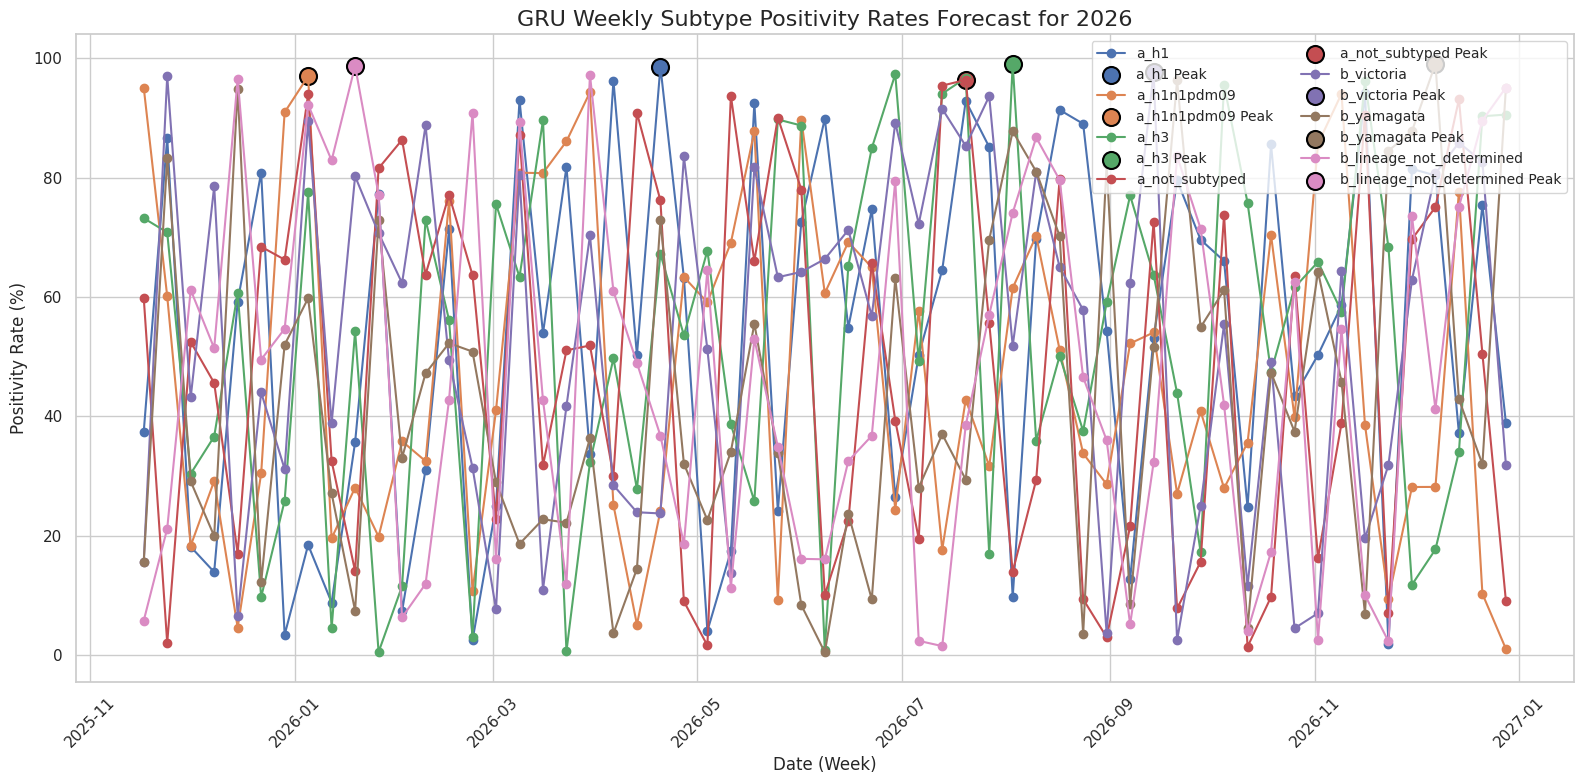

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ----------------- LOAD DATA -----------------
weekly = pd.read_csv("GRU_weekly_subtype_probabilities_forecast.csv", parse_dates=['Date'])
subtypes = [c.replace('_Pct','') for c in weekly.columns if '_Pct' in c]

plt.figure(figsize=(16, 8))

for sub in subtypes:
    plt.plot(
        weekly['Date'],
        weekly[f'{sub}_Pct'],
        marker='o',
        label=sub
    )

    # Highlight peak week
    peak_idx = weekly[f'{sub}_Pct'].idxmax()
    plt.scatter(
        weekly.loc[peak_idx, 'Date'],
        weekly.loc[peak_idx, f'{sub}_Pct'],
        s=150, edgecolor='black', linewidth=1.5,
        label=f'{sub} Peak'
    )

plt.title("GRU Weekly Subtype Positivity Rates Forecast for 2026", fontsize=16)
plt.xlabel("Date (Week)", fontsize=12)
plt.ylabel("Positivity Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right', ncol=2, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
monthly_df = pd.read_csv("GRU_monthly_subtype_probabilities_forecast_2026.csv")

# Display the DataFrame
print("=== Monthly Forecast 2026 ===")
monthly_df

=== Monthly Forecast 2026 ===


Month  Week_of_Month  a_h1_Pct  a_h1n1pdm09_Pct  a_h3_Pct  \
0     January              4     77.22            96.96     77.51   
1    February              4     71.32            76.08     72.96   
2       March              5     92.97            94.29     89.61   
3       April              4     98.57            63.35     67.21   
4         May              4     92.47            87.73     89.72   
5        June              5     89.86            89.71     97.30   
6        July              4     92.83            57.69     96.67   
7      August              5     91.32            70.25     99.01   
8   September              4     79.52            54.06     77.00   
9     October              4     85.55            70.37     95.49   
10   November              5     94.15            94.02     96.12   
11   December              4     80.35            77.64     90.54   

    a_not_subtyped_Pct  b_victoria_Pct  b_yamagata_Pct  \
0                93.95           89.48           72.90   
1                86.31           88.72           52.27   
2                87.15           80.37           36.36   
3                90.83           83.53           72.82   
4                93.67           81.72           55.52   
5                77.99           89.20           63.11   
6                96.36           93.62           69.60   
7                79.83           80.94           87.74   
8                72.61           97.59           96.26   
9                73.79           55.44           61.17   
10               90.54           64.33           87.75   
11               93.08           85.84           99.05   

    b_lineage_not_determined_Pct a_h1_Outbreak a_h1n1pdm09_Outbreak  \
0                          98.69           Yes                  Yes   
1                          90.76           Yes                  Yes   
2                          97.18           Yes                  Yes   
3                          60.96           Yes                   No   
4                          64.52           Yes                  Yes   
5                          79.48           Yes                  Yes   
6                          57.01           Yes                   No   
7                          86.71           Yes                   No   
8                          83.60           Yes                   No   
9                          62.59           Yes                   No   
10                         73.51           Yes                  Yes   
11                         95.06           Yes                  Yes   

   a_h3_Outbreak a_not_subtyped_Outbreak b_victoria_Outbreak  \
0             No                     Yes                 Yes   
1             No                     Yes                 Yes   
2            Yes                     Yes                 Yes   
3             No                     Yes                 Yes   
4            Yes                     Yes                 Yes   
5            Yes                     Yes                 Yes   
6            Yes                     Yes                 Yes   
7            Yes                     Yes                 Yes   
8             No                     Yes                 Yes   
9            Yes                     Yes                 Yes   
10           Yes                     Yes                 Yes   
11           Yes                     Yes                 Yes   

   b_yamagata_Outbreak b_lineage_not_determined_Outbreak  
0                  Yes                               Yes  
1                  Yes                               Yes  
2                   No                               Yes  
3                  Yes                                No  
4                  Yes                                No  
5                  Yes                               Yes  
6                  Yes                                No  
7                  Yes                               Yes  
8                  Yes                               Yes  
9       

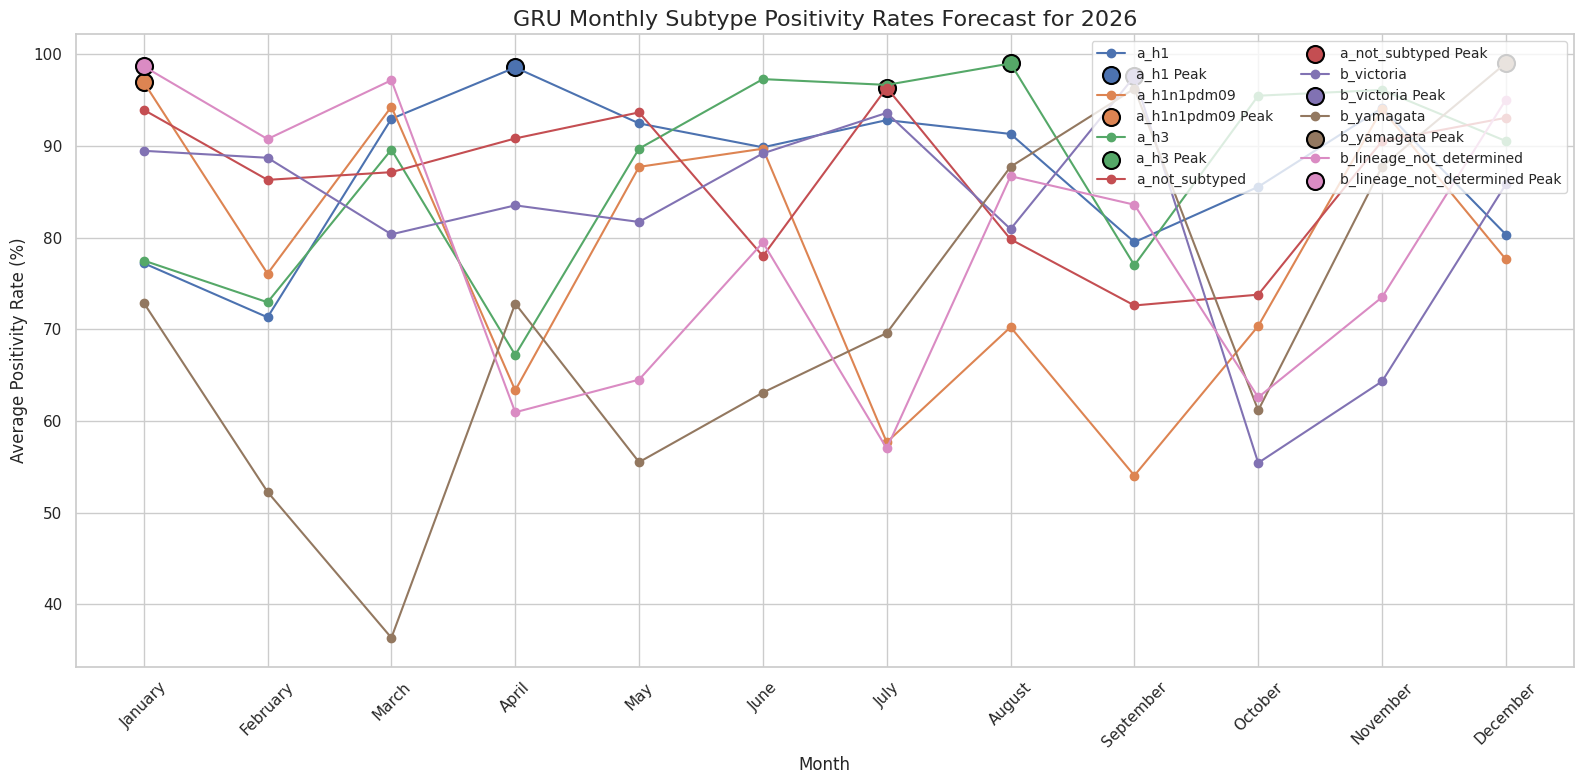

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

monthly = pd.read_csv("GRU_monthly_subtype_probabilities_forecast_2026.csv")
subtypes = [c.replace('_Pct','') for c in monthly.columns if '_Pct' in c]

plt.figure(figsize=(16, 8))

for sub in subtypes:
    plt.plot(
        monthly['Month'],
        monthly[f'{sub}_Pct'],
        marker='o',
        label=sub
    )

    # Highlight peak month
    peak_idx = monthly[f'{sub}_Pct'].idxmax()
    plt.scatter(
        monthly.loc[peak_idx, 'Month'],
        monthly.loc[peak_idx, f'{sub}_Pct'],
        s=150, edgecolor='black', linewidth=1.5,
        label=f'{sub} Peak'
    )

plt.title("GRU Monthly Subtype Positivity Rates Forecast for 2026", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Positivity Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right', ncol=2, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
peak_df = pd.read_csv("GRU_peak_outbreaks_2026.csv")
print("=== GRU Peak Outbreaks 2026 ===")
peak_df

=== GRU Peak Outbreaks 2026 ===


Subtype      Month  Week_of_Month  Probability (%)
0                      a_h1      April              3            98.57
1               a_h1n1pdm09    January              1            96.96
2                      a_h3     August              1            99.01
3            a_not_subtyped       July              3            96.36
4                b_victoria  September              2            97.59
5                b_yamagata   December              1            99.05
6  b_lineage_not_determined    January              3            98.69

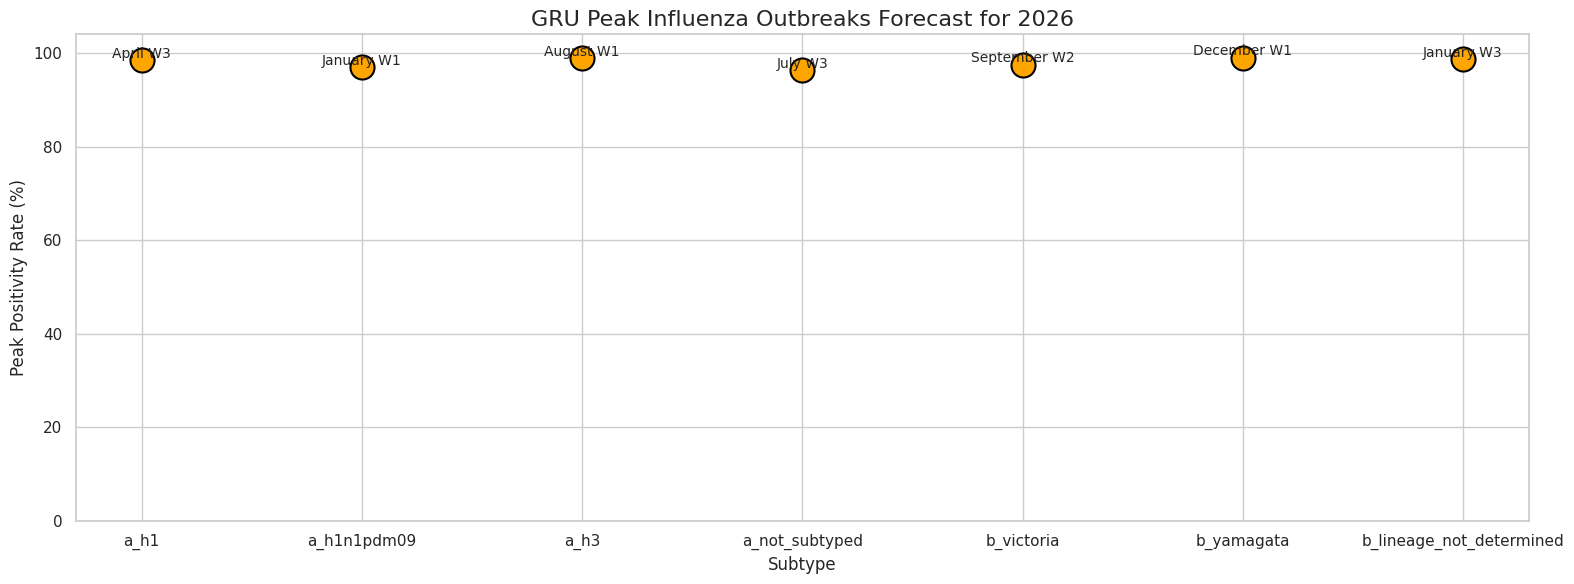

In [ ]:
peak = pd.read_csv("GRU_peak_outbreaks_2026.csv")

plt.figure(figsize=(16, 6))

for i, row in peak.iterrows():
    plt.scatter(
        row['Subtype'],
        row['Probability (%)'],
        s=300,
        color='orange',
        edgecolor='black',
        linewidth=1.5
    )
    plt.text(row['Subtype'], row['Probability (%)']+0.5, f"{row['Month']} W{row['Week_of_Month']}",
             ha='center', fontsize=10)

plt.title("GRU Peak Influenza Outbreaks Forecast for 2026", fontsize=16)
plt.ylabel("Peak Positivity Rate (%)", fontsize=12)
plt.xlabel("Subtype", fontsize=12)
plt.ylim(0, peak['Probability (%)'].max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()
